<h1>Quality Control Standard Pipeline</h1>

## Input ##
1) Data_matrix_no_normalization
2) Data_matrix_TIC_normalization
3) QCS Analytes m/z values (ie: propranolol 260.16, D7-propranolol 267.14)
4) Batch_info (sample construction)
5) Sample_set (tissue sample construction)

## Packages to download ##

In [2]:
## Packages for RSD overview table ##
install.packages("htmltools")
install.packages("kableExtra")
install.packages("IRdisplay")

## Packages for Violin plot ##
install.packages("ggplot2")
install.packages("dplyr")

## Packages for PCA plot ##
#install.packages("ggplot2")
install.packages("stringr")
install.packages("zoo")
#install.packages("dplyr")

## Packages for QCS PCA plot ##
install.packages("ggrepel")
install.packages("cowplot")
install.packages("gridExtra")

## Packages for Tissue PCA plot ##
#install.packages("ggplot2")
install.packages("dplyr")
#install.packages("ggrepel")
#install.packages("gridExtra")

'.Library'내 HTML 패키지 목록을 업데이트 하고 있습니다

Making 'packages.html' ...
 완료

'.Library'내 HTML 패키지 목록을 업데이트 하고 있습니다

Making 'packages.html' ...
 완료

'.Library'내 HTML 패키지 목록을 업데이트 하고 있습니다

Making 'packages.html' ...
 완료

'.Library'내 HTML 패키지 목록을 업데이트 하고 있습니다

Making 'packages.html' ...
 완료

'.Library'내 HTML 패키지 목록을 업데이트 하고 있습니다

Making 'packages.html' ...
 완료

'.Library'내 HTML 패키지 목록을 업데이트 하고 있습니다

Making 'packages.html' ...
 완료

'.Library'내 HTML 패키지 목록을 업데이트 하고 있습니다

Making 'packages.html' ...
 완료

'.Library'내 HTML 패키지 목록을 업데이트 하고 있습니다

Making 'packages.html' ...
 완료

'.Library'내 HTML 패키지 목록을 업데이트 하고 있습니다

Making 'packages.html' ...
 완료

'.Library'내 HTML 패키지 목록을 업데이트 하고 있습니다

Making 'packages.html' ...
 완료

'.Library'내 HTML 패키지 목록을 업데이트 하고 있습니다

Making 'packages.html' ...
 완료



## Demo 1: QCS EVALUATION ## 

In [3]:
### Please edit the file path, file name ###
no_normalization_data <- read.csv("input/119feature_T&QCS_BaseRemoval_noNorm.csv",
                                  header = FALSE,
                                  check.name = FALSE,
                                  stringsAsFactors = FALSE)

TIC_normalization_data <- read.csv("input/119feature_T&QCS_BaseRemoval_TICNorm.csv",
                                   header = FALSE,
                                   check.name = FALSE,
                                   stringsAsFactors = FALSE) 

propranolol_mz_value <- as.numeric(readline("Enter Propranolol m/z value: ")) ## ie: 260.186

d7_propranolol_mz_value <- as.numeric(readline("Enter D7-propranolol m/z value: ")) ## ie: 267.187

batch_info <- read.csv("input/batch_info_TIC.csv",
                       header = TRUE,
                       check.name = FALSE,
                       stringsAsFactors = FALSE) 

sample_set <- c("ChickenHeart", "ChickenLiver", "GoatLiver")

Enter Propranolol m/z value:  260.186
Enter D7-propranolol m/z value:  267.187


<h2>No normalization dataset</h2>

In [4]:
### Making formatted table no_normalization ###

## Format the csv datasets ##
# Read the CSV file
rawdata <- no_normalization_data
mz_header <- unlist(strsplit(as.character(rawdata[9, 1]), ";"))[1]
peak_header <- unlist(strsplit(as.character(rawdata[9, 1]), ";"))[5:length(unlist(strsplit(as.character(rawdata[9, 1]), ";")))]
peak <- unlist(strsplit(as.character(rawdata[10, 1]), ";"))[5:length(unlist(strsplit(as.character(rawdata[9, 1]), ";")))]

# Initialize lists
mz_data_list <- list()
peak_data_list <- list()
combined_batch_data_list <- list()

# Extract data
for (i in 10:nrow(rawdata)){
  mz <- unlist(strsplit(as.character(rawdata[[i, 1]]), ";"))[1]
  peak <- unlist(strsplit(as.character(rawdata[i, 1]), ";"))[5:length(unlist(strsplit(as.character(rawdata[9, 1]), ";")))]
  mz_data_list[[i - 9]] <- mz
  peak_data_list[[i - 9]] <- peak
  combined_batch_data <- c(mz, peak)
  combined_batch_data_list[[i - 9]] <- combined_batch_data
}

# Combine data into a data frame
combined_batch_data_df <- as.data.frame(do.call(rbind, combined_batch_data_list), stringsAsFactors = FALSE)

# Set column names
colnames(combined_batch_data_df) <- c("mz", peak_header)

# make name column
combined_batch_data_df$name <- combined_batch_data_df$mz  # Assign 'name' column which is same as mz column

# Set 'rt' column to a constant value
combined_batch_data_df$rt <- 666 # Assigning rt a random number

# Reorder columns again
combined_batch_data_df <- combined_batch_data_df[, c("name", "mz", "rt", peak_header)]

# check if each sample set exist in columns
sample_set_exist <- logical(length(sample_set))

# Check if each sample set exists in any of the column names
for (i in seq_along(sample_set)) {
  sample_set_exist[i] <- any(grepl(sample_set[i], colnames(combined_batch_data_df)))
}

# Identify sample sets that do not exist in any column names
missing_sample_sets <- sample_set[!sample_set_exist]

if (length(missing_sample_sets) > 0) {
  message("Error: The following sample sets do not exist in any column names: ", paste(missing_sample_sets, collapse = ", ", "check your sample_set"))
} else {
  message("Successfully made formatted table. All sample sets exist in at least one column name.")
}

# Check if m/z values exist in rows
propranolol_mz_exist <- any(combined_batch_data_df$mz == propranolol_mz_value)
d7_propranolol_mz_exist <- any(combined_batch_data_df$mz == d7_propranolol_mz_value)

# Print messages based on existence
if (!propranolol_mz_exist) {
  message("Error: The propranolol m/z value ", propranolol_mz_value, " does not exist in any row.")
} else {
  message("The propranolol m/z value ", propranolol_mz_value, " exists in at least one row.")
}

if (!d7_propranolol_mz_exist) {
  message("Error: The D7-propranolol m/z value ", d7_propranolol_mz_value, " does not exist in any row.")
} else {
  message("The D7-propranolol m/z value ", d7_propranolol_mz_value, " exists in at least one row.")
}

# uncomment to check 
#print(combined_batch_data_df)
#print(colnames(combined_batch_data_df))

# making as a formatted csv file
write.csv(combined_batch_data_df,
          file = "dataset/formatted_no_norm_batch_data.csv",
          row.names = FALSE)

## Make batch info combined dataframe ##
# dataframe with injection order, batch info, batch data
combined_batch_data_df_transposed <- as.data.frame(t(combined_batch_data_df[, -(1:3)]))
colnames(combined_batch_data_df_transposed) <- combined_batch_data_df[, 1]
combined_batch_info_data <- cbind(batch_info[,-1], combined_batch_data_df_transposed)  

Successfully made formatted table. All sample sets exist in at least one column name.

The propranolol m/z value 260.186 exists in at least one row.

The D7-propranolol m/z value 267.187 exists in at least one row.



In [5]:
## QCS RSD Calculation ##
# extract tissue samples away function
extract_qcs_data <- function(dataset, sample_set) {
  pattern <- paste(sample_set, collapse = "|")
  
  # Extract tissue rows
  tissue_rows <- grep(pattern, rownames(dataset))
  
  # Subset dataframe to exclude tissue rows
  qcs_data <- dataset[-tissue_rows, , drop = FALSE]
  
  return(qcs_data)
}

# get rid of tissue samples
qcs_batch_info_data <- extract_qcs_data(combined_batch_info_data, sample_set)
batch_info_columns <- qcs_batch_info_data[, 1:2, drop = FALSE]

# extract qcs data
propranolol_peak_data <- qcs_batch_info_data[,colnames(qcs_batch_info_data) == propranolol_mz_value, drop = FALSE]
propranolol_data <- cbind(batch_info_columns, propranolol_peak_data)

d7_propranolol_peak_data <- qcs_batch_info_data[,colnames(qcs_batch_info_data) == d7_propranolol_mz_value, drop = FALSE]
d7_propranolol_data <- cbind(batch_info_columns, d7_propranolol_peak_data)

# function to calculate RSD
calculate_rsd <- function(data) {
  sd_value <- sd(data)
  mean_value <- mean(data)
  rsd <- (sd_value / mean_value) * 100
  return(rsd)
}

# function to calculate rsd for each batch
calculate_batch_rsd <- function(data, mz_value) {
  # Convert mz_value to character
  mz_value <- as.character(mz_value)
  # Convert column to numeric
  data[[mz_value]] <- as.numeric(data[[mz_value]], na.rm = TRUE)
  # Calculate RSD for each batch, rounding to two decimal places
  batch_rsd <- aggregate(data[[mz_value]],
                         by = list(batch = data$batch),
                         FUN = function(x) round(calculate_rsd(x), 2))
  # Rename columns
  colnames(batch_rsd) <- c("Batch", "RSD")
  # Calculate interday RSD, rounding to two decimal places
  interday_rsd <- round(calculate_rsd(data[[mz_value]]), 2)
  # Create a new row for interday RSD
  interday_row <- data.frame(Batch = "Interday", RSD = interday_rsd)
  # Combine batch_rsd with interday_rsd
  batch_rsd <- rbind(batch_rsd, interday_row)
  # Replace all RSD values with percentage symbol
  batch_rsd$RSD <- paste0(batch_rsd$RSD, "%")
  # Replace batch labels with "Intraday 1", "Intraday 2", "Intraday 3"
  batch_rsd$Batch <- ifelse(batch_rsd$Batch == "Interday", "Interday", paste0("Intraday ", batch_rsd$Batch))
  
  return(batch_rsd)
}

# usage:
rsd_propranolol <- calculate_batch_rsd(propranolol_data, propranolol_mz_value)
cat("m/z value:", propranolol_mz_value, "\n")
print(rsd_propranolol)
                           
rsd_d7_propranolol <- calculate_batch_rsd(d7_propranolol_data, d7_propranolol_mz_value)
cat("m/z value:", d7_propranolol_mz_value, "\n")
print(rsd_d7_propranolol)

m/z value: 260.186 
       Batch    RSD
1 Intraday 1  70.5%
2 Intraday 2 41.41%
3 Intraday 3 34.07%
4   Interday 52.05%
m/z value: 267.187 
       Batch    RSD
1 Intraday 1 73.81%
2 Intraday 2 39.71%
3 Intraday 3 35.57%
4   Interday 53.15%


<h2>TIC normalization dataset</h2>

In [6]:
### Making formatted table TIC_normalization ###

## Format the csv datasets ##
# Read the CSV file
rawdata <- TIC_normalization_data
mz_header <- unlist(strsplit(as.character(rawdata[9, 1]), ";"))[1]
peak_header <- unlist(strsplit(as.character(rawdata[9, 1]), ";"))[5:length(unlist(strsplit(as.character(rawdata[9, 1]), ";")))]
peak <- unlist(strsplit(as.character(rawdata[10, 1]), ";"))[5:length(unlist(strsplit(as.character(rawdata[9, 1]), ";")))]

# Initialize lists
mz_data_list <- list()
peak_data_list <- list()
combined_batch_data_list <- list()

# Extract data
for (i in 10:nrow(rawdata)){
  mz <- unlist(strsplit(as.character(rawdata[[i, 1]]), ";"))[1]
  peak <- unlist(strsplit(as.character(rawdata[i, 1]), ";"))[5:length(unlist(strsplit(as.character(rawdata[9, 1]), ";")))]
  mz_data_list[[i - 9]] <- mz
  peak_data_list[[i - 9]] <- peak
  combined_batch_data <- c(mz, peak)
  combined_batch_data_list[[i - 9]] <- combined_batch_data
}

# Combine data into a data frame
combined_batch_data_df_TIC <- as.data.frame(do.call(rbind, combined_batch_data_list), stringsAsFactors = FALSE)

# Set column names
colnames(combined_batch_data_df_TIC) <- c("mz", peak_header)

# make name column
combined_batch_data_df_TIC$name <- combined_batch_data_df_TIC$mz  # Assign 'name' column which is same as mz column

# Set 'rt' column to a constant value
combined_batch_data_df_TIC$rt <- 666 # Assigning rt a random number

# Reorder columns again
combined_batch_data_df_TIC <- combined_batch_data_df_TIC[, c("name", "mz", "rt", peak_header)]

# uncomment to check 
#print(combined_batch_data_df)
#print(colnames(combined_batch_data_df))

# making as a formatted csv file
write.csv(combined_batch_data_df_TIC,
          file = "dataset/formatted_TIC_norm_batch_data.csv",
          row.names = FALSE)

## Make batch info combined dataframe ##
# dataframe with injection order, batch info, batch data
combined_batch_data_df_transposed_TIC <- as.data.frame(t(combined_batch_data_df_TIC[, -(1:3)]))
colnames(combined_batch_data_df_transposed_TIC) <- combined_batch_data_df_TIC[, 1]

combined_batch_info_data_TIC <- cbind(batch_info[,-1], combined_batch_data_df_transposed_TIC)  

In [7]:
## QCS RSD Calculation ##
# extract tissue samples away function
extract_qcs_data <- function(dataset, sample_set) {
  pattern <- paste(sample_set, collapse = "|")
  
  # Extract tissue rows
  tissue_rows <- grep(pattern, rownames(dataset))
  
  # Subset dataframe to exclude tissue rows
  qcs_data <- dataset[-tissue_rows, , drop = FALSE]
  
  return(qcs_data)
}

# get rid of tissue samples
qcs_batch_info_data <- extract_qcs_data(combined_batch_info_data_TIC, sample_set)
batch_info_columns <- qcs_batch_info_data[, 1:2, drop = FALSE]

# extract qcs data
propranolol_peak_data <- qcs_batch_info_data[,colnames(qcs_batch_info_data) == propranolol_mz_value, drop = FALSE]
propranolol_data_TIC <- cbind(batch_info_columns, propranolol_peak_data)

d7_propranolol_peak_data <- qcs_batch_info_data[,colnames(qcs_batch_info_data) == d7_propranolol_mz_value, drop = FALSE]
d7_propranolol_data_TIC <- cbind(batch_info_columns, d7_propranolol_peak_data)

# function to calculate RSD
calculate_rsd <- function(data) {
  sd_value <- sd(data)
  mean_value <- mean(data)
  rsd <- (sd_value / mean_value) * 100
  return(rsd)
}

# function to calculate rsd for each batch
calculate_batch_rsd <- function(data, mz_value) {
  # Convert mz_value to character
  mz_value <- as.character(mz_value)
  # Convert column to numeric
  data[[mz_value]] <- as.numeric(data[[mz_value]], na.rm = TRUE)
  # Calculate RSD for each batch, rounding to two decimal places
  batch_rsd <- aggregate(data[[mz_value]],
                         by = list(batch = data$batch),
                         FUN = function(x) round(calculate_rsd(x), 2))
  # Rename columns
  colnames(batch_rsd) <- c("Batch", "RSD")
  # Calculate interday RSD, rounding to two decimal places
  interday_rsd <- round(calculate_rsd(data[[mz_value]]), 2)
  # Create a new row for interday RSD
  interday_row <- data.frame(Batch = "Interday", RSD = interday_rsd)
  # Combine batch_rsd with interday_rsd
  batch_rsd <- rbind(batch_rsd, interday_row)
  # Replace all RSD values with percentage symbol
  batch_rsd$RSD <- paste0(batch_rsd$RSD, "%")
  # Replace batch labels with "Intraday 1", "Intraday 2", "Intraday 3"
  batch_rsd$Batch <- ifelse(batch_rsd$Batch == "Interday", "Interday", paste0("Intraday ", batch_rsd$Batch))
  
  return(batch_rsd)
}

# usage:
rsd_propranolol_TIC <- calculate_batch_rsd(propranolol_data_TIC, propranolol_mz_value)
cat("m/z value:", propranolol_mz_value, "\n")
print(rsd_propranolol_TIC)
                           
rsd_d7_propranolol_TIC <- calculate_batch_rsd(d7_propranolol_data_TIC, d7_propranolol_mz_value)
cat("m/z value:", d7_propranolol_mz_value, "\n")
print(rsd_d7_propranolol_TIC)

m/z value: 260.186 
       Batch    RSD
1 Intraday 1 63.51%
2 Intraday 2 38.88%
3 Intraday 3 36.26%
4   Interday 50.68%
m/z value: 267.187 
       Batch    RSD
1 Intraday 1 66.96%
2 Intraday 2 38.58%
3 Intraday 3 36.63%
4   Interday 53.14%


## IS Normalization ##

In [8]:
# RSD calculation IS norm
## QCS RSD Calculation ##

# extract tissue samples away function
extract_qcs_data <- function(dataset, sample_set) {
  pattern <- paste(sample_set, collapse = "|")
  
  # Extract tissue rows
  tissue_rows <- grep(pattern, rownames(dataset))
  
  # Subset dataframe to exclude tissue rows
  qcs_data <- dataset[-tissue_rows, , drop = FALSE]
  
  return(qcs_data)
}

# get rid of tissue samples
qcs_batch_info_data <- extract_qcs_data(combined_batch_info_data, sample_set)
batch_info_columns <- qcs_batch_info_data[, 1:2, drop = FALSE]

# extract qcs data
# propranolol
propranolol_peak_data <- qcs_batch_info_data[,colnames(qcs_batch_info_data) == propranolol_mz_value, drop = FALSE]
col_names <- rownames(propranolol_peak_data)
propranolol_data <- cbind(batch_info_columns, propranolol_peak_data)

propranolol_peak_data_trans <- as.data.frame(t(propranolol_peak_data))
colnames(propranolol_peak_data_trans) <- col_names 
propranolol_peak_data_trans <- as.numeric(propranolol_peak_data_trans)

# IS 
d7_propranolol_peak_data <- qcs_batch_info_data[,colnames(qcs_batch_info_data) == d7_propranolol_mz_value, drop = FALSE]
col_names <- rownames(d7_propranolol_peak_data)
d7_propranolol_data <- cbind(batch_info_columns, d7_propranolol_peak_data)

d7_propranolol_peak_data_trans <- as.data.frame(t(d7_propranolol_peak_data))
colnames(d7_propranolol_peak_data_trans) <- col_names 
d7_propranolol_peak_data_trans <- as.numeric(d7_propranolol_peak_data_trans)

# IS normalization
ratio <- propranolol_peak_data_trans / d7_propranolol_peak_data_trans
ratio_df <- as.data.frame(ratio)
rownames(ratio_df) <- col_names
ratio_data <- cbind(batch_info_columns,ratio_df)

# function to calculate RSD
calculate_rsd <- function(data) {
  sd_value <- sd(data)
  mean_value <- mean(data)
  rsd <- (sd_value / mean_value) * 100
  return(rsd)
}

# function to calculate rsd for each batch
calculate_batch_rsd <- function(data, mz_value) {
  # Convert mz_value to character
  mz_value <- as.character(mz_value)
  # Convert column to numeric
  data[[mz_value]] <- as.numeric(data[[mz_value]], na.rm = TRUE)
  # Calculate RSD for each batch, rounding to two decimal places
  batch_rsd <- aggregate(data[[mz_value]],
                         by = list(batch = data$batch),
                         FUN = function(x) round(calculate_rsd(x), 2))
  # Rename columns
  colnames(batch_rsd) <- c("Batch", "RSD")
  # Calculate interday RSD, rounding to two decimal places
  interday_rsd <- round(calculate_rsd(data[[mz_value]]), 2)
  # Create a new row for interday RSD
  interday_row <- data.frame(Batch = "Interday", RSD = interday_rsd)
  # Combine batch_rsd with interday_rsd
  batch_rsd <- rbind(batch_rsd, interday_row)
  # Replace all RSD values with percentage symbol
  batch_rsd$RSD <- paste0(batch_rsd$RSD, "%")
  # Replace batch labels with "Intraday 1", "Intraday 2", "Intraday 3"
  batch_rsd$Batch <- ifelse(batch_rsd$Batch == "Interday", "Interday", paste0("Intraday ", batch_rsd$Batch))
  
  return(batch_rsd)
}

# usage:
rsd_ratio <- calculate_batch_rsd(ratio_data, "ratio")
cat("m/z value:", "IS_Norm", "\n")
print(rsd_ratio)

m/z value: IS_Norm 
       Batch    RSD
1 Intraday 1 10.47%
2 Intraday 2  13.6%
3 Intraday 3 17.12%
4   Interday 14.11%


In [9]:
## Overview RSD Table Propranolol ##
overview_table_pro <- data.frame(
  Row_Names = c("Intraday 1", "Intraday 2", "Intraday 3", "Interday"),
  No_Norm_RSD = c(rsd_propranolol[,2]),
  TIC_Norm_RSD = c(rsd_propranolol_TIC[,2]),
  IS_Norm_RSD = c(rsd_ratio[,2])  
)
# Set the column names
colnames(overview_table_pro) <- c(paste("mz value:", propranolol_mz_value), "No_norm", "TIC_norm", "IS_norm")

library(kableExtra)
library(htmltools)
library(IRdisplay)

# Displaying rsd table
display_rsd_table_pro <- kable(overview_table_pro, format = "html", row.names = FALSE, 
                               col.names = c(paste("m/z value:", propranolol_mz_value), "No_norm", "TIC_norm", "IS_norm")) %>%
  kable_styling(full_width = FALSE)

# Add table name
display_rsd_table_pro <- paste("<h2 style='text-align: center;'>Overview RSD Table Propranolol</h2>", 
                               as.character(display_rsd_table_pro))

# Save HTML table to a file
display_html(display_rsd_table_pro)
print("Notice: IS_norm is not calculated based on specific analyte")

Overview RSD Table Propranolol 
 
 
 m/z value: 260.186 
 No_norm 
 TIC_norm 
 IS_norm 
 
 
 
 
 Intraday 1 
 70.5% 
 63.51% 
 10.47% 
 
 
 Intraday 2 
 41.41% 
 38.88% 
 13.6% 
 
 
 Intraday 3 
 34.07% 
 36.26% 
 17.12% 
 
 
 Interday 
 52.05% 
 50.68% 
 14.11%

[1] "Notice: IS_norm is not calculated based on specific analyte"


In [10]:
## Overview RSD Table D7-propranolol ##
overview_table_d7 <- data.frame(
  Row_Names = c("Intraday 1", "Intraday 2", "Intraday 3", "Interday"),
  No_Norm_RSD = c(rsd_d7_propranolol[,2]),
  TIC_Norm_RSD = c(rsd_d7_propranolol_TIC[,2]),
  IS_Norm_RSD = c(rsd_ratio[,2])  
)
# Set the column names
colnames(overview_table_d7) <- c(paste("mz value:", d7_propranolol_mz_value), "No_norm", "TIC_norm", "IS_norm")

library(kableExtra)
library(htmltools)
library(IRdisplay)

# Displaying rsd table
display_rsd_table_d7 <- kable(overview_table_d7, format = "html", row.names = FALSE, 
                               col.names = c(paste("m/z value:", d7_propranolol_mz_value), "No_norm", "TIC_norm", "IS_norm")) %>%
  kable_styling(full_width = FALSE)

# Add table name
display_rsd_table_d7 <- paste("<h2 style='text-align: center;'>Overview RSD Table D7-Propranolol</h2>", 
                               as.character(display_rsd_table_d7))

# Save HTML table to a file
display_html(display_rsd_table_d7)
print("Notice: IS_norm is not calcualted based on specific analyte")

Overview RSD Table D7-Propranolol 
 
 
 m/z value: 267.187 
 No_norm 
 TIC_norm 
 IS_norm 
 
 
 
 
 Intraday 1 
 73.81% 
 66.96% 
 10.47% 
 
 
 Intraday 2 
 39.71% 
 38.58% 
 13.6% 
 
 
 Intraday 3 
 35.57% 
 36.63% 
 17.12% 
 
 
 Interday 
 53.15% 
 53.14% 
 14.11%

[1] "Notice: IS_norm is not calcualted based on specific analyte"


<h2>Visualization</h2>

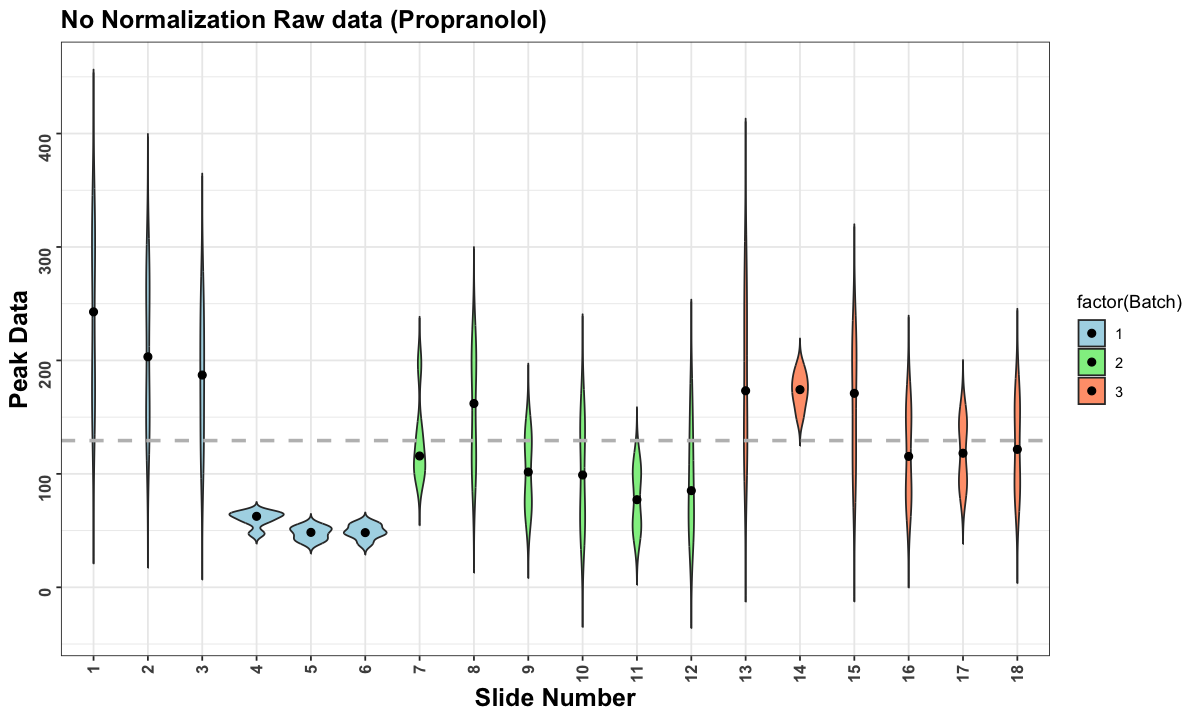

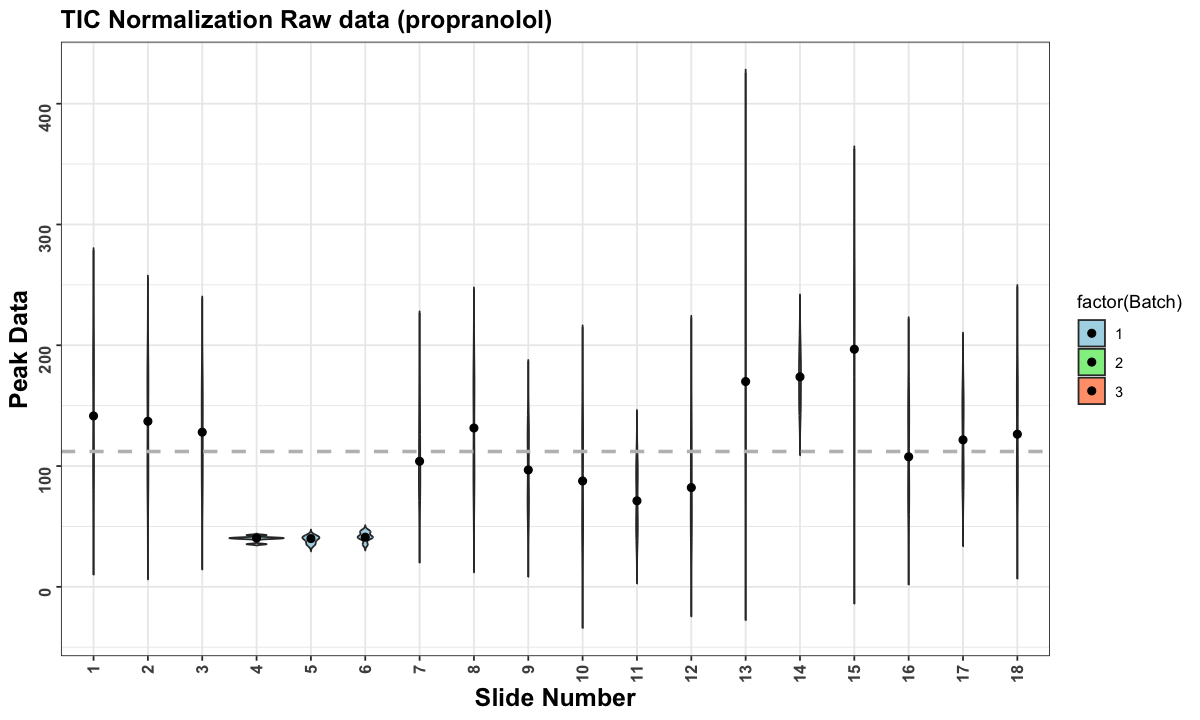

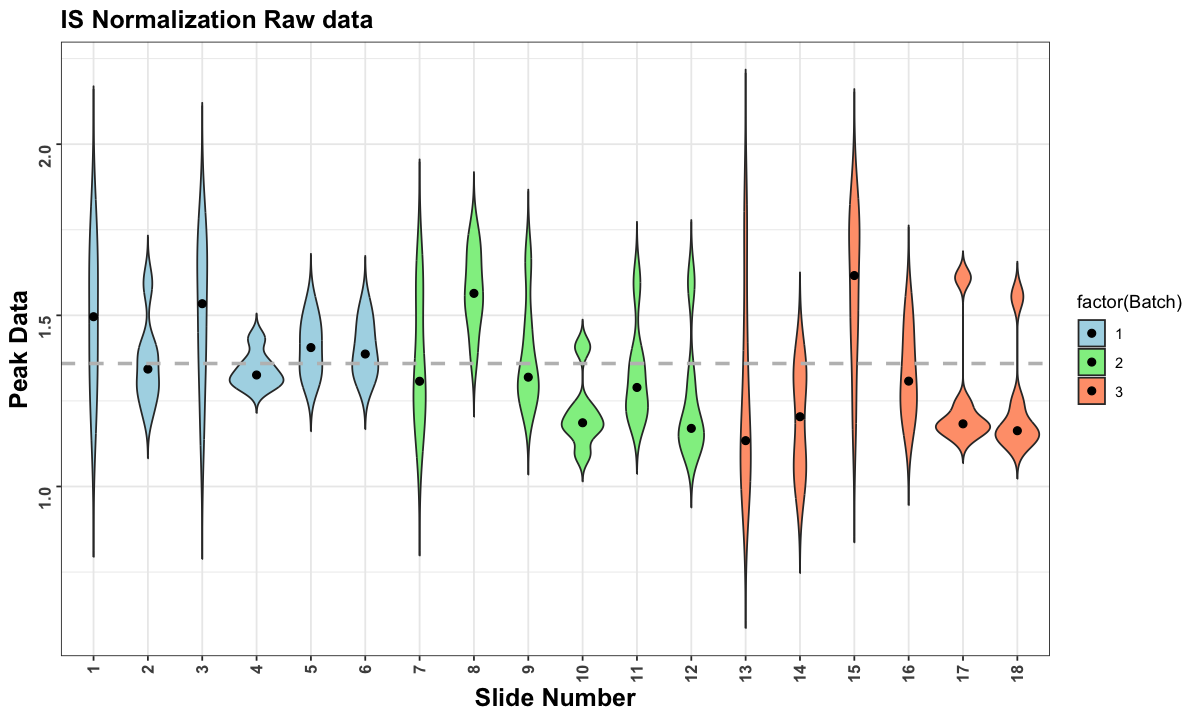

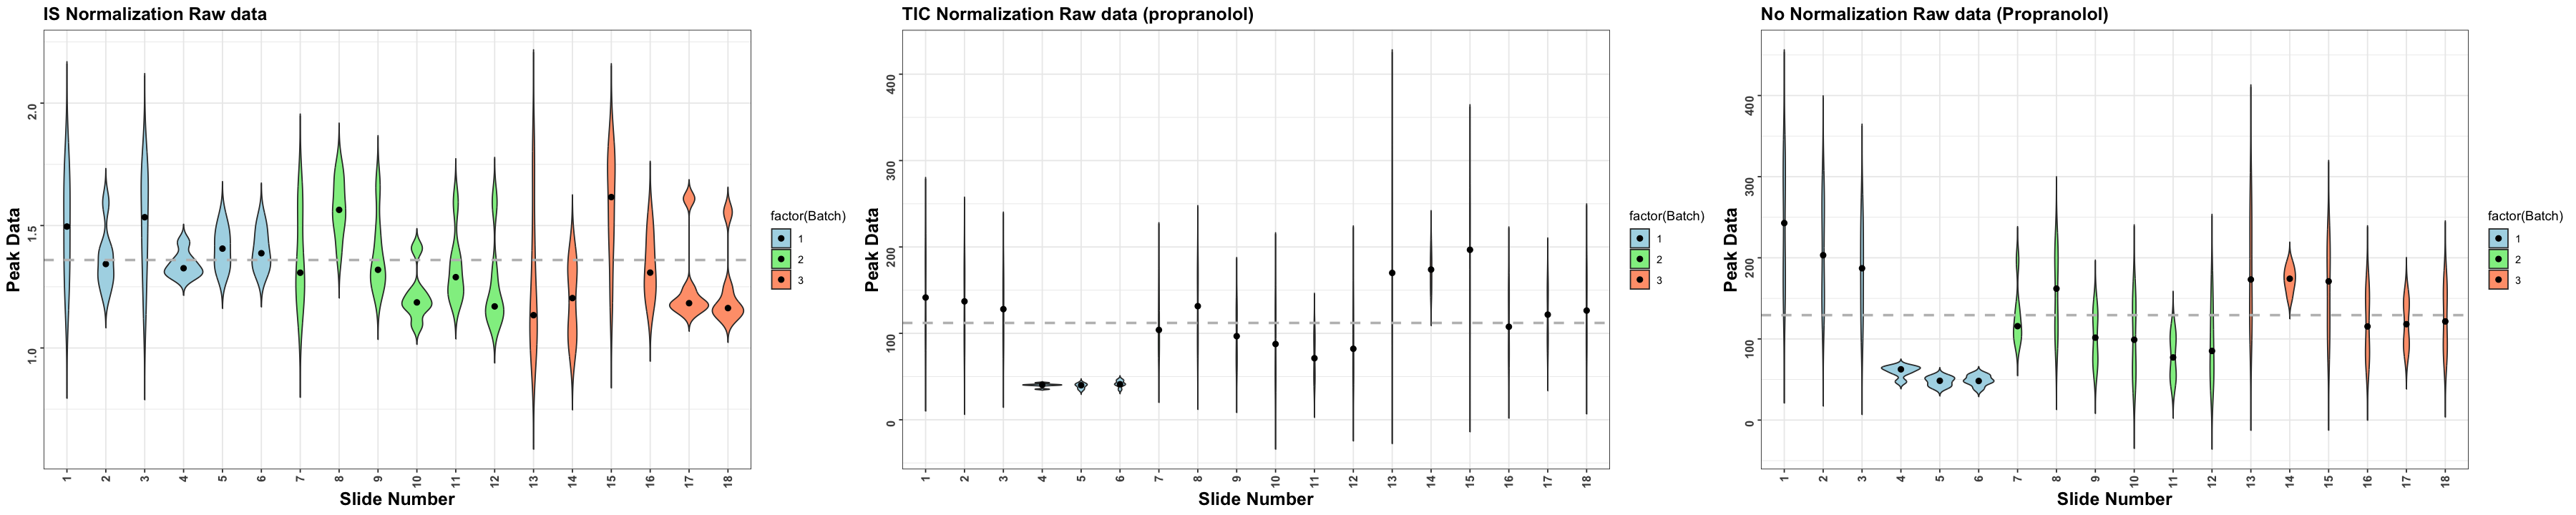

In [85]:
## Violin Plot ##

# violin plot for propranolol no normalization
# Load required library
library(ggplot2)
library(dplyr)

propranolol_data_trans <- as.data.frame(t(propranolol_data))
propranolol_data_trans[] <- lapply(propranolol_data_trans, as.numeric)

# Extract slide number
slide_number <- gsub("^.*S(\\d+)_.*", "\\1", names(propranolol_data_trans))
slide_number <- as.numeric(slide_number)

# Create violin plot data frame
violin_data <- data.frame(
  Slide = slide_number,
  Batch = propranolol_data$batch,
  Value = unlist(propranolol_data_trans[3, ])
)

# Sort the data frame based on the Slide column
violin_data <- violin_data %>%
  arrange(Slide)

# find mean of all samples
mean_value <- mean(violin_data$Value)

# format the violin plot
options(repr.plot.width = 10, repr.plot.height = 6)  # Adjust width and height as desired

# Create a violin plot with adjusted width
violin_plot <- ggplot(violin_data, aes(x = factor(Slide), y = Value, fill = factor(Batch))) +
  geom_violin(position = position_dodge(width = 0.5), trim = FALSE, width = 1) +
  stat_summary(fun = median, geom = "point", shape = 20, size = 3, color = "black") +
  geom_hline(yintercept = mean_value, linetype = "dashed", color = "gray", linewidth = 1) +
  scale_fill_manual(values = c("1" = "#ADD8E6", "2" = "#90EE90", "3" = "#FFA07A")) +
  labs(x = "Slide Number", y = "Peak Data", title = "No Normalization Raw data (Propranolol)") +
  theme_bw() +
  theme(
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, face = "bold"),
    axis.text.y = element_text(angle = 90, vjust = 0.5, hjust = 1, face = "bold"),
    axis.title = element_text(face = "bold", size = 15),  # Bold and increase size of axis titles
    plot.title = element_text(face = "bold", size = 15),  # Bold and increase size of plot title
    axis.text = element_text(size = 10)  # Increase size of axis values
  )

# Display the violin plot
print(violin_plot)

# violin plot for propranolol TIC normalization
propranolol_data_trans <- as.data.frame(t(propranolol_data_TIC))
propranolol_data_trans[] <- lapply(propranolol_data_trans, as.numeric)

# Extract slide number
slide_number <- gsub("^.*S(\\d+)_.*", "\\1", names(propranolol_data_trans))
slide_number <- as.numeric(slide_number)

# Create violin plot data frame
violin_data <- data.frame(
  Slide = slide_number,
  Batch = propranolol_data$batch,
  Value = unlist(propranolol_data_trans[3, ])
)

# Sort the data frame based on the Slide column
violin_data <- violin_data %>%
  arrange(Slide)

# find mean of all samples
mean_value <- mean(violin_data$Value)

# format the violin plot
options(repr.plot.width = 10, repr.plot.height = 6)  # Adjust width and height as desired

# Create a violin plot with adjusted width
violin_plot_TIC <- ggplot(violin_data, aes(x = factor(Slide), y = Value, fill = factor(Batch))) +
  geom_violin(position = position_dodge(width = 0.5), trim = FALSE, width = 1) +
  stat_summary(fun = median, geom = "point", shape = 20, size = 3, color = "black") +
  geom_hline(yintercept = mean_value, linetype = "dashed", color = "gray", linewidth = 1) +
  scale_fill_manual(values = c("1" = "#ADD8E6", "2" = "#90EE90", "3" = "#FFA07A")) +
  labs(x = "Slide Number", y = "Peak Data", title = "TIC Normalization Raw data (propranolol)") +
  theme_bw() +
  theme(
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, face = "bold"),
    axis.text.y = element_text(angle = 90, vjust = 0.5, hjust = 1, face = "bold"),
    axis.title = element_text(face = "bold", size = 15),  # Bold and increase size of axis titles
    plot.title = element_text(face = "bold", size = 15),  # Bold and increase size of plot title
    axis.text = element_text(size = 10)  # Increase size of axis values
  )

# Display the violin plot
print(violin_plot_TIC)

# violin plot for IS_norm
propranolol_data_trans <- as.data.frame(t(ratio_data))
propranolol_data_trans[] <- lapply(propranolol_data_trans, as.numeric)

# Extract slide number
slide_number <- gsub("^.*S(\\d+)_.*", "\\1", names(propranolol_data_trans))
slide_number <- as.numeric(slide_number)

# Create violin plot data frame
violin_data <- data.frame(
  Slide = slide_number,
  Batch = propranolol_data$batch,
  Value = unlist(propranolol_data_trans[3, ])
)

# Sort the data frame based on the Slide column
violin_data <- violin_data %>%
  arrange(Slide)

# find mean of all samples
mean_value <- mean(violin_data$Value)

# format the violin plot
options(repr.plot.width = 10, repr.plot.height = 6)  # Adjust width and height as desired

# Create a violin plot with adjusted width
violin_plot_IS <- ggplot(violin_data, aes(x = factor(Slide), y = Value, fill = factor(Batch))) +
  geom_violin(position = position_dodge(width = 0.5), trim = FALSE, width = 1) +
  stat_summary(fun = median, geom = "point", shape = 20, size = 3, color = "black") +
  geom_hline(yintercept = mean_value, linetype = "dashed", color = "gray", linewidth = 1) +
  scale_fill_manual(values = c("1" = "#ADD8E6", "2" = "#90EE90", "3" = "#FFA07A")) +
  labs(x = "Slide Number", y = "Peak Data", title = "IS Normalization Raw data") +
  theme_bw() +
  theme(
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, face = "bold"),
    axis.text.y = element_text(angle = 90, vjust = 0.5, hjust = 1, face = "bold"),
    axis.title = element_text(face = "bold", size = 15),  # Bold and increase size of axis titles
    plot.title = element_text(face = "bold", size = 15),  # Bold and increase size of plot title
    axis.text = element_text(size = 10)  # Increase size of axis values
  )

# Display the violin plot
print(violin_plot_IS)

# Display combined
library(gridExtra)
options(repr.plot.width = 30, repr.plot.height = 6)  # Adjust width and height as desired
combined_violin_plot <- grid.arrange(violin_plot_IS, violin_plot_TIC, violin_plot, ncol = 3)

Total Score: 80.58 %

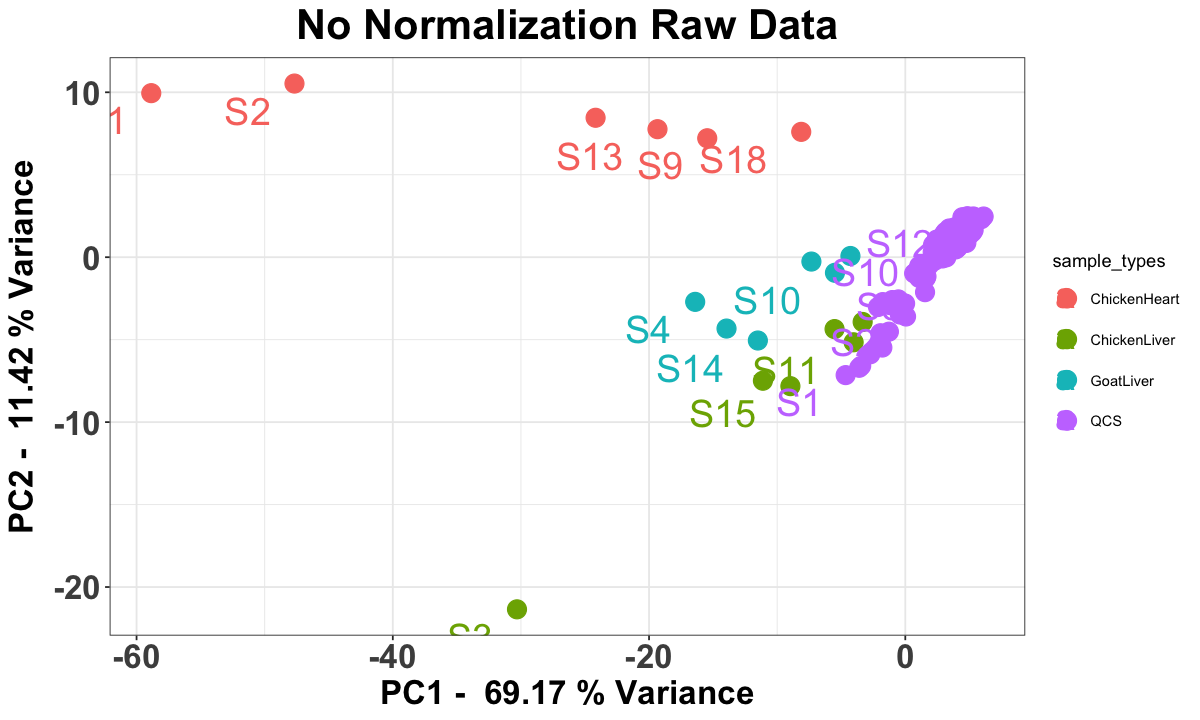

In [86]:
## PCA plot ##
# pca plot for no norm
library(ggplot2)
library(stringr)
library(zoo)
library(dplyr)

# format pca plot
options(repr.plot.width = 10, repr.plot.height = 6)  # Adjust width and height as desired

# convert all columns combined_batch_data_df as numeric
combined_batch_data_df_numeric <- combined_batch_data_df %>%
  mutate_all(as.numeric)

# extract combined_batch_data df 
adjusted <- combined_batch_data_df_numeric[, -(1:3)]
batch_matrix <- data.frame(adjusted)
sample_ID <- str_extract(colnames(batch_matrix), "(S|m/z)\\d+")

# Create the regular expression pattern for sample_set
pattern <- paste(sample_set, collapse = "|")

# Extract sample types from column names using the defined pattern
sample_types <- str_extract(colnames(batch_matrix), pattern)
sample_types[is.na(sample_types)] <- "QCS"

# Transpose the data so that samples are on rows and features on columns
batch_data_t <- t(as.matrix(batch_matrix))

# Create a new data frame with the transposed matrix
batch_data_t_df <- as.data.frame(batch_data_t)

# Perform PCA, assuming batch_data_t_df contains the transposed data
batch_pca <- prcomp(batch_data_t_df, center = TRUE, scale. = TRUE)

# Create a data frame for plotting the PCA
pca_data <- data.frame(Sample = sample_ID, batch_pca$x)

# Plot PCA with colored sample dots based on sample type
pca_data$Score <- pca_data$PC1 + pca_data$PC2
pca_data$Type <- sample_types

# Calculate the PC1 and PC2 scores
pc1_score <- batch_pca$sdev[1]^2
pc2_score <- batch_pca$sdev[2]^2

# Calculate the total score as the sum of PC1 and PC2 scores
total_score <- pc1_score + pc2_score

# Display the score 
total_score_text_recon <- paste("Total Score:", round(total_score / sum(batch_pca$sdev^2) * 100, 2), "%")
cat(total_score_text_recon)

# Create PCA plot
plot <- ggplot(pca_data, aes(x = PC1, y = PC2, color = sample_types, label = Sample)) +
  geom_point(size = 5) +
  geom_text(hjust = 1.5, vjust = 1.5, size = 8, check_overlap = TRUE) +  # Increased label size
  xlab(paste("PC1 - ", round(batch_pca$sdev[1]^2 / sum(batch_pca$sdev^2) * 100, 2), "% Variance")) +
  ylab(paste("PC2 - ", round(batch_pca$sdev[2]^2 / sum(batch_pca$sdev^2) * 100, 2), "% Variance")) +
  ggtitle("No Normalization Raw Data") +
  theme_bw() +
  theme(legend.position = "right", axis.text = element_text(size = 20, face='bold'), 
        axis.title = element_text(size = 20, face='bold'),
        plot.title = element_text(size = 25, hjust = 0.5, face = 'bold'))
print(plot)

Total Score: 86.3 %

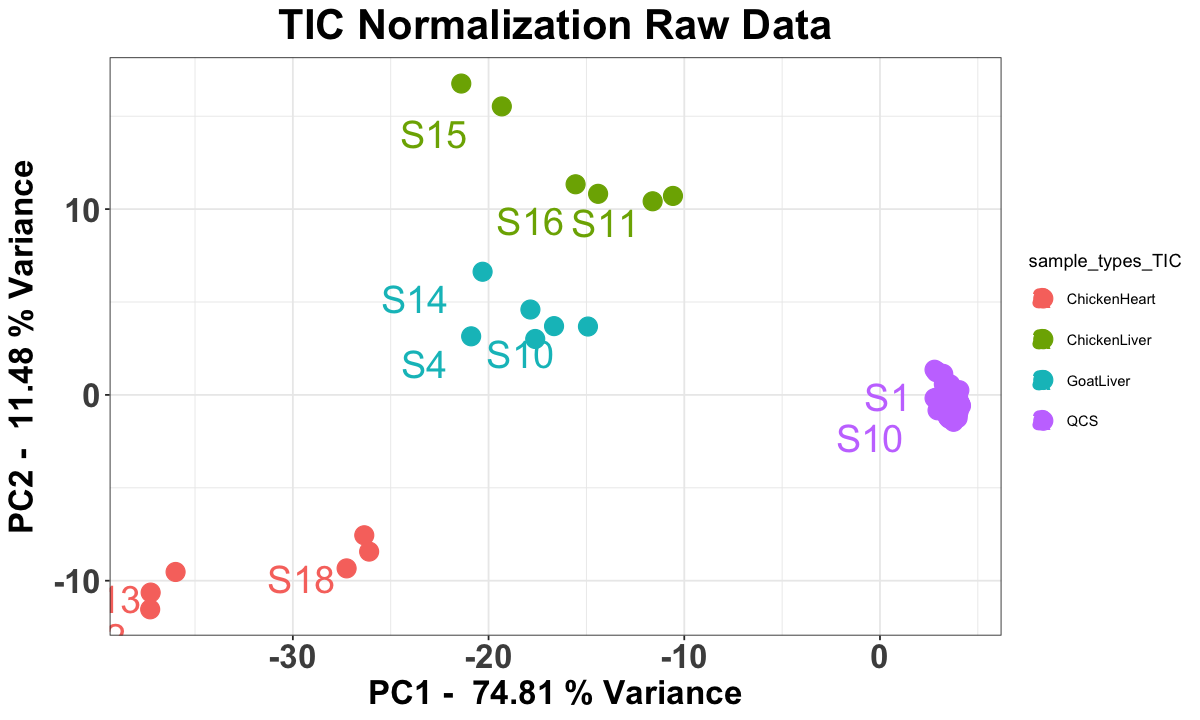

In [87]:
## PCA plot ##
# pca plot for TIC norm
library(ggplot2)
library(stringr)
library(zoo)
library(dplyr)

# format pca plot
options(repr.plot.width = 10, repr.plot.height = 6)  # Adjust width and height as desired

# convert all columns combined_batch_data_df as numeric
combined_batch_data_df_numeric <- combined_batch_data_df_TIC %>%
  mutate_all(as.numeric)

# extract combined_batch_data df 
adjusted <- combined_batch_data_df_numeric[, -(1:3)]
batch_matrix <- data.frame(adjusted)
sample_ID <- str_extract(colnames(batch_matrix), "(S|m/z)\\d+")

# Create the regular expression pattern for sample_set
pattern <- paste(sample_set, collapse = "|")

# Extract sample types from column names using the defined pattern
sample_types_TIC <- str_extract(colnames(batch_matrix), pattern)
sample_types_TIC[is.na(sample_types_TIC)] <- "QCS"

# Transpose the data so that samples are on rows and features on columns
batch_data_t <- t(as.matrix(batch_matrix))

# Create a new data frame with the transposed matrix
batch_data_t_df <- as.data.frame(batch_data_t)

# Perform PCA, assuming batch_data_t_df contains the transposed data
batch_pca_TIC <- prcomp(batch_data_t_df, center = TRUE, scale. = TRUE)

# Create a data frame for plotting the PCA
pca_data_TIC <- data.frame(Sample = sample_ID, batch_pca_TIC$x)

# Plot PCA with colored sample dots based on sample type
pca_data_TIC$Score <- pca_data_TIC$PC1 + pca_data_TIC$PC2
pca_data_TIC$Type <- sample_types_TIC

# Calculate the PC1 and PC2 scores
pc1_score <- batch_pca_TIC$sdev[1]^2
pc2_score <- batch_pca_TIC$sdev[2]^2

# Calculate the total score as the sum of PC1 and PC2 scores
total_score <- pc1_score + pc2_score

# Display the score 
total_score_text_recon <- paste("Total Score:", round(total_score / sum(batch_pca_TIC$sdev^2) * 100, 2), "%")
cat(total_score_text_recon)

# Create PCA plot
plot_TIC <- ggplot(pca_data_TIC, aes(x = PC1, y = PC2, color = sample_types_TIC, label = Sample)) +
  geom_point(size = 5) +
  geom_text(hjust = 1.5, vjust = 1.5, size = 8, check_overlap = TRUE) +  # Increased label size
  xlab(paste("PC1 - ", round(batch_pca_TIC$sdev[1]^2 / sum(batch_pca_TIC$sdev^2) * 100, 2), "% Variance")) +
  ylab(paste("PC2 - ", round(batch_pca_TIC$sdev[2]^2 / sum(batch_pca_TIC$sdev^2) * 100, 2), "% Variance")) +
  ggtitle("TIC Normalization Raw Data") +
  theme_bw() +
  theme(legend.position = "right", axis.text = element_text(size = 20, face='bold'), 
        axis.title = element_text(size = 20, face='bold'),
        plot.title = element_text(size = 25, hjust = 0.5, face = 'bold'))
print(plot_TIC)

TableGrob (1 x 2) "arrange": 2 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]


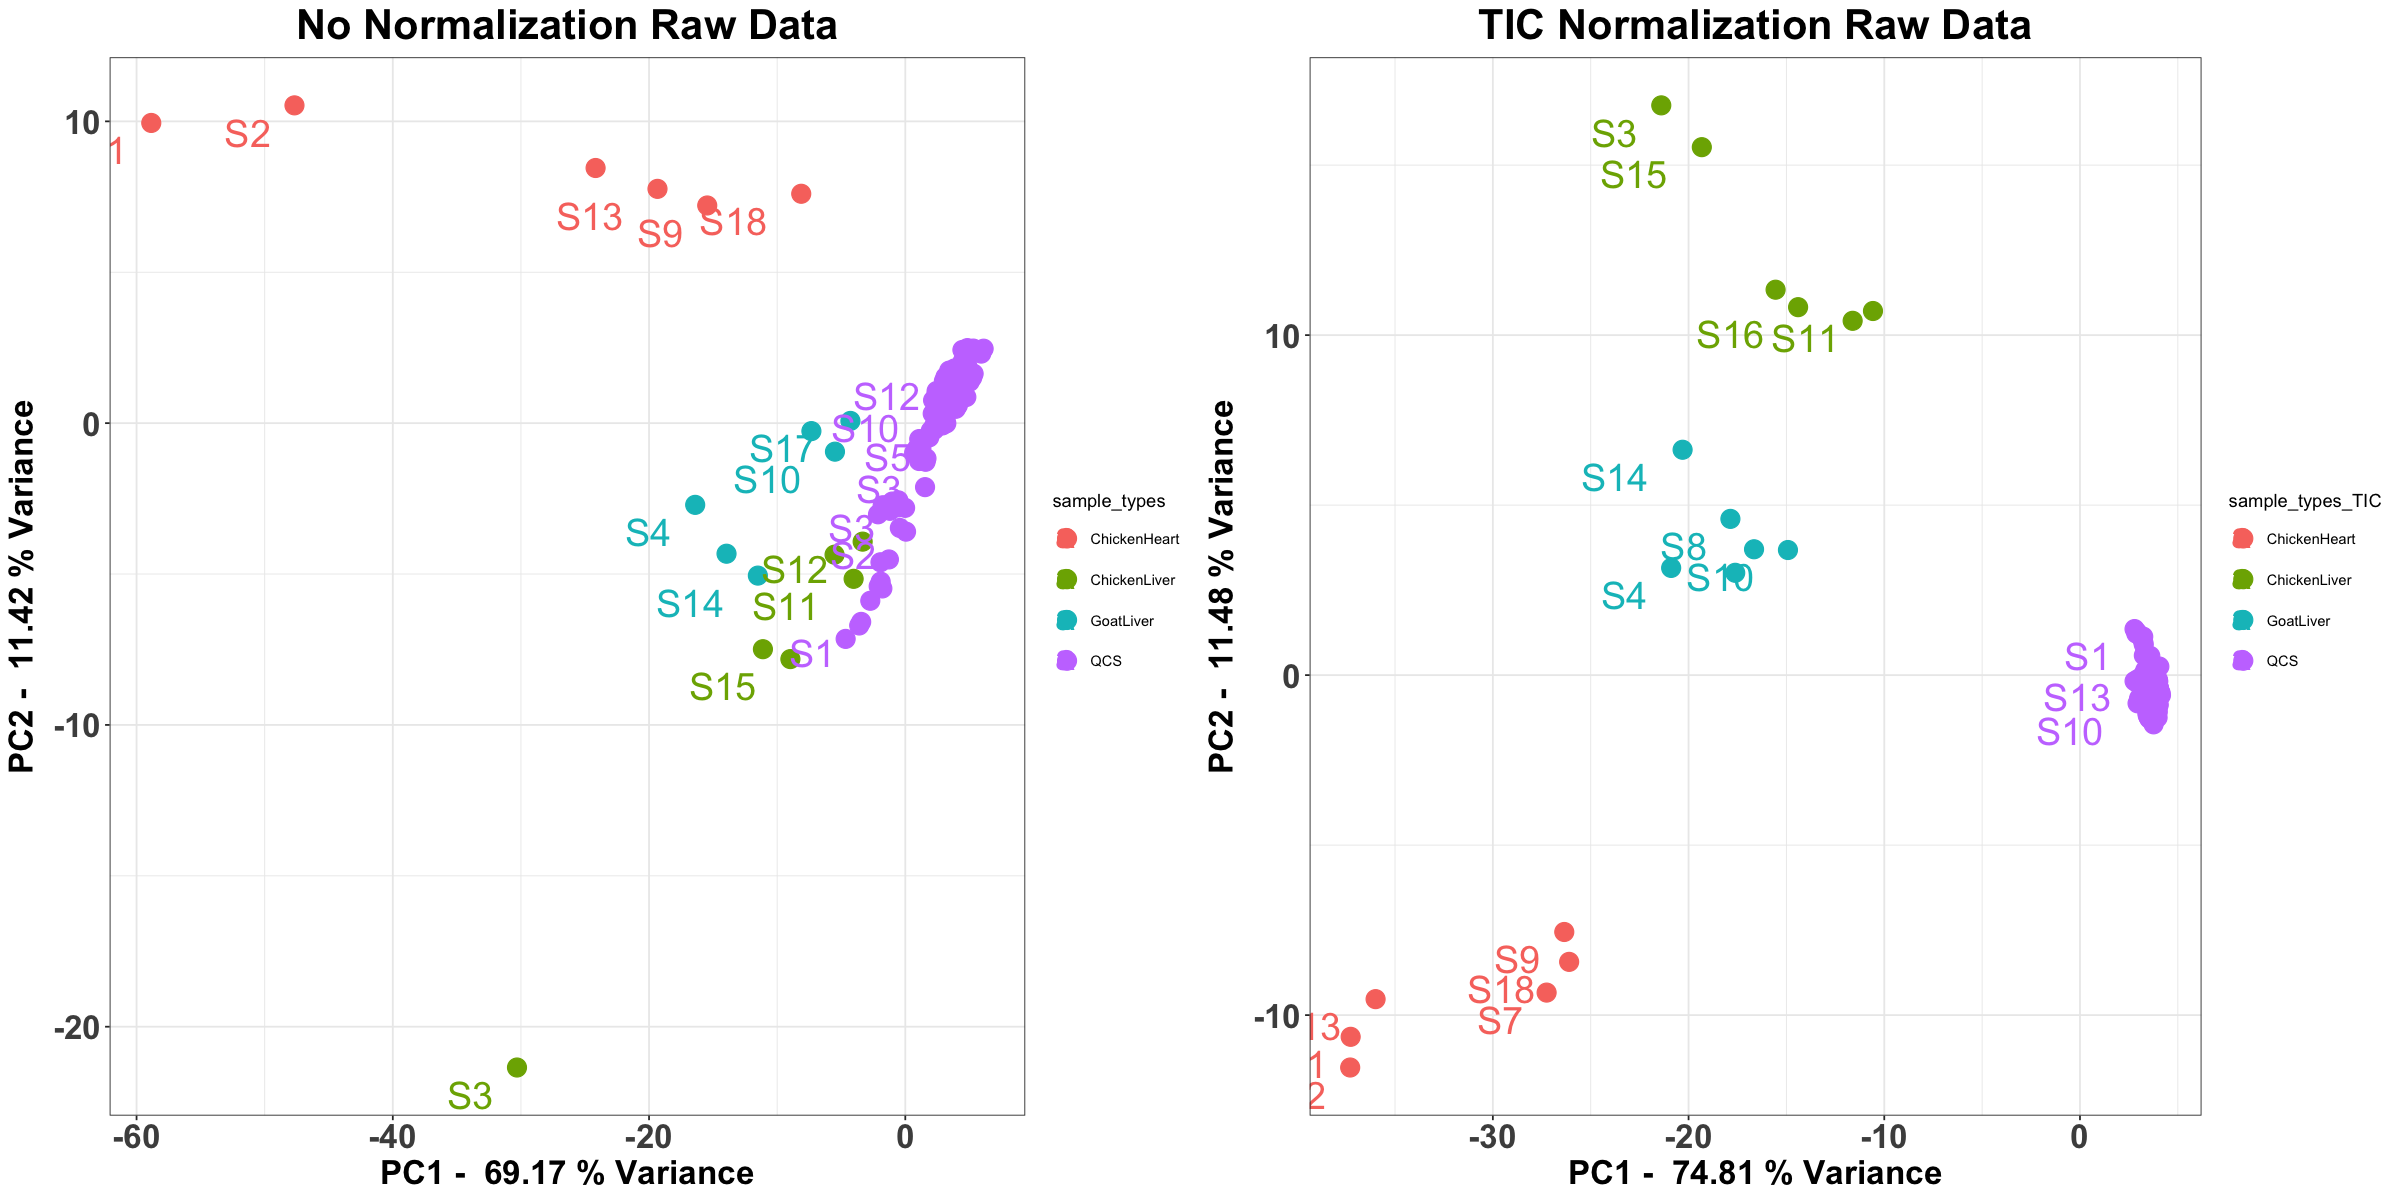

In [88]:
## Overview PCA Plot ##
library(gridExtra)
options(repr.plot.width = 20, repr.plot.height = 10)
combined_plots <- grid.arrange(plot, plot_TIC, ncol = 2)
print(combined_plots)

## Demo 2: QCS + Tissue Evaluation and Correction ##
1. QCS RSD 
2. QCS PCA plot --> Average distance of QCS
3. Tissue RSD 
4. Tissue PCA plot --> Intra/Intergroup distance of Tissue Samples
5. Correction
6. Comparision

## QCS RSD ##

In [90]:
## Overview RSD Table Propranolol ##
overview_table_pro <- data.frame(
  Row_Names = c("Intraday 1", "Intraday 2", "Intraday 3", "Interday"),
  No_Norm_RSD = c(rsd_propranolol[,2]),
  TIC_Norm_RSD = c(rsd_propranolol_TIC[,2]),
  IS_Norm_RSD = c(rsd_ratio[,2])  
)
# Set the column names
colnames(overview_table_pro) <- c(paste("mz value:", propranolol_mz_value), "No_norm", "TIC_norm", "IS_norm")

library(kableExtra)
library(htmltools)
library(IRdisplay)

# Displaying rsd table
display_rsd_table_pro <- kable(overview_table_pro, format = "html", row.names = FALSE, 
                               col.names = c(paste("m/z value:", propranolol_mz_value), "No_norm", "TIC_norm", "IS_norm")) %>%
  kable_styling(full_width = FALSE)

# Add table name
display_rsd_table_pro <- paste("<h2 style='text-align: center;'>Overview RSD Table Propranolol</h2>", 
                               as.character(display_rsd_table_pro))

# Save HTML table to a file
display_html(display_rsd_table_pro)

Overview RSD Table Propranolol 
 
 
 m/z value: 260.186 
 No_norm 
 TIC_norm 
 IS_norm 
 
 
 
 
 Intraday 1 
 70.5% 
 63.51% 
 10.47% 
 
 
 Intraday 2 
 41.41% 
 38.88% 
 13.6% 
 
 
 Intraday 3 
 34.07% 
 36.26% 
 17.12% 
 
 
 Interday 
 52.05% 
 50.68% 
 14.11%

## QCS PCA Plot ##

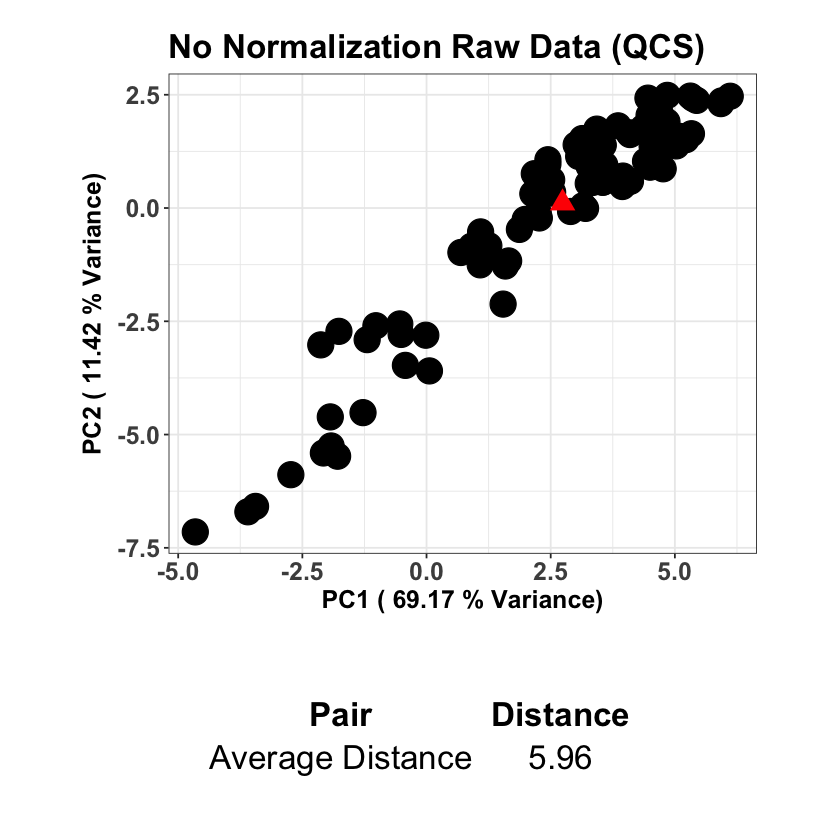

In [91]:
## PCA plot of QCS ##
# no normalization raw data
# Load necessary libraries
library(ggplot2)
library(ggrepel)
library(cowplot)
library(gridExtra)

# gets rid of plot format
options(repr.plot.width = NULL, repr.plot.height = NULL)

# Calculate PCA scores
pca_scores <- batch_pca$x

# Identify QCS samples based on sample types
qcs_samples <- which(sample_types == "QCS")

# Extract PCA scores for QCS samples
qcs_scores <- pca_scores[qcs_samples, ]

# Compute the centroid of QCS samples
qcs_centroid <- colMeans(qcs_scores)

# Calculate PC1 and PC2 variances
pc1_variance <- round(batch_pca$sdev[1]^2 / sum(batch_pca$sdev^2) * 100, 2)
pc2_variance <- round(batch_pca$sdev[2]^2 / sum(batch_pca$sdev^2) * 100, 2)

# Plot PCA plot with QCS samples and their centroid
pca_plot_qcs <- ggplot(data.frame(PC1 = qcs_scores[,1], PC2 = qcs_scores[,2]), aes(x = PC1, y = PC2)) +
  geom_point(size = 7) +  # Plot QCS samples
  geom_point(data = data.frame(PC1 = qcs_centroid[1], PC2 = qcs_centroid[2]), aes(x = PC1, y = PC2), shape = 17, fill = "red", color = "red", size = 5) +  # Plot centroid as triangle with filled red color
  labs(x = paste("PC1 (", pc1_variance, "% Variance)"), y = paste("PC2 (", pc2_variance, "% Variance)"), title = "No Normalization Raw Data (QCS)") +
  theme_bw() +
  theme(axis.title.x = element_text(face = "bold", size = 15),
        axis.title.y = element_text(face = "bold", size = 15),
        axis.text = element_text(size = 15, face = "bold"),
        plot.margin = margin(20, 50, 10, 50),  # Adjust the bottom margin to 10 units
        plot.title = element_text(face = "bold", size = 20))  # Make the plot title bold and size 20

# Calculate average distance of QCS samples from the centroid
qcs_centroid_distances <- sqrt(rowSums((qcs_scores - qcs_centroid)^2))
average_qcs_distance <- mean(qcs_centroid_distances)

# Create a data frame for average distance
average_distance_qcs_df <- data.frame(
  Pair = "Average Distance",
  Distance = average_qcs_distance
)

# Round distances for better presentation
average_distance_qcs_df$Distance <- round(average_distance_qcs_df$Distance, 2)

# Create a table plot
table_plot_qcs <- tableGrob(average_distance_qcs_df, theme = ttheme_minimal(base_size = 20), rows = NULL)

# Combine the PCA plot and the table
combined_plot_qcs <- plot_grid(pca_plot_qcs, table_plot_qcs, ncol = 1, align = "v", axis = "lr", rel_heights = c(3, 1))

# Print the combined plot
print(combined_plot_qcs)

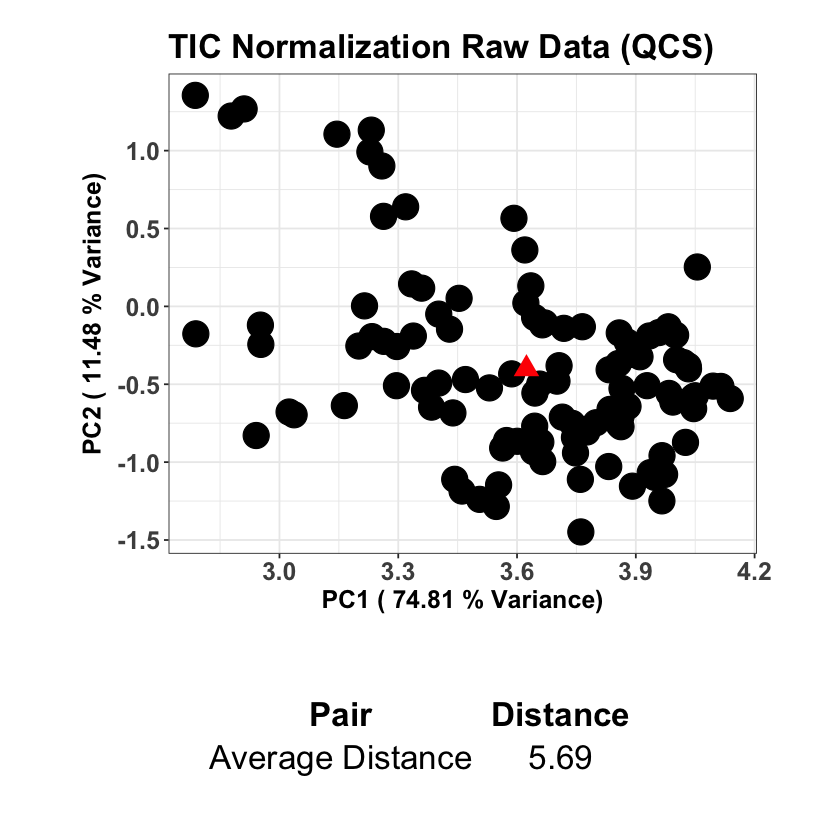

In [92]:
## PCA plot of QCS ##
# no normalization raw data
# Load necessary libraries
library(ggplot2)
library(ggrepel)
library(cowplot)
library(gridExtra)

# gets rid of plot format
options(repr.plot.width = NULL, repr.plot.height = NULL)

# Calculate PCA scores
pca_scores <- batch_pca_TIC$x

# Identify QCS samples based on sample types
qcs_samples <- which(sample_types == "QCS")

# Extract PCA scores for QCS samples
qcs_scores <- pca_scores[qcs_samples, ]

# Compute the centroid of QCS samples
qcs_centroid <- colMeans(qcs_scores)

# Calculate PC1 and PC2 variances
pc1_variance <- round(batch_pca_TIC$sdev[1]^2 / sum(batch_pca_TIC$sdev^2) * 100, 2)
pc2_variance <- round(batch_pca_TIC$sdev[2]^2 / sum(batch_pca_TIC$sdev^2) * 100, 2)

# Plot PCA plot with QCS samples and their centroid
pca_plot_qcs <- ggplot(data.frame(PC1 = qcs_scores[,1], PC2 = qcs_scores[,2]), aes(x = PC1, y = PC2)) +
  geom_point(size = 7) +  # Plot QCS samples
  geom_point(data = data.frame(PC1 = qcs_centroid[1], PC2 = qcs_centroid[2]), aes(x = PC1, y = PC2), shape = 17, fill = "red", color = "red", size = 5) +  # Plot centroid as triangle with filled red color
  labs(x = paste("PC1 (", pc1_variance, "% Variance)"), y = paste("PC2 (", pc2_variance, "% Variance)"), title = "TIC Normalization Raw Data (QCS)") +
  theme_bw() +
  theme(axis.title.x = element_text(face = "bold", size = 15),
        axis.title.y = element_text(face = "bold", size = 15),
        axis.text = element_text(size = 15, face = "bold"),
        plot.margin = margin(20, 50, 10, 50),  # Adjust the bottom margin to 10 units
        plot.title = element_text(face = "bold", size = 20))  # Make the plot title bold and size 20

# Calculate average distance of QCS samples from the centroid
qcs_centroid_distances <- sqrt(rowSums((qcs_scores - qcs_centroid)^2))
average_qcs_distance_TIC <- mean(qcs_centroid_distances)

# Create a data frame for average distance
average_distance_qcs_df <- data.frame(
  Pair = "Average Distance",
  Distance = average_qcs_distance_TIC
)

# Round distances for better presentation
average_distance_qcs_df$Distance <- round(average_distance_qcs_df$Distance, 2)

# Create a table plot
table_plot_qcs <- tableGrob(average_distance_qcs_df, theme = ttheme_minimal(base_size = 20), rows = NULL)

# Combine the PCA plot and the table
combined_plot_TIC_qcs <- plot_grid(pca_plot_qcs, table_plot_qcs, ncol = 1, align = "v", axis = "lr", rel_heights = c(3, 1))

# Print the combined plot
print(combined_plot_TIC_qcs)

TableGrob (1 x 2) "arrange": 2 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]


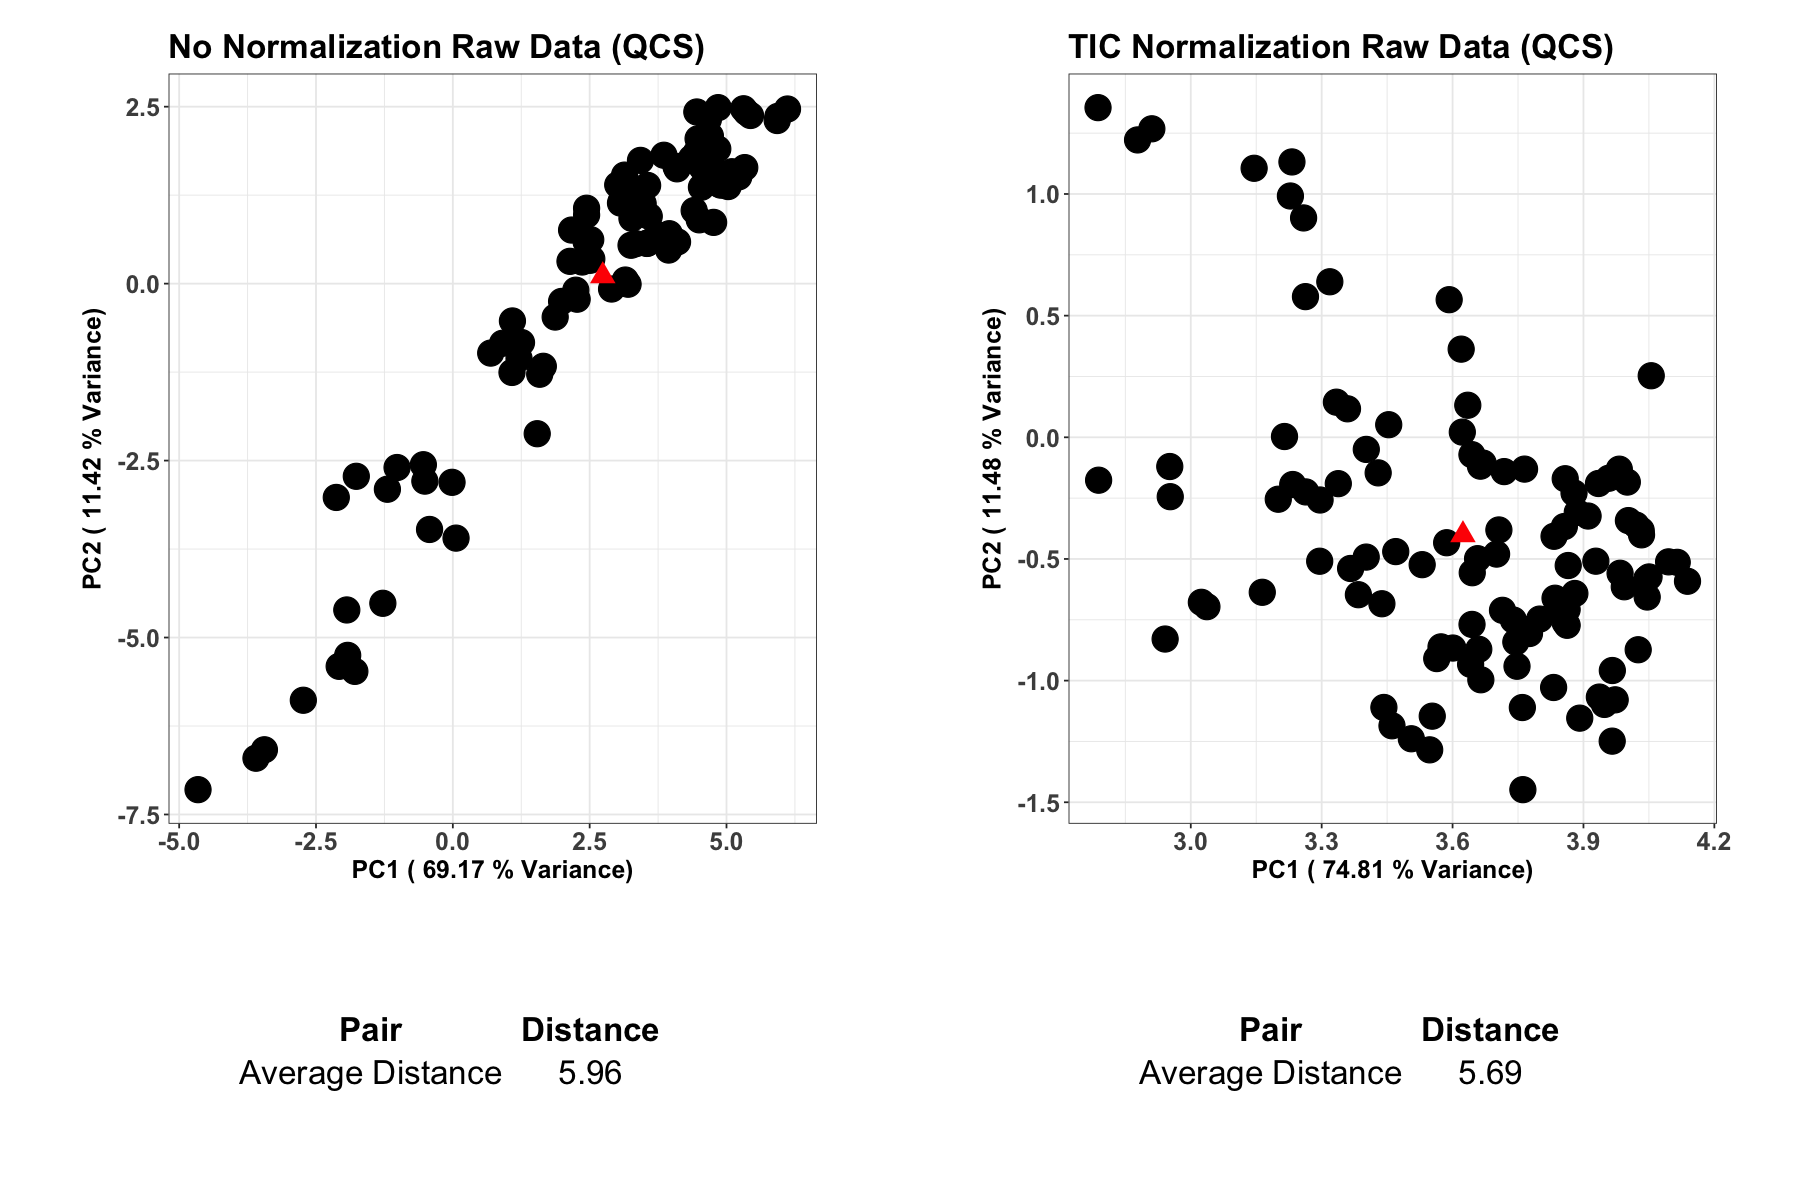

In [93]:
## Overview QCS PCA PLOT ##
library(gridExtra)
options(repr.plot.width = 15, repr.plot.height = 10)
combined_plots <- grid.arrange(combined_plot_qcs, combined_plot_TIC_qcs, ncol = 2)
print(combined_plots)

## Average Distance of QCS ##

In [128]:
## Calculate QCS eucleadan distance ##
# No normalization
qcs_indices <- which(pca_data$Type == "QCS") # 108
pca_scores_qcs <- pca_data[qcs_indices, -which(names(pca_data) == "Score")]
numeric_cols <- sapply(pca_scores_qcs, is.numeric)
pca_scores_numeric <- pca_scores_qcs[, numeric_cols]

# calculate euclidean distance
euclidean_distances <- dist(pca_scores_numeric)
average_distance_ec <- mean(euclidean_distances)
cat("Average QCS distance for no normalization is", average_distance_ec, "\n")

Average QCS distance for no normalization is 5.728145 


In [129]:
## Calculate QCS eucleadan distance ##
# TIC normalization
qcs_indices <- which(pca_data_TIC$Type == "QCS") # 108
pca_scores_qcs <- pca_data_TIC[qcs_indices, -which(names(pca_data_TIC) == "Score")]
numeric_cols <- sapply(pca_scores_qcs, is.numeric)
pca_scores_numeric <- pca_scores_qcs[, numeric_cols]

# calculate euclidean distance
euclidean_distances <- dist(pca_scores_numeric)
average_distance_ec_TIC <- mean(euclidean_distances)
cat("Average QCS distance for TIC normalization is", average_distance_ec_TIC, "\n")

Average QCS distance for TIC normalization is 3.325513 


## Tissue RSD ##

In [96]:
## Tissue Variation RSD No Norm ##

# extract tissue samples based on the rownames
sample_set_regex <- paste(sample_set, collapse = "|")
sample_set_rows <- grep(sample_set_regex, rownames(combined_batch_info_data))
tissue_samples <- combined_batch_info_data[sample_set_rows,]
row_names <- rownames(tissue_samples)
tissue_samples <- as.data.frame(apply(tissue_samples, 2, as.numeric))
rownames(tissue_samples) <- row_names

# Function to calculate rsd for tissue
calculate_batch_rsd_combined <- function(tissue_samples) {
  # Function to calculate batch RSD for a given tissue dataset
  calculate_batch_rsd <- function(sample_dataset, batch_number) {
    # Extract data for the specified batch number
    batch_data <- sample_dataset[sample_dataset$batch == batch_number, -(1:2)]
    
    # Calculate mean and standard deviation for each analyte
    means <- apply(batch_data, 2, mean, na.rm = TRUE)
    std_devs <- apply(batch_data, 2, sd, na.rm = TRUE)
    
    # Calculate RSD
    rsd <- (std_devs / means) * 100
    
    # Calculate mean RSD and standard deviation of RSD
    mean_rsd <- mean(rsd)
    std_rsd <- sd(rsd)
    
    # Format the results
    rsd_formatted <- sprintf("%.2f ± %.2f%%", mean_rsd, std_rsd)
    
    # Return the formatted RSD
    return(rsd_formatted)
  }
  
  # Function to calculate interday RSD for a given tissue dataset
  calculate_interday_rsd <- function(sample_dataset) {
    # Extract data for interday calculation
    interday_data <- sample_dataset[, -(1:2)]
    
    # Calculate mean and standard deviation for each analyte
    means <- apply(interday_data, 2, mean, na.rm = TRUE)
    std_devs <- apply(interday_data, 2, sd, na.rm = TRUE)
    
    # Calculate RSD
    rsd <- (std_devs / means) * 100
    
    # Calculate mean RSD and standard deviation of RSD
    mean_rsd <- mean(rsd)
    std_rsd <- sd(rsd)
    
    # Format the results
    rsd_formatted <- sprintf("%.2f ± %.2f%%", mean_rsd, std_rsd)
    
    # Return the formatted RSD
    return(rsd_formatted)
  }
  
  # Function to calculate batch RSD for multiple batches
  calculate_batch_rsd_multiple <- function(sample_dataset, unique_batches) {
    rsd_results <- list()
    for (batch_number in unique_batches) {
      rsd_results[[as.character(batch_number)]] <- calculate_batch_rsd(sample_dataset, batch_number)
    }
    return(rsd_results)
  }
  
  # Extract unique tissue sample datasets for each tissue type
  unique_tissues <- unique(gsub(".*_(\\w+)_\\d+.*", "\\1", rownames(tissue_samples)))
  
  # Initialize list to store results for each tissue type
  rsd_results <- list()
  
  # Loop through each tissue type
  for (tissue_type in unique_tissues) {
    # Filter tissue samples for the current tissue type
    tissue_data <- tissue_samples[grep(paste0(tissue_type, "_"), rownames(tissue_samples)), ]
    
    # Order the dataset based on s_value
    sample_numbers <- as.numeric(gsub(".*S(\\d+)_.*", "\\1", rownames(tissue_data)))
    ordered_indices <- order(sample_numbers)
    tissue_data <- tissue_data[ordered_indices, ]
    
    # Replace negative values with 1
    tissue_data <- replace(tissue_data, tissue_data < 0, 1)
    
    # Calculate batch RSD for unique batches
    unique_batches <- unique(tissue_data$batch)
    rsd_results_tissue <- calculate_batch_rsd_multiple(tissue_data, unique_batches)
    
    # Calculate interday RSD
    interday_rsd <- calculate_interday_rsd(tissue_data)
    
    # Combine batch and interday RSD results into a data frame
    rsd_df_tissue <- data.frame(
      Batch = names(rsd_results_tissue),
      RSD = unlist(rsd_results_tissue)
    )
    rsd_df_tissue <- rbind(rsd_df_tissue, c("Interday", interday_rsd))
    rownames(rsd_df_tissue) <- NULL
    
    # Alter batch names to Intraday 1, Intraday 2, etc.
    batch_names <- c("Intraday 1", "Intraday 2", "Intraday 3")
    rsd_df_tissue$Batch <- ifelse(rsd_df_tissue$Batch == "Interday", "Interday", batch_names)
    
    # Store results for the current tissue type
    rsd_results[[tissue_type]] <- rsd_df_tissue
  }
  
  return(rsd_results)
}
rsd_results_combined <- calculate_batch_rsd_combined(tissue_samples)
#print(rsd_results_combined)

# Assuming rsd_results_combined is the output of calculate_batch_rsd_combined

library(kableExtra)
library(IRdisplay)

# Create a function to generate HTML tables for each tissue
generate_rsd_table <- function(rsd_results, tissue_name) {
  rsd_df <- rsd_results[[tissue_name]]
  kable(rsd_df, format = "html", row.names = FALSE) %>%
    kable_styling(full_width = FALSE)
}

# Generate HTML tables for each tissue
html_tables <- lapply(names(rsd_results_combined), function(tissue_name) {
  rsd_table <- generate_rsd_table(rsd_results_combined, tissue_name)
  table_name <- paste("<h2 style='text-align: center;'>", tissue_name, " RSD Table</h2>", sep = "")
  paste("<div style='display: inline-block; margin-right: 20px; text-align: center;'>", table_name, as.character(rsd_table), "</div>")
})

# Combine HTML tables into a single string
html_content <- paste(html_tables, collapse = "")

# Wrap the combined HTML content in a div with text-align: center
centered_html_content <- paste("<div style='text-align: center;'>", html_content, "</div>")

# Display the centered HTML content in JupyterLab
display_html(centered_html_content)

GoatLiver RSD Table 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 23.72 ± 8.48% 
 
 
 Intraday 2 
 25.12 ± 7.45% 
 
 
 Intraday 3 
 23.86 ± 9.95% 
 
 
 Interday 
 23.03 ± 5.61% 
 
 
 ChickenLiver RSD Table 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 37.55 ± 10.32% 
 
 
 Intraday 2 
 6.51 ± 5.53% 
 
 
 Intraday 3 
 11.49 ± 7.60% 
 
 
 Interday 
 41.29 ± 11.85% 
 
 
 ChickenHeart RSD Table 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 12.84 ± 6.84% 
 
 
 Intraday 2 
 16.93 ± 8.34% 
 
 
 Intraday 3 
 26.88 ± 12.72% 
 
 
 Interday 
 45.32 ± 8.10%

In [97]:
## Tissue Variation RSD TIC norm ##

# extract tissue samples based on the rownames
sample_set_regex <- paste(sample_set, collapse = "|")
sample_set_rows <- grep(sample_set_regex, rownames(combined_batch_info_data_TIC))
tissue_samples <- combined_batch_info_data_TIC[sample_set_rows,]
row_names <- rownames(tissue_samples)
tissue_samples <- as.data.frame(apply(tissue_samples, 2, as.numeric))
rownames(tissue_samples) <- row_names

# Function to calculate rsd for tissue
calculate_batch_rsd_combined <- function(tissue_samples) {
  # Function to calculate batch RSD for a given tissue dataset
  calculate_batch_rsd <- function(sample_dataset, batch_number) {
    # Extract data for the specified batch number
    batch_data <- sample_dataset[sample_dataset$batch == batch_number, -(1:2)]
    
    # Calculate mean and standard deviation for each analyte
    means <- apply(batch_data, 2, mean, na.rm = TRUE)
    std_devs <- apply(batch_data, 2, sd, na.rm = TRUE)
    
    # Calculate RSD
    rsd <- (std_devs / means) * 100
    
    # Calculate mean RSD and standard deviation of RSD
    mean_rsd <- mean(rsd)
    std_rsd <- sd(rsd)
    
    # Format the results
    rsd_formatted <- sprintf("%.2f ± %.2f%%", mean_rsd, std_rsd)
    
    # Return the formatted RSD
    return(rsd_formatted)
  }
  
  # Function to calculate interday RSD for a given tissue dataset
  calculate_interday_rsd <- function(sample_dataset) {
    # Extract data for interday calculation
    interday_data <- sample_dataset[, -(1:2)]
    
    # Calculate mean and standard deviation for each analyte
    means <- apply(interday_data, 2, mean, na.rm = TRUE)
    std_devs <- apply(interday_data, 2, sd, na.rm = TRUE)
    
    # Calculate RSD
    rsd <- (std_devs / means) * 100
    
    # Calculate mean RSD and standard deviation of RSD
    mean_rsd <- mean(rsd)
    std_rsd <- sd(rsd)
    
    # Format the results
    rsd_formatted <- sprintf("%.2f ± %.2f%%", mean_rsd, std_rsd)
    
    # Return the formatted RSD
    return(rsd_formatted)
  }
  
  # Function to calculate batch RSD for multiple batches
  calculate_batch_rsd_multiple <- function(sample_dataset, unique_batches) {
    rsd_results <- list()
    for (batch_number in unique_batches) {
      rsd_results[[as.character(batch_number)]] <- calculate_batch_rsd(sample_dataset, batch_number)
    }
    return(rsd_results)
  }
  
  # Extract unique tissue sample datasets for each tissue type
  unique_tissues <- unique(gsub(".*_(\\w+)_\\d+.*", "\\1", rownames(tissue_samples)))
  
  # Initialize list to store results for each tissue type
  rsd_results <- list()
  
  # Loop through each tissue type
  for (tissue_type in unique_tissues) {
    # Filter tissue samples for the current tissue type
    tissue_data <- tissue_samples[grep(paste0(tissue_type, "_"), rownames(tissue_samples)), ]
    
    # Order the dataset based on s_value
    sample_numbers <- as.numeric(gsub(".*S(\\d+)_.*", "\\1", rownames(tissue_data)))
    ordered_indices <- order(sample_numbers)
    tissue_data <- tissue_data[ordered_indices, ]
    
    # Replace negative values with 1
    tissue_data <- replace(tissue_data, tissue_data < 0, 1)
    
    # Calculate batch RSD for unique batches
    unique_batches <- unique(tissue_data$batch)
    rsd_results_tissue <- calculate_batch_rsd_multiple(tissue_data, unique_batches)
    
    # Calculate interday RSD
    interday_rsd <- calculate_interday_rsd(tissue_data)
    
    # Combine batch and interday RSD results into a data frame
    rsd_df_tissue <- data.frame(
      Batch = names(rsd_results_tissue),
      RSD = unlist(rsd_results_tissue)
    )
    rsd_df_tissue <- rbind(rsd_df_tissue, c("Interday", interday_rsd))
    rownames(rsd_df_tissue) <- NULL
    
    # Alter batch names to Intraday 1, Intraday 2, etc.
    batch_names <- c("Intraday 1", "Intraday 2", "Intraday 3")
    rsd_df_tissue$Batch <- ifelse(rsd_df_tissue$Batch == "Interday", "Interday", batch_names)
    
    # Store results for the current tissue type
    rsd_results[[tissue_type]] <- rsd_df_tissue
  }
  
  return(rsd_results)
}
rsd_results_combined_TIC <- calculate_batch_rsd_combined(tissue_samples)
#print(rsd_results_combined)

# Assuming rsd_results_combined is the output of calculate_batch_rsd_combined

library(kableExtra)
library(IRdisplay)

# Create a function to generate HTML tables for each tissue
generate_rsd_table <- function(rsd_results, tissue_name) {
  rsd_df <- rsd_results[[tissue_name]]
  kable(rsd_df, format = "html", row.names = FALSE) %>%
    kable_styling(full_width = FALSE)
}

# Generate HTML tables for each tissue
html_tables_TIC <- lapply(names(rsd_results_combined_TIC), function(tissue_name) {
  rsd_table <- generate_rsd_table(rsd_results_combined_TIC, tissue_name)
  table_name <- paste("<h2 style='text-align: center;'>", tissue_name, " RSD Table</h2>", sep = "")
  paste("<div style='display: inline-block; margin-right: 20px; text-align: center;'>", table_name, as.character(rsd_table), "</div>")
})

# Combine HTML tables into a single string
html_content_TIC <- paste(html_tables_TIC, collapse = "")

# Wrap the combined HTML content in a div with text-align: center
centered_html_content_TIC <- paste("<div style='text-align: center;'>", html_content_TIC, "</div>")

# Display the centered HTML content in JupyterLab
display_html(centered_html_content_TIC)

GoatLiver RSD Table 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 8.68 ± 6.63% 
 
 
 Intraday 2 
 9.15 ± 5.28% 
 
 
 Intraday 3 
 10.27 ± 8.49% 
 
 
 Interday 
 13.41 ± 5.13% 
 
 
 ChickenLiver RSD Table 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 13.51 ± 8.94% 
 
 
 Intraday 2 
 6.67 ± 5.24% 
 
 
 Intraday 3 
 12.02 ± 7.56% 
 
 
 Interday 
 18.61 ± 7.56% 
 
 
 ChickenHeart RSD Table 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 5.66 ± 4.95% 
 
 
 Intraday 2 
 6.96 ± 5.03% 
 
 
 Intraday 3 
 16.88 ± 10.24% 
 
 
 Interday 
 15.64 ± 5.59%

In [98]:
## Overview RSD Table ##

# Initialize an empty list to store combined HTML tables for each tissue
combined_html_list <- list()

# Iterate over each tissue type
for (tissue_name in names(rsd_results_combined)) {
  # Extract RSD tables for the current tissue type
  rsd_table <- generate_rsd_table(rsd_results_combined, tissue_name)
  rsd_table_TIC <- generate_rsd_table(rsd_results_combined_TIC, tissue_name)
  
  # Combine HTML tables for the current tissue type horizontally
  combined_rsd_table <- paste("<h2 style='text-align: center;'>", tissue_name, " RSD Table</h2>",
                              "<div style='text-align: center;'>",
                              "<div style='display: inline-block; margin-right: 20px; text-align: center;'>",
                              "<h3>No Normalization</h3>", rsd_table, "</div>",
                              "<div style='display: inline-block; margin-right: 20px; text-align: center;'>",
                              "<h3>TIC Normalization</h3>", rsd_table_TIC, "</div>",
                              "</div>")
  
  # Add the combined HTML table to the list
  combined_html_list[[tissue_name]] <- combined_rsd_table
}

# Combine HTML tables into a single HTML table with two columns
combined_html <- paste("<table style='width:100%; border-collapse: collapse;'>", 
                       "<tr>", paste("<td style='vertical-align: top;'>", 
                                     unlist(combined_html_list), 
                                     "</td>", sep = ""), "</tr></table>")

# Wrap the combined HTML content in a div with text-align: center
centered_combined_html <- paste("<div style='text-align: center;'>", combined_html, "</div>")

# Display the centered HTML content in JupyterLab
display_html(centered_combined_html)

GoatLiver RSD Table No Normalization 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 23.72 ± 8.48% 
 
 
 Intraday 2 
 25.12 ± 7.45% 
 
 
 Intraday 3 
 23.86 ± 9.95% 
 
 
 Interday 
 23.03 ± 5.61% 
 
 
 TIC Normalization 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 8.68 ± 6.63% 
 
 
 Intraday 2 
 9.15 ± 5.28% 
 
 
 Intraday 3 
 10.27 ± 8.49% 
 
 
 Interday 
 13.41 ± 5.13% 
 
 
 ChickenLiver RSD Table No Normalization 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 37.55 ± 10.32% 
 
 
 Intraday 2 
 6.51 ± 5.53% 
 
 
 Intraday 3 
 11.49 ± 7.60% 
 
 
 Interday 
 41.29 ± 11.85% 
 
 
 TIC Normalization 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 13.51 ± 8.94% 
 
 
 Intraday 2 
 6.67 ± 5.24% 
 
 
 Intraday 3 
 12.02 ± 7.56% 
 
 
 Interday 
 18.61 ± 7.56% 
 
 
 ChickenHeart RSD Table No Normalization 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 12.84 ± 6.84% 
 
 
 Intraday 2 
 16.93 ± 8.34% 
 
 
 Intraday 3 
 26.88 ± 12.72% 
 
 
 Interday 
 45.32 ± 8.10% 
 
 
 TIC Normalization 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 5.66 ± 4.95% 
 
 
 Intraday 2 
 6.96 ± 5.03% 
 
 
 Intraday 3 
 16.88 ± 10.24% 
 
 
 Interday 
 15.64 ± 5.59%

## Tissue PCA Plot ## 

TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name               grob
1 1 (1-1,1-1) arrange     gtable[layout]
2 2 (2-2,1-1) arrange gtable[colhead-fg]


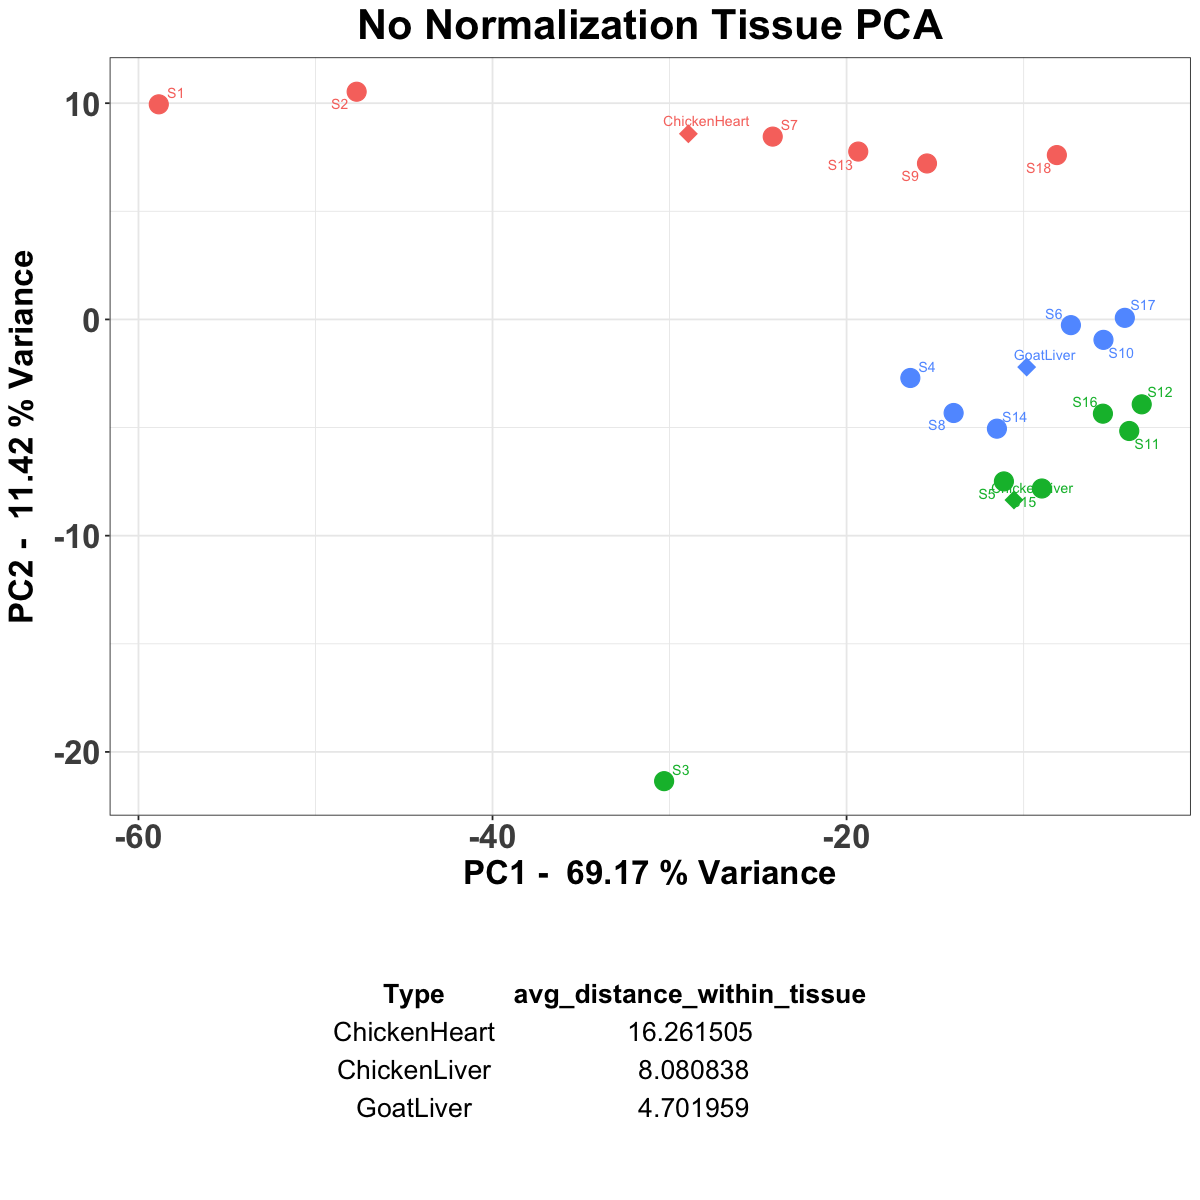

In [55]:
## Tissue PCA plot intragroup no norm ##
library(gridExtra)
library(dplyr)

options(repr.plot.width = 10, repr.plot.height = 10)  # Adjust width and height as desired

# Filter pca_data to include only tissue samples
tissue_pca_data <- pca_data %>%
  filter(Type %in% sample_set)

# Calculate centroids for each tissue type
centroids <- tissue_pca_data %>%
  group_by(Type) %>%
  summarize(Centroid_PC1 = mean(PC1), Centroid_PC2 = mean(PC2))

# Calculate distances between each sample and its corresponding centroid within each tissue type
tissue_pca_data_with_centroids <- left_join(tissue_pca_data, centroids, by = "Type")
tissue_pca_data_with_centroids <- tissue_pca_data_with_centroids %>%
  mutate(distance_to_centroid = sqrt((PC1 - Centroid_PC1)^2 + (PC2 - Centroid_PC2)^2))

# Calculate average distance within each tissue type
tissue_avg_distances <- tissue_pca_data_with_centroids %>%
  group_by(Type) %>%
  summarize(avg_distance_within_tissue = mean(distance_to_centroid))

# Create intragroup pca plot
tissue_intra_plot <- ggplot(tissue_pca_data, aes(x = PC1, y = PC2, color = Type)) +
  geom_point(size = 5) +
  geom_point(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, color = Type), shape = 18, size = 5) +
  geom_text_repel(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, label = Type), 
                  direction = "both", size = 3) +
  geom_text_repel(aes(label = Sample), direction = "both", size = 3) +
  labs(title = "No Normalization Tissue PCA",
       x = paste("PC1 - ", round(batch_pca$sdev[1]^2 / sum(batch_pca$sdev^2) * 100, 2), "% Variance"),
       y = paste("PC2 - ", round(batch_pca$sdev[2]^2 / sum(batch_pca$sdev^2) * 100, 2), "% Variance")) +
  theme_bw() +
  theme(axis.text = element_text(size = 20, face = 'bold'), 
        axis.title = element_text(size = 20, face = 'bold'),
        plot.title = element_text(size = 25, hjust = 0.5, face = 'bold'),
        legend.position = "none")

# Create table plot
table_plot <- tableGrob(tissue_avg_distances, rows = NULL, theme = ttheme_minimal(base_size = 16))

# Arrange PCA plot and table plot
combined_plot_intra <- grid.arrange(tissue_intra_plot, table_plot, ncol = 1, heights = c(3, 1))

# Print the combined plot
print(combined_plot_intra)

TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name               grob
1 1 (1-1,1-1) arrange     gtable[layout]
2 2 (2-2,1-1) arrange gtable[colhead-fg]


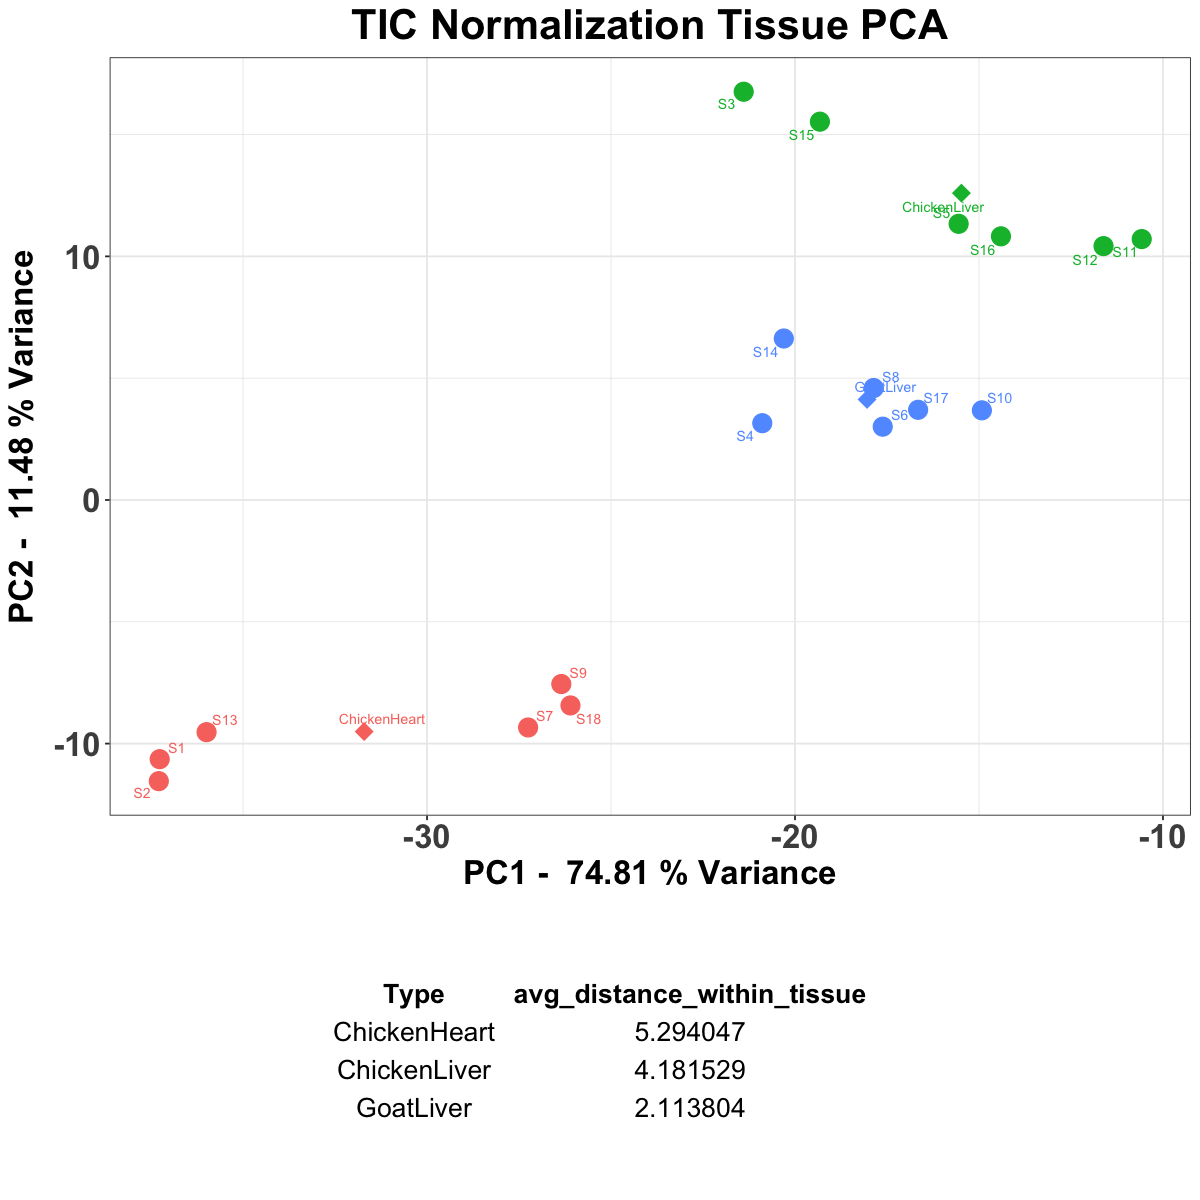

In [101]:
## Tissue PCA plot intragroup TIC norm ##
library(gridExtra)
library(dplyr)

options(repr.plot.width = 10, repr.plot.height = 10)  # Adjust width and height as desired

# Filter pca_data to include only tissue samples
tissue_pca_data <- pca_data_TIC %>%
  filter(Type %in% sample_set)

# Calculate centroids for each tissue type
centroids <- tissue_pca_data %>%
  group_by(Type) %>%
  summarize(Centroid_PC1 = mean(PC1), Centroid_PC2 = mean(PC2))

# Calculate distances between each sample and its corresponding centroid within each tissue type
tissue_pca_data_with_centroids <- left_join(tissue_pca_data, centroids, by = "Type")
tissue_pca_data_with_centroids <- tissue_pca_data_with_centroids %>%
  mutate(distance_to_centroid = sqrt((PC1 - Centroid_PC1)^2 + (PC2 - Centroid_PC2)^2))

# Calculate average distance within each tissue type
tissue_avg_distances_TIC <- tissue_pca_data_with_centroids %>%
  group_by(Type) %>%
  summarize(avg_distance_within_tissue = mean(distance_to_centroid))

# Create intragroup pca plot
tissue_intra_plot <- ggplot(tissue_pca_data, aes(x = PC1, y = PC2, color = Type)) +
  geom_point(size = 5) +
  geom_point(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, color = Type), shape = 18, size = 5) +
  geom_text_repel(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, label = Type), 
                  direction = "both", size = 3) +
  geom_text_repel(aes(label = Sample), direction = "both", size = 3) +
  labs(title = "TIC Normalization Tissue PCA",
       x = paste("PC1 - ", round(batch_pca_TIC$sdev[1]^2 / sum(batch_pca_TIC$sdev^2) * 100, 2), "% Variance"),
       y = paste("PC2 - ", round(batch_pca_TIC$sdev[2]^2 / sum(batch_pca_TIC$sdev^2) * 100, 2), "% Variance")) +
  theme_bw() +
  theme(axis.text = element_text(size = 20, face = 'bold'), 
        axis.title = element_text(size = 20, face = 'bold'),
        plot.title = element_text(size = 25, hjust = 0.5, face = 'bold'),
        legend.position = "none")

# Create table plot
table_plot <- tableGrob(tissue_avg_distances_TIC, rows = NULL, theme = ttheme_minimal(base_size = 16))

# Arrange PCA plot and table plot
combined_plot_TIC_intra <- grid.arrange(tissue_intra_plot, table_plot, ncol = 1, heights = c(3, 1))

# Print the combined plot
print(combined_plot_TIC_intra)

TableGrob (1 x 2) "arrange": 2 grobs
  z     cells    name            grob
1 1 (1-1,1-1) arrange gtable[arrange]
2 2 (1-1,2-2) arrange gtable[arrange]


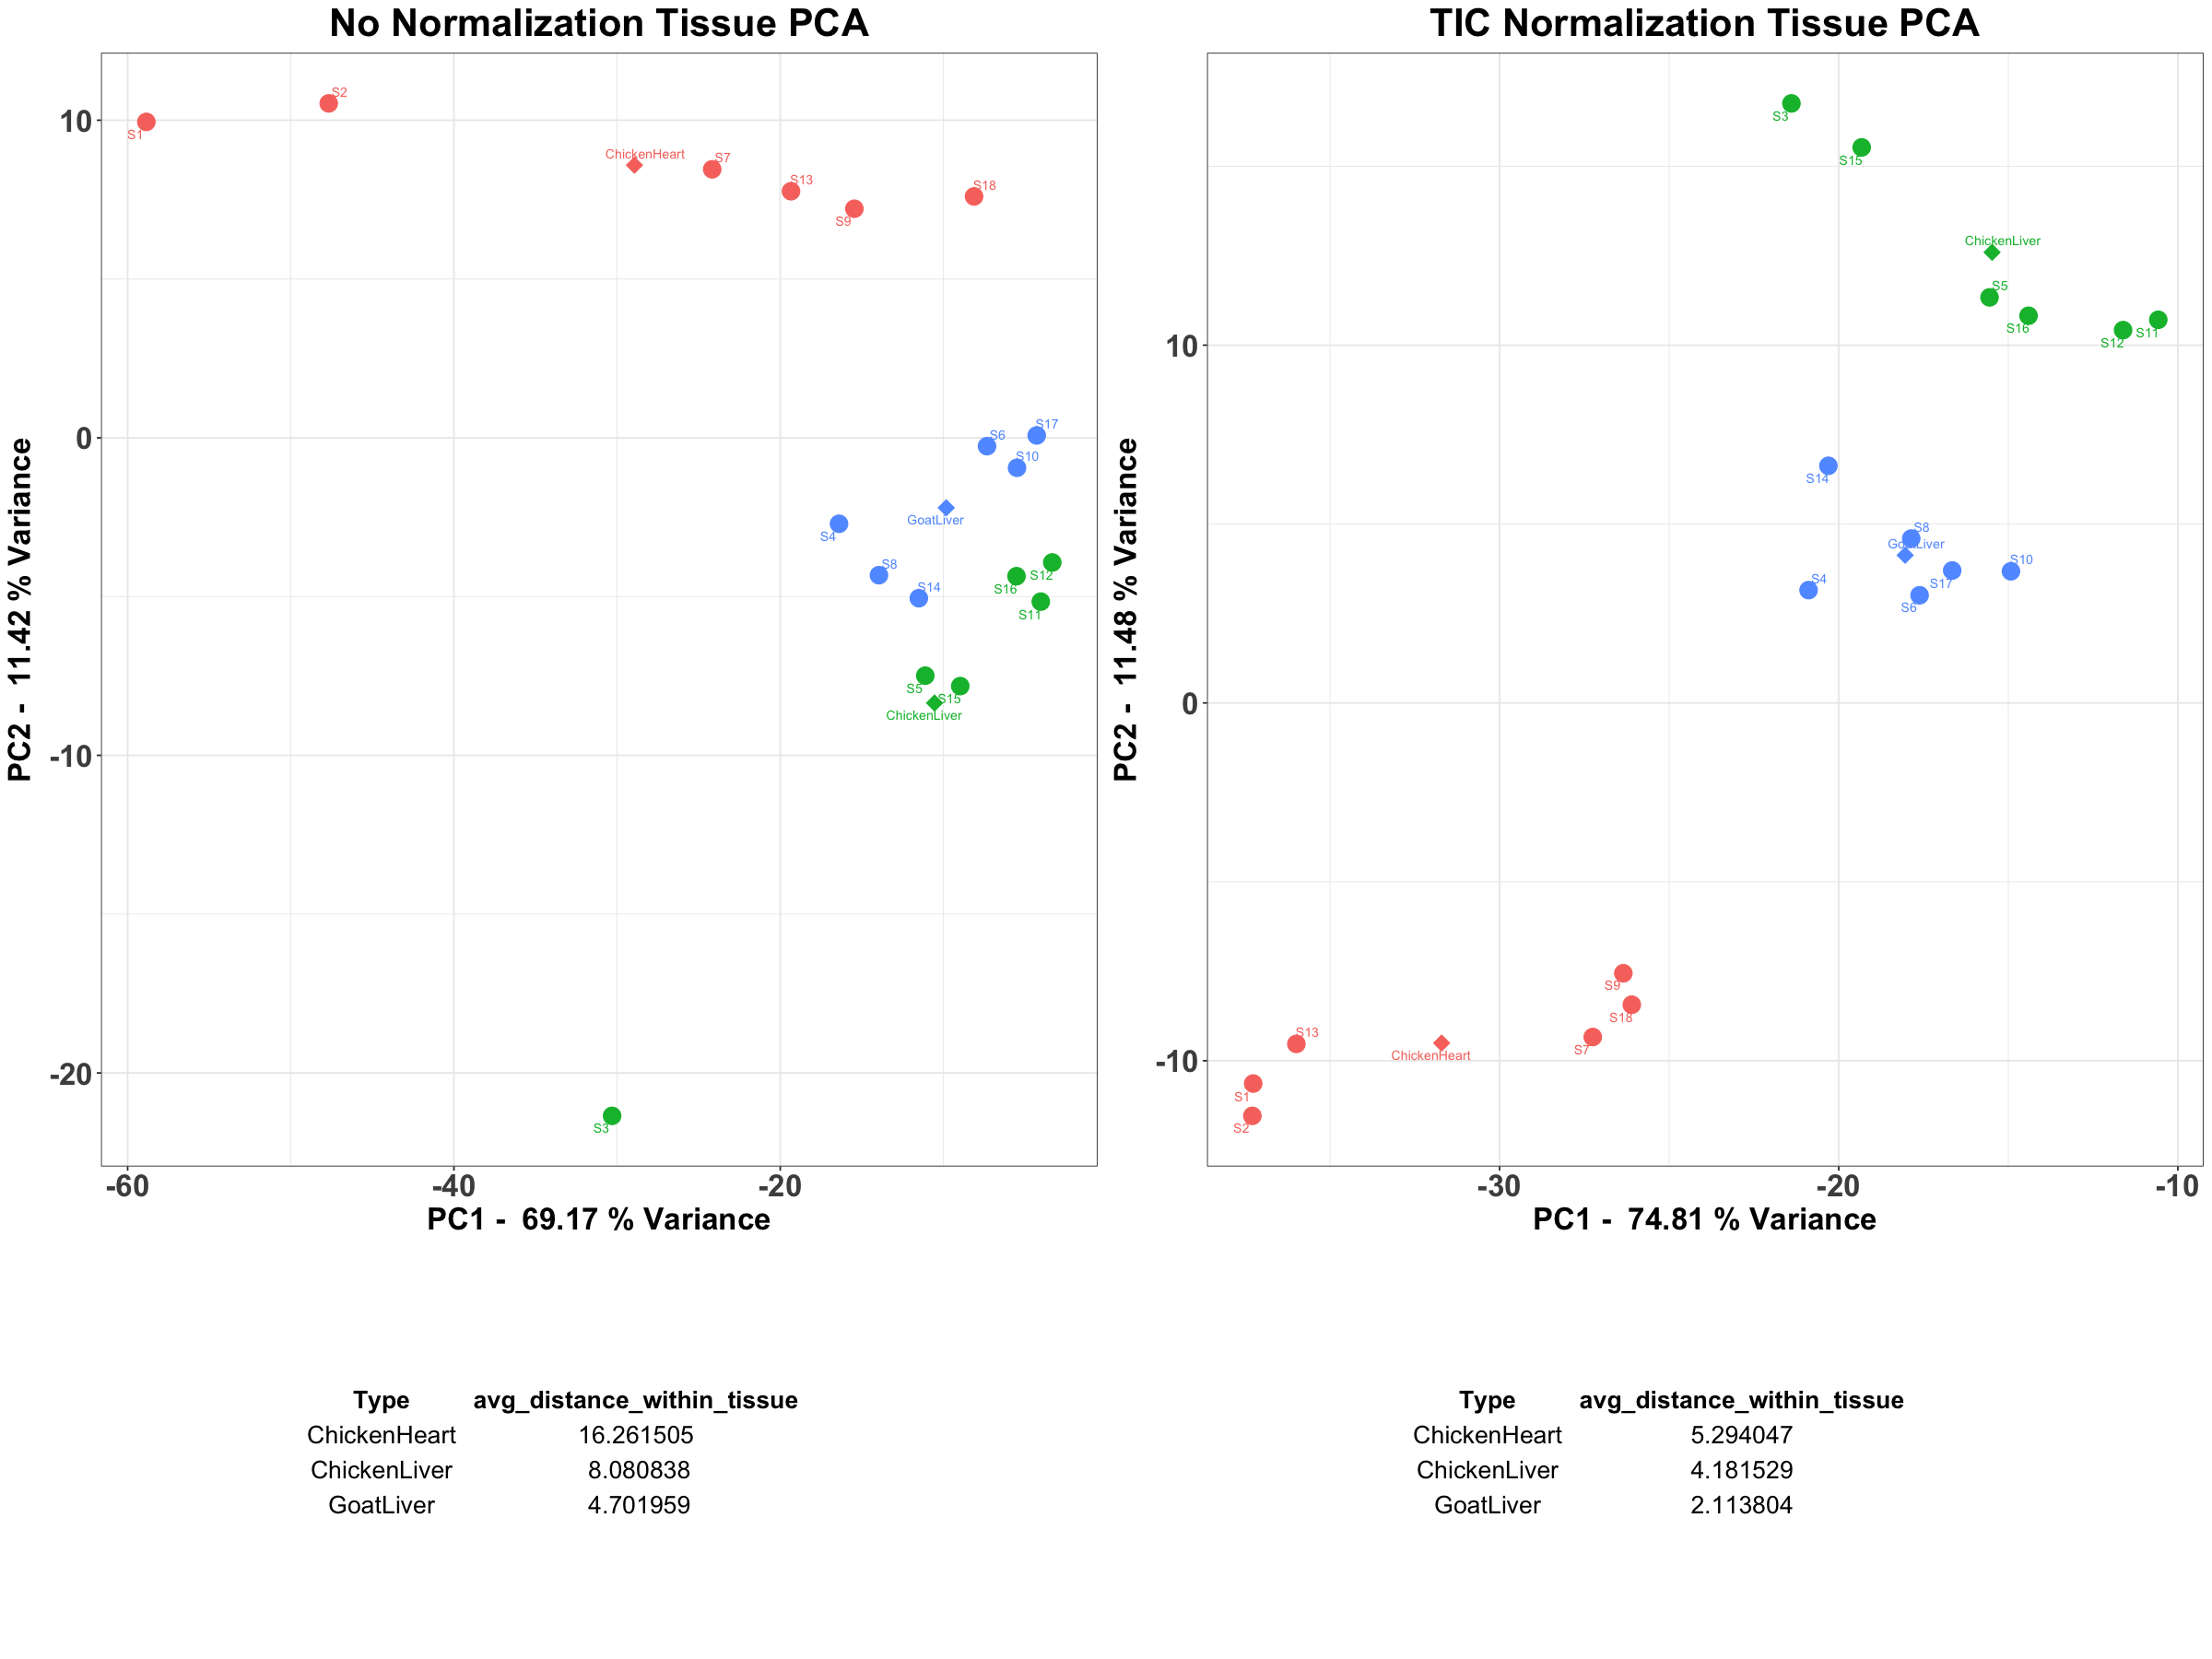

In [102]:
## Overview PCA plot ##
library(gridExtra)
options(repr.plot.width = 20, repr.plot.height = 15)  # Adjust width and height as desired
combined_plots <- grid.arrange(combined_plot_intra, combined_plot_TIC_intra, nrow = 1)
print(combined_plots)

TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name               grob
1 1 (1-1,1-1) arrange     gtable[layout]
2 2 (2-2,1-1) arrange gtable[colhead-fg]


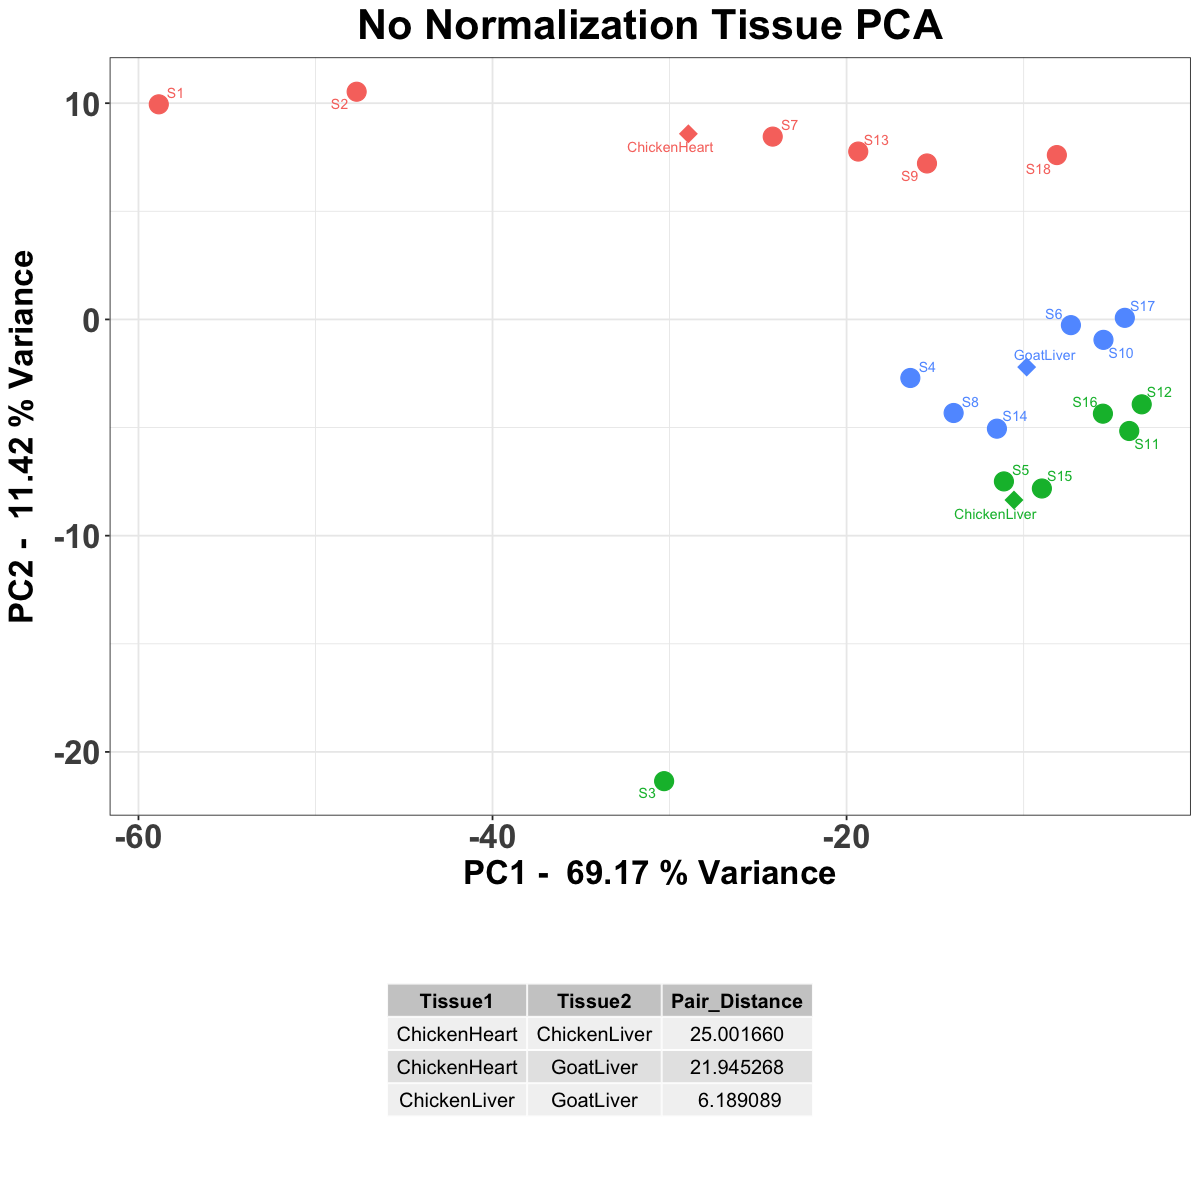

In [28]:
## Tissue with centroid PCA plot intergroup no norm ##
library(ggplot2)
library(dplyr)
library(ggrepel)
library(gridExtra)

options(repr.plot.width = 10, repr.plot.height = 10)  # Adjust width and height as desired


# Filter pca_data to include only tissue samples
tissue_pca_data <- pca_data %>%
  filter(Type %in% sample_set)

# Calculate centroids for each tissue type
centroids <- tissue_pca_data %>%
  group_by(Type) %>%
  summarize(Centroid_PC1 = mean(PC1), Centroid_PC2 = mean(PC2))

# Plot tissue-only PCA with centroids, data point labels, and axis labels
tissue_plot <- ggplot(tissue_pca_data, aes(x = PC1, y = PC2, color = Type)) +
  geom_point(size = 5) +
  geom_point(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, color = Type), shape = 18, size = 5) +
  geom_text_repel(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, label = Type), 
                  direction = "both", size = 3) +  # Using geom_text_repel to prevent label overlap
  geom_text_repel(aes(label = Sample), direction = "both", size = 3) +  # Add labels for data points without overlap
  labs(title = "No Normalization Tissue PCA",
       x = paste("PC1 - ", round(batch_pca$sdev[1]^2 / sum(batch_pca$sdev^2) * 100, 2), "% Variance"),
       y = paste("PC2 - ", round(batch_pca$sdev[2]^2 / sum(batch_pca$sdev^2) * 100, 2), "% Variance")) +
  theme_bw() +
  theme(axis.text = element_text(size = 20, face = 'bold'), 
        axis.title = element_text(size = 20, face = 'bold'),
        plot.title = element_text(size = 25, hjust = 0.5, face = 'bold'),
        legend.position = "none")

# calculate intergroup distance #
# Create a data frame to store pairwise distances and tissue types
# Generate all possible combinations of tissue types
tissue_combinations <- combn(unique(centroids$Type), 2, simplify = TRUE)

# Initialize an empty data frame to store pairwise distances
centroid_distances_df <- data.frame(Tissue1 = character(), Tissue2 = character(), Pair_Distance = numeric())

# Iterate over each pair of tissue combinations
for (i in 1:ncol(tissue_combinations)) {
  tissue_pair <- tissue_combinations[, i]
  centroid1 <- centroids %>% filter(Type == tissue_pair[1])
  centroid2 <- centroids %>% filter(Type == tissue_pair[2])
  distance <- sqrt((centroid1$Centroid_PC1 - centroid2$Centroid_PC1)^2 + (centroid1$Centroid_PC2 - centroid2$Centroid_PC2)^2)
  centroid_distances_df <- rbind(centroid_distances_df, data.frame(Tissue1 = tissue_pair[1], Tissue2 = tissue_pair[2], Pair_Distance = distance))
}

# Create the tissue plot
tissue_intergroup_plot <- ggplot(tissue_pca_data, aes(x = PC1, y = PC2, color = Type)) +
  geom_point(size = 5) +
  geom_point(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, color = Type), shape = 18, size = 5) +
  geom_text_repel(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, label = Type), 
                  direction = "both", size = 3) +  
  geom_text_repel(aes(label = Sample), direction = "both", size = 3) +  
  labs(title = "No Normalization Tissue PCA",
       x = paste("PC1 - ", round(batch_pca$sdev[1]^2 / sum(batch_pca$sdev^2) * 100, 2), "% Variance"),
       y = paste("PC2 - ", round(batch_pca$sdev[2]^2 / sum(batch_pca$sdev^2) * 100, 2), "% Variance")) +
  theme_bw() +
  theme(axis.text = element_text(size = 20, face = 'bold'), 
        axis.title = element_text(size = 20, face = 'bold'),
        plot.title = element_text(size = 25, hjust = 0.5, face = 'bold'),
        legend.position = "none")

# Create a table grob for centroid distances
centroid_table <- tableGrob(centroid_distances_df, rows = NULL)

# Arrange plots and table vertically
combined_plot_inter <- grid.arrange(tissue_intergroup_plot, centroid_table, ncol = 1, heights = c(3, 1))
print(combined_plot_inter)

TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name               grob
1 1 (1-1,1-1) arrange     gtable[layout]
2 2 (2-2,1-1) arrange gtable[colhead-fg]


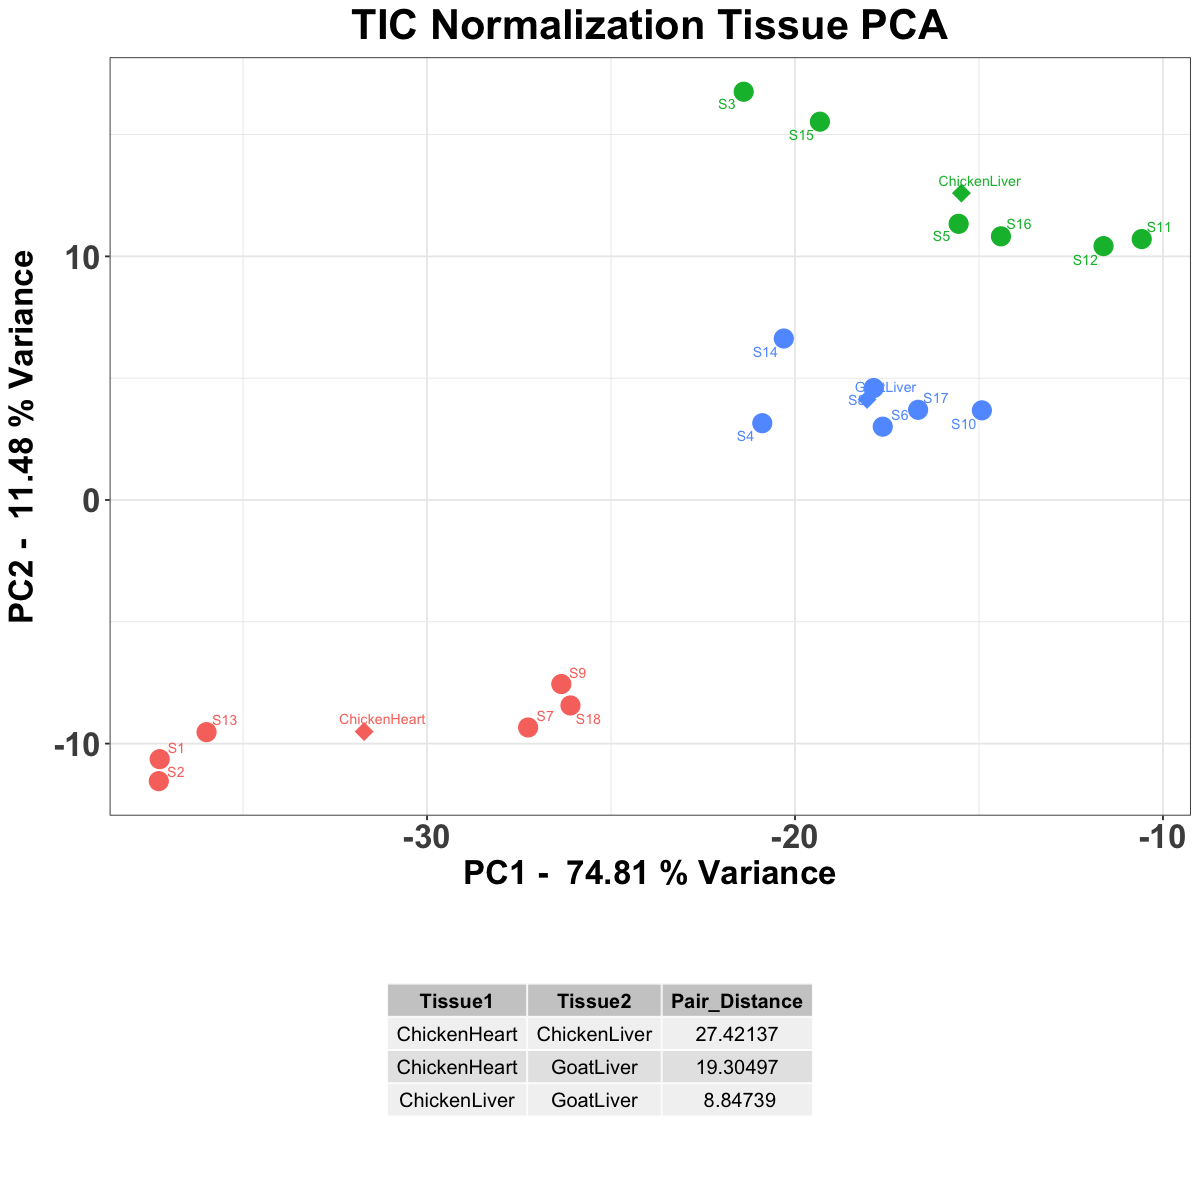

In [105]:
## Tissue with centroid PCA plot intergroup no norm ##
library(ggplot2)
library(dplyr)
library(ggrepel)
library(gridExtra)

options(repr.plot.width = 10, repr.plot.height = 10)  # Adjust width and height as desired

# Filter pca_data to include only tissue samples
tissue_pca_data <- pca_data_TIC %>%
  filter(Type %in% sample_set)

# Calculate centroids for each tissue type
centroids <- tissue_pca_data %>%
  group_by(Type) %>%
  summarize(Centroid_PC1 = mean(PC1), Centroid_PC2 = mean(PC2))

# Plot tissue-only PCA with centroids, data point labels, and axis labels
tissue_plot <- ggplot(tissue_pca_data, aes(x = PC1, y = PC2, color = Type)) +
  geom_point(size = 5) +
  geom_point(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, color = Type), shape = 18, size = 5) +
  geom_text_repel(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, label = Type), 
                  direction = "both", size = 3) +  # Using geom_text_repel to prevent label overlap
  geom_text_repel(aes(label = Sample), direction = "both", size = 3) +  # Add labels for data points without overlap
  labs(title = "TIC Normalization Tissue PCA",
       x = paste("PC1 - ", round(batch_pca_TIC$sdev[1]^2 / sum(batch_pca_TIC$sdev^2) * 100, 2), "% Variance"),
       y = paste("PC2 - ", round(batch_pca_TIC$sdev[2]^2 / sum(batch_pca_TIC$sdev^2) * 100, 2), "% Variance")) +
  theme_bw() +
  theme(axis.text = element_text(size = 20, face = 'bold'), 
        axis.title = element_text(size = 20, face = 'bold'),
        plot.title = element_text(size = 25, hjust = 0.5, face = 'bold'),
        legend.position = "none")

# calculate intergroup distance #
# Create a data frame to store pairwise distances and tissue types
# Generate all possible combinations of tissue types
tissue_combinations <- combn(unique(centroids$Type), 2, simplify = TRUE)

# Initialize an empty data frame to store pairwise distances
centroid_distances_df_TIC <- data.frame(Tissue1 = character(), Tissue2 = character(), Pair_Distance = numeric())

# Iterate over each pair of tissue combinations
for (i in 1:ncol(tissue_combinations)) {
  tissue_pair <- tissue_combinations[, i]
  centroid1 <- centroids %>% filter(Type == tissue_pair[1])
  centroid2 <- centroids %>% filter(Type == tissue_pair[2])
  distance <- sqrt((centroid1$Centroid_PC1 - centroid2$Centroid_PC1)^2 + (centroid1$Centroid_PC2 - centroid2$Centroid_PC2)^2)
  centroid_distances_df_TIC <- rbind(centroid_distances_df_TIC, data.frame(Tissue1 = tissue_pair[1], Tissue2 = tissue_pair[2], Pair_Distance = distance))
}

# Create the tissue plot
tissue_intergroup_plot_TIC <- ggplot(tissue_pca_data, aes(x = PC1, y = PC2, color = Type)) +
  geom_point(size = 5) +
  geom_point(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, color = Type), shape = 18, size = 5) +
  geom_text_repel(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, label = Type), 
                  direction = "both", size = 3) +  
  geom_text_repel(aes(label = Sample), direction = "both", size = 3) +  
  labs(title = "TIC Normalization Tissue PCA",
       x = paste("PC1 - ", round(batch_pca_TIC$sdev[1]^2 / sum(batch_pca_TIC$sdev^2) * 100, 2), "% Variance"),
       y = paste("PC2 - ", round(batch_pca_TIC$sdev[2]^2 / sum(batch_pca_TIC$sdev^2) * 100, 2), "% Variance")) +
  theme_bw() +
  theme(axis.text = element_text(size = 20, face = 'bold'), 
        axis.title = element_text(size = 20, face = 'bold'),
        plot.title = element_text(size = 25, hjust = 0.5, face = 'bold'),
        legend.position = "none")

# Create a table grob for centroid distances
centroid_table_TIC <- tableGrob(centroid_distances_df_TIC, rows = NULL)

# Arrange plots and table vertically
combined_plot_TIC_inter <- grid.arrange(tissue_intergroup_plot_TIC, centroid_table_TIC, ncol = 1, heights = c(3, 1))
print(combined_plot_TIC_inter)

TableGrob (1 x 2) "arrange": 2 grobs
  z     cells    name            grob
1 1 (1-1,1-1) arrange gtable[arrange]
2 2 (1-1,2-2) arrange gtable[arrange]


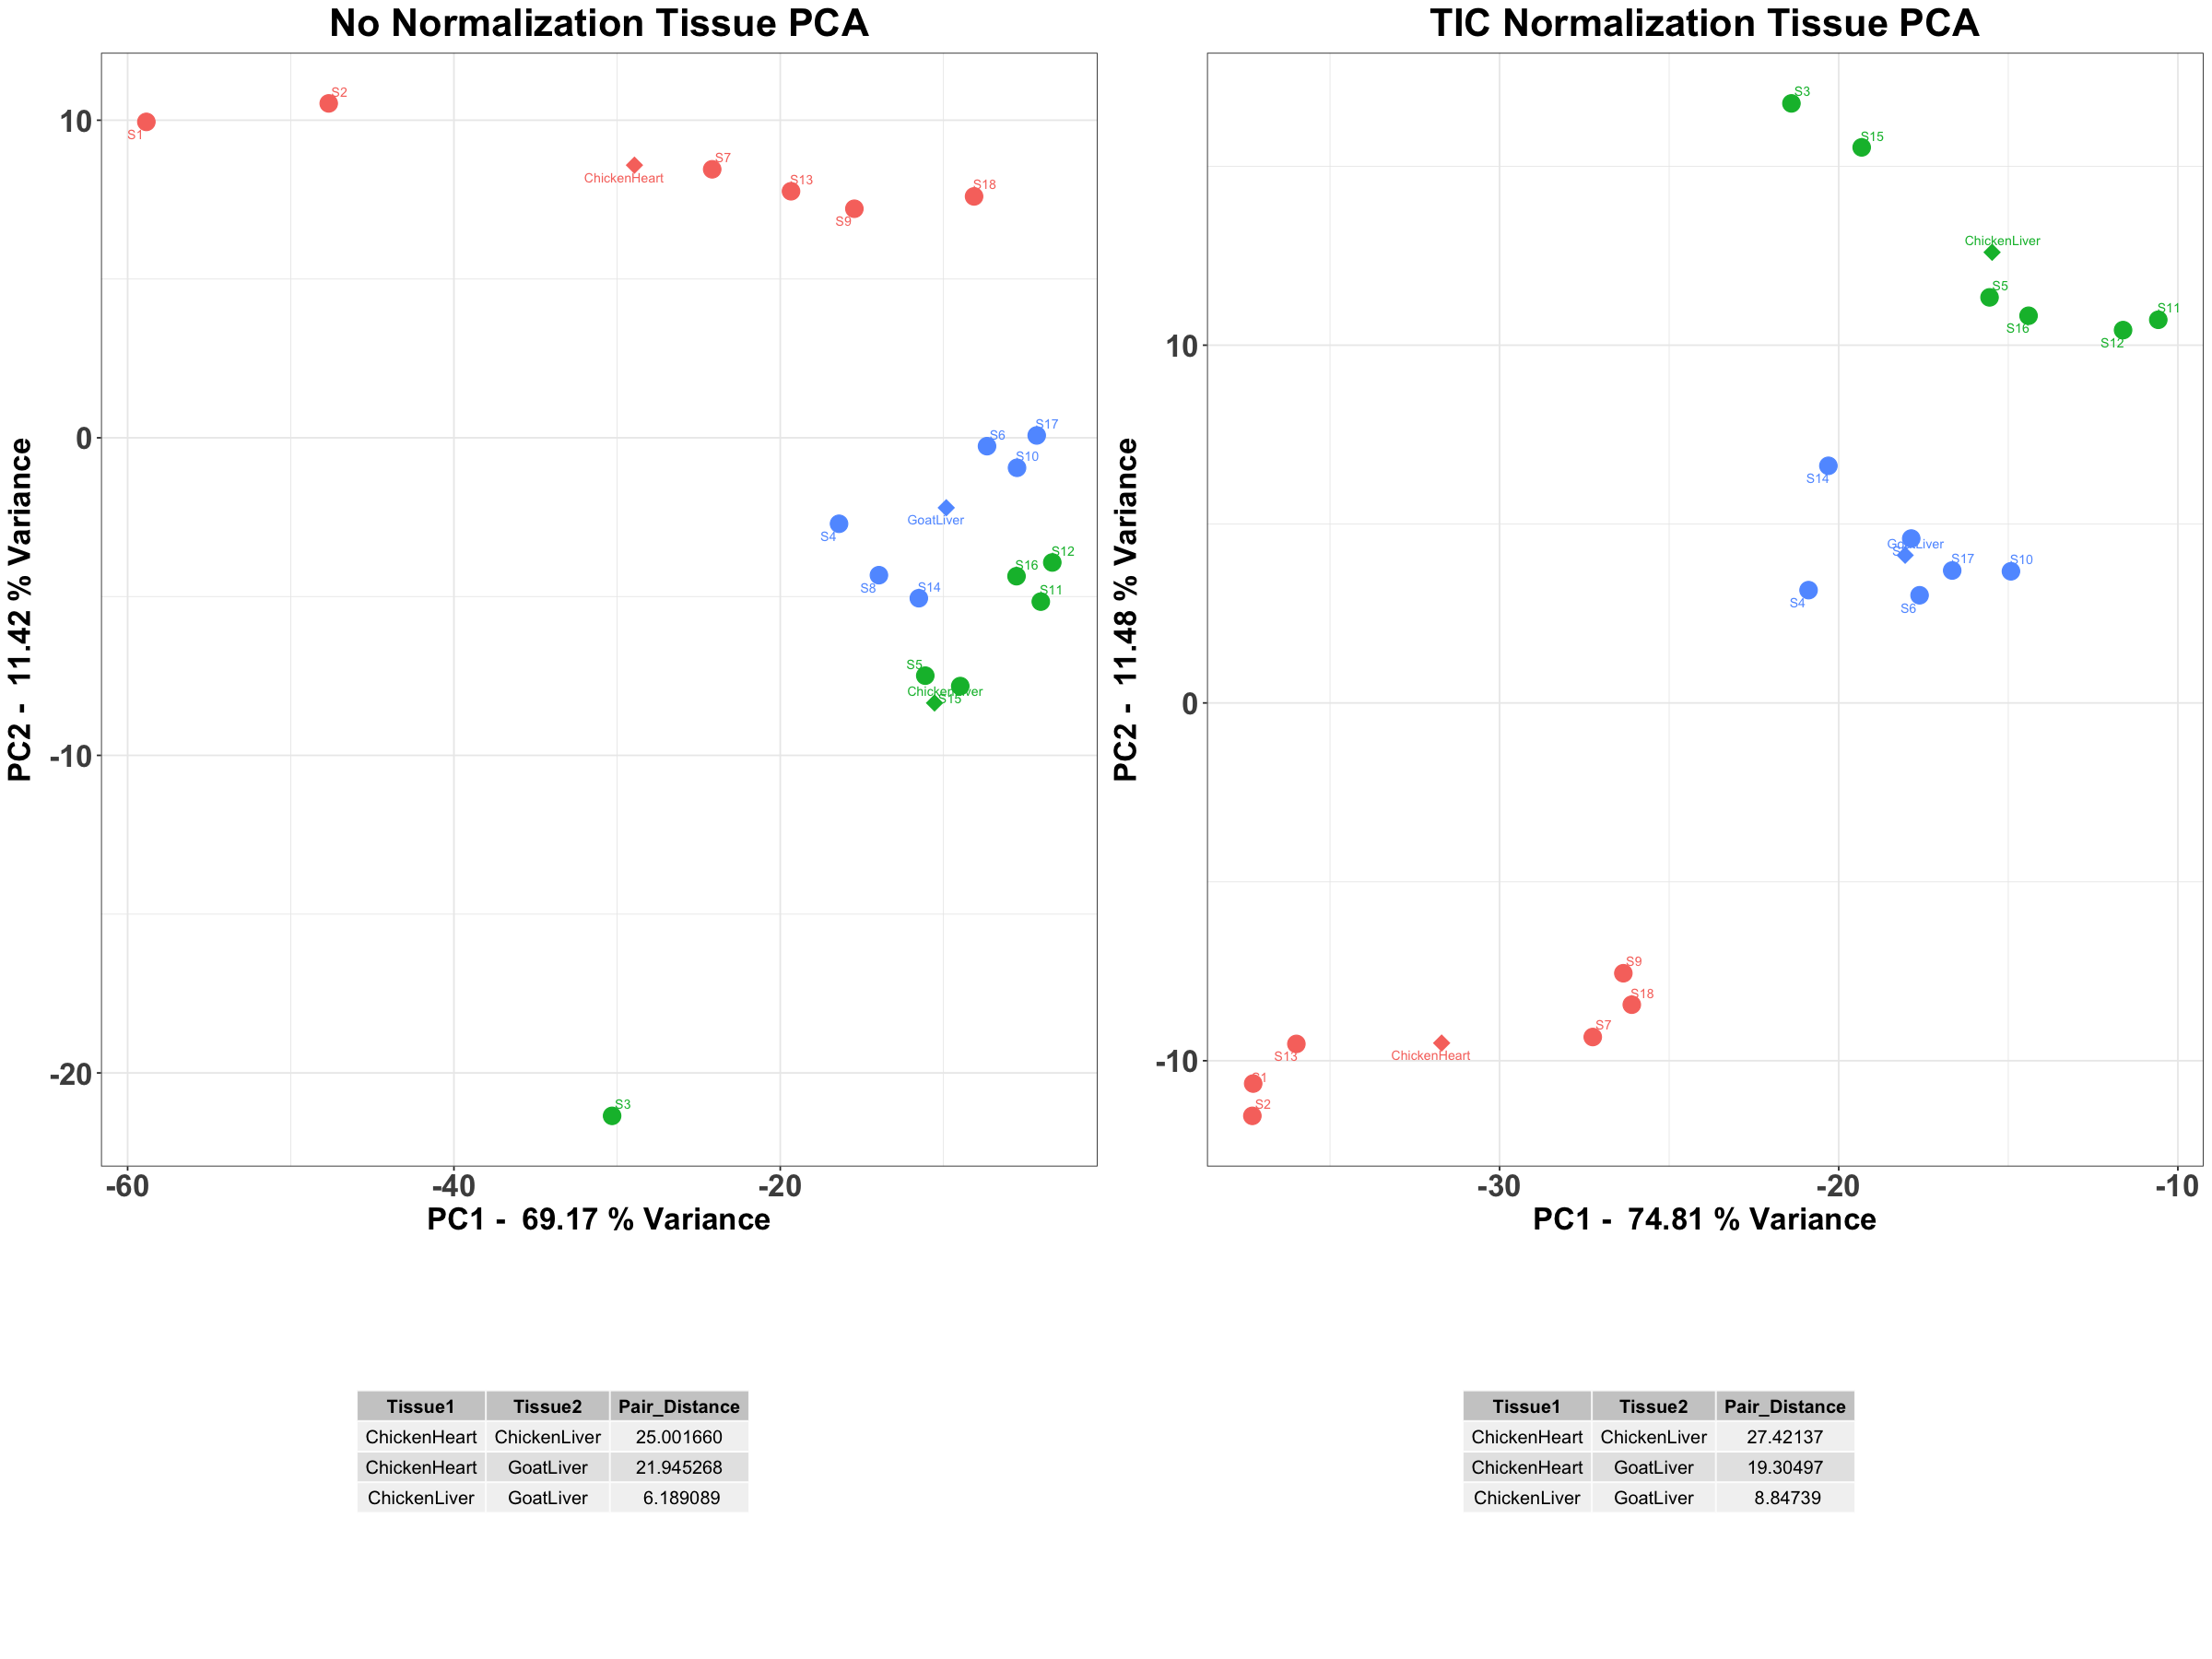

In [104]:
## Overview PCA plot ##
library(gridExtra)
options(repr.plot.width = 20, repr.plot.height = 15)  # Adjust width and height as desired
combined_plots <- grid.arrange(combined_plot_inter, combined_plot_TIC_inter, nrow = 1)
print(combined_plots)

## Correction ##
1. Combat
2. WaveICA
3. NormAE

For more Batch Effect Correction try this site: https://www.metaboanalyst.ca/MetaboAnalyst/upload/BatchUpload.xhtml

In [31]:
## Combat ##

# install packages for combat
install.packages("sva")
               
# running combat
library (sva)

# obtaining peak_data
row_names <- combined_batch_data_df[, 1]
peak_data <- as.data.frame(combined_batch_data_df[,-(1:3)])
rownames(peak_data) <- row_names
peak_data_matrix <- as.matrix(peak_data)
peak_data_matrix <- apply(peak_data_matrix, 2, as.numeric)
rownames(peak_data_matrix) <- row_names

# obtaining batch_info
batch_data <- as.data.frame(t(combined_batch_info_data[,-(1)]))
batch_info_values <- as.vector(unlist(batch_data["batch", , drop = FALSE]))
batch_info_interday <- as.numeric(batch_info_values)
#print(length(batch_info_interday))

# running combat
combat_result_interday <- ComBat(dat = peak_data_matrix, batch = batch_info_interday)

# save dataset as csv file
write.csv(combat_result_interday,
          file = "dataset/combat_interday_corrected_data.csv",
          row.names = TRUE)

Warning message:
“package ‘sva’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


ERROR: Error in library(sva): ‘sva’이라고 불리는 패키지가 없습니다


In [32]:
## WaveICA ##

# install packages for WaveICA correction
install.packages("devtools", quite = TRUE)
library(devtools)
devtools::install_github("dengkuistat/WaveICA", host = "https://api.github.com", dependencies = TRUE)
library(WaveICA)

# obtaining peak_data
row_names <- combined_batch_data_df[, 1]
peak_data <- as.data.frame(combined_batch_data_df[,-(1:3)])
rownames(peak_data) <- row_names
peak_data_trans <- as.data.frame(t(peak_data))
peak_data_trans <- sapply(peak_data_trans, as.numeric)
rownames(peak_data_trans) <- colnames(peak_data)

# Convert peak_data_trans to a matrix
peak_data_matrix <- as.matrix(peak_data_trans)

# Keep the row names from peak_data_trans in the matrix
rownames(peak_data_matrix) <- rownames(peak_data_trans)

# obtaining batch_info
batch_data <- as.data.frame(t(combined_batch_info_data[,-(1)]))
batch_info_values <- as.vector(unlist(batch_data["batch", , drop = FALSE]))
batch_info_interday <- as.numeric(batch_info_values)
#print(length(batch_info_interday)) # 126 samples

# running waveICA
waveica_result_interday_matrix <- WaveICA(peak_data_matrix, batch = batch_info_interday, group = NULL)
waveica_result_interday <- as.data.frame(waveica_result_interday_matrix[["data_wave"]]) # 126 obs of 120 variables
waveica_result_interday <- as.data.frame(waveica_result_interday_matrix[["data_wave"]]) # 126 obs of 120 variables

# save dataset as csv file
write.csv(waveica_result_interday,
          file = "dataset/waveica_interday_corrected_data.csv",
          row.names = TRUE)

'.Library'내 HTML 패키지 목록을 업데이트 하고 있습니다

Making 'packages.html' ...
 완료

필요한 패키지를 로딩중입니다: usethis

Using GitHub PAT from the git credential store.

Skipping install of 'WaveICA' from a github remote, the SHA1 (5c091801) has not changed since last install.
  Use `force = TRUE` to force installation

Warning message:
“replacing previous import ‘pROC::cov’ by ‘stats::cov’ when loading ‘WaveICA’”
Warning message:
“replacing previous import ‘pROC::smooth’ by ‘stats::smooth’ when loading ‘WaveICA’”
Warning message:
“replacing previous import ‘pROC::var’ by ‘stats::var’ when loading ‘WaveICA’”

waveslim: Wavelet Method for 1/2/3D Signals (version = 1.8.4)




######Decomposition 1 ########
######Decomposition 2 ########
######Decomposition 3 ########
######Decomposition 4 ########
######Decomposition 5 ########
######Decomposition 6 ########
######Decomposition 7 ########
######Decomposition 8 ########
######Decomposition 9 ########
######Decomposition 10 ########
######Decomposition 11 ########
######Decomposition 12 ########
######Decomposition 13 ########
######Decomposition 14 ########
######Decomposition 15 ########
######Decomposition 16 ########
######Decomposition 17 ########
######Decomposition 18 ########
######Decomposition 19 ########
######Decomposition 20 ########
######Decomposition 21 ########
######Decomposition 22 ########
######Decomposition 23 ########
######Decomposition 24 ########
######Decomposition 25 ########
######Decomposition 26 ########
######Decomposition 27 ########
######Decomposition 28 ########
######Decomposition 29 ########
######Decomposition 30 ########
######Decomposition 31 ########
######Decompositi

In [33]:
## NormAE ##

## dataset preparation
# convert combined_batch_data_df into txt file
write.table(combined_batch_data_df, 
            file = "input/metabolomics_data_normae.txt", 
            sep = ",", 
            quote = FALSE, 
            row.names = FALSE)

# edit batch_info
library(dplyr)
batch_info <- read.csv("input/batch_info_TIC.csv", 
                       header = TRUE,
                       stringsAsFactors = FALSE)
# add column for group
batch_info <- batch_info %>%
  mutate(group = 1)

# add column for class
sample_set <- c("ChickenHeart", "ChickenLiver", "GoatLiver")

# Add a new column called "class"
batch_info <- batch_info %>%
  mutate(class = ifelse(grepl(paste(sample_set, collapse = "|"), sample.name), "Subject", "QC"))

# move the first three columns
combined_batch_data_df_norm <- combined_batch_data_df[, -(1:3)]

# Check if sample names match column names
names_match <- all(batch_info$sample.name %in% colnames(combined_batch_data_df_norm))

if (names_match) {
  print("The sample names in batch_info match the column names of combined_batch_data_df.")
} else {
  print("The sample names in batch_info do not match the column names of combined_batch_data_df.")
  
  # Extract column names from combined_batch_data_df
  col_names_combined <- colnames(combined_batch_data_df_norm)
  
  # Replace sample names in batch_info with column names from combined_batch_data_df
  batch_info$sample.name <- col_names_combined
}

# make it txt file
write.table(batch_info,
            file = "input/batch_info_normae.txt",
            sep = ",",
            row.names = FALSE,
            quote = FALSE)

## running normae --> go to github https://github.com/luyiyun/NormAE

## extract normae data from dataset
normae_result_interday <- read.csv("dataset/Rec_nobe_no_norm.csv",
                                  header = TRUE,
                                  stringsAsFactors = FALSE)

[1] "The sample names in batch_info do not match the column names of combined_batch_data_df."


## Comparision ##

In [106]:
## QCS RSD Table ## Combat

## QCS RSD Calculation ## combat
data <- read.csv("dataset/combat_interday_corrected_data.csv",
                 header = TRUE,
                 stringsAsFactors = FALSE,
                 row.names = 1) 
row_names <- rownames(data)
batch_info_norm <- read.csv("input/batch_info_TIC.csv",
                            header = TRUE,
                            stringsAsFactors = FALSE)

injection_order_norm <- batch_info_norm$injection.order
batch_norm <- batch_info_norm$batch

# add injection_order and batch_info
new_data <- rbind(injection_order_norm, batch_norm, data) # 128 obs of 119
new_row_names <- c("injection_order", "batch", row_names) #128 of 119 
rownames(new_data) <- new_row_names

# Transpose the data
transposed_data <- as.data.frame(t(new_data))

# extract tissue samples away function
extract_qcs_data <- function(dataset, sample_set) {
  pattern <- paste(sample_set, collapse = "|")
  
  # Extract tissue rows
  tissue_rows <- grep(pattern, rownames(dataset))
  
  # Subset dataframe to exclude tissue rows
  qcs_data <- dataset[-tissue_rows, , drop = FALSE]
  
  return(qcs_data)
}

# get rid of tissue samples
sample_set <- c("ChickenHeart", "ChickenLiver", "GoatLiver")
qcs_batch_info_data <- extract_qcs_data(transposed_data, sample_set)
batch_info_columns <- qcs_batch_info_data[, 1:2, drop = FALSE]

# extract qcs data
propranolol_peak_data <- qcs_batch_info_data[,colnames(qcs_batch_info_data) == propranolol_mz_value, drop = FALSE]
propranolol_data_combat <- cbind(batch_info_columns, propranolol_peak_data)

d7_propranolol_peak_data <- qcs_batch_info_data[,colnames(qcs_batch_info_data) == d7_propranolol_mz_value, drop = FALSE]
d7_propranolol_data_combat <- cbind(batch_info_columns, d7_propranolol_peak_data)

# function to calculate RSD
calculate_rsd <- function(data) {
  sd_value <- sd(data)
  mean_value <- mean(data)
  rsd <- (sd_value / mean_value) * 100
  return(rsd)
}

# function to calculate rsd for each batch
calculate_batch_rsd <- function(data, mz_value) {
  # Convert mz_value to character
  mz_value <- as.character(mz_value)
  # Convert column to numeric
  data[[mz_value]] <- as.numeric(data[[mz_value]], na.rm = TRUE)
  # Calculate RSD for each batch, rounding to two decimal places
  batch_rsd <- aggregate(data[[mz_value]],
                         by = list(batch = data$batch),
                         FUN = function(x) round(calculate_rsd(x), 2))
  # Rename columns
  colnames(batch_rsd) <- c("Batch", "RSD")
  # Calculate interday RSD, rounding to two decimal places
  interday_rsd <- round(calculate_rsd(data[[mz_value]]), 2)
  # Create a new row for interday RSD
  interday_row <- data.frame(Batch = "Interday", RSD = interday_rsd)
  # Combine batch_rsd with interday_rsd
  batch_rsd <- rbind(batch_rsd, interday_row)
  # Replace all RSD values with percentage symbol
  batch_rsd$RSD <- paste0(batch_rsd$RSD, "%")
  # Replace batch labels with "Intraday 1", "Intraday 2", "Intraday 3"
  batch_rsd$Batch <- ifelse(batch_rsd$Batch == "Interday", "Interday", paste0("Intraday ", batch_rsd$Batch))
  
  return(batch_rsd)
}

# usage:
cat("RSD for Combat:\n")                                   
rsd_propranolol_combat <- calculate_batch_rsd(propranolol_data_combat, propranolol_mz_value)
cat("m/z value:", propranolol_mz_value, "\n")
print(rsd_propranolol_combat)

rsd_d7_propranolol_combat <- calculate_batch_rsd(d7_propranolol_data_combat, d7_propranolol_mz_value)
cat("m/z value:", d7_propranolol_mz_value, "\n")
print(rsd_d7_propranolol_combat)

RSD for Combat:
m/z value: 260.186 
       Batch    RSD
1 Intraday 1 57.82%
2 Intraday 2 48.44%
3 Intraday 3 38.62%
4   Interday 48.24%
m/z value: 267.187 
       Batch    RSD
1 Intraday 1 59.23%
2 Intraday 2 47.31%
3 Intraday 3 39.03%
4   Interday 48.62%


In [107]:
## QCS RSD Table ## WaveICA
data <- as.data.frame(t(waveica_result_interday)) #126 obs of 119 variables

# or if you are reading directly from file 
#data <- read.csv("dataset/waveica_interday_corrected_data.csv",
                 #header = TRUE,
                 #stringsAsFactors = FALSE,
                 #row.names = 1) 
#data <- as.data.frame(t(data))

row_names <- rownames(data)
batch_info_norm <- read.csv("input/batch_info_TIC.csv",
                            header = TRUE,
                            stringsAsFactors = FALSE)

injection_order_norm <- batch_info_norm$injection.order
batch_norm <- batch_info_norm$batch

# add injection_order and batch_info
new_data <- rbind(injection_order_norm, batch_norm, data)
new_row_names <- c("injection_order", "batch", row_names)
rownames(new_data) <- new_row_names

# Transpose the data
transposed_data <- as.data.frame(t(new_data))

# extract tissue samples away function
extract_qcs_data <- function(dataset, sample_set) {
  pattern <- paste(sample_set, collapse = "|")
  
  # Extract tissue rows
  tissue_rows <- grep(pattern, rownames(dataset))
  
  # Subset dataframe to exclude tissue rows
  qcs_data <- dataset[-tissue_rows, , drop = FALSE]
  
  return(qcs_data)
}

# get rid of tissue samples
sample_set <- c("ChickenHeart", "ChickenLiver", "GoatLiver")
qcs_batch_info_data <- extract_qcs_data(transposed_data, sample_set)
batch_info_columns <- qcs_batch_info_data[, 1:2, drop = FALSE]

# extract qcs data
propranolol_peak_data <- qcs_batch_info_data[,colnames(qcs_batch_info_data) == propranolol_mz_value, drop = FALSE]
propranolol_data_wave <- cbind(batch_info_columns, propranolol_peak_data)

d7_propranolol_peak_data <- qcs_batch_info_data[,colnames(qcs_batch_info_data) == d7_propranolol_mz_value, drop = FALSE]
d7_propranolol_data_wave <- cbind(batch_info_columns, d7_propranolol_peak_data)

# function to calculate RSD
calculate_rsd <- function(data) {
  sd_value <- sd(data)
  mean_value <- mean(data)
  rsd <- (sd_value / mean_value) * 100
  return(rsd)
}

# function to calculate rsd for each batch
calculate_batch_rsd <- function(data, mz_value) {
  # Convert mz_value to character
  mz_value <- as.character(mz_value)
  # Convert column to numeric
  data[[mz_value]] <- as.numeric(data[[mz_value]], na.rm = TRUE)
  # Calculate RSD for each batch, rounding to two decimal places
  batch_rsd <- aggregate(data[[mz_value]],
                         by = list(batch = data$batch),
                         FUN = function(x) round(calculate_rsd(x), 2))
  # Rename columns
  colnames(batch_rsd) <- c("Batch", "RSD")
  # Calculate interday RSD, rounding to two decimal places
  interday_rsd <- round(calculate_rsd(data[[mz_value]]), 2)
  # Create a new row for interday RSD
  interday_row <- data.frame(Batch = "Interday", RSD = interday_rsd)
  # Combine batch_rsd with interday_rsd
  batch_rsd <- rbind(batch_rsd, interday_row)
  # Replace all RSD values with percentage symbol
  batch_rsd$RSD <- paste0(batch_rsd$RSD, "%")
  # Replace batch labels with "Intraday 1", "Intraday 2", "Intraday 3"
  batch_rsd$Batch <- ifelse(batch_rsd$Batch == "Interday", "Interday", paste0("Intraday ", batch_rsd$Batch))
  
  return(batch_rsd)
}

# usage:
cat("RSD for WaveICA:\n")                                   
rsd_propranolol_wave <- calculate_batch_rsd(propranolol_data_wave, propranolol_mz_value)
cat("m/z value:", propranolol_mz_value, "\n")
print(rsd_propranolol_wave)

rsd_d7_propranolol_wave <- calculate_batch_rsd(d7_propranolol_data_wave, d7_propranolol_mz_value)
cat("m/z value:", d7_propranolol_mz_value, "\n")
print(rsd_d7_propranolol_wave)

RSD for WaveICA:
m/z value: 260.186 
       Batch    RSD
1 Intraday 1 42.24%
2 Intraday 2 33.07%
3 Intraday 3 35.51%
4   Interday 36.97%
m/z value: 267.187 
       Batch    RSD
1 Intraday 1 39.16%
2 Intraday 2 30.04%
3 Intraday 3 32.49%
4   Interday 33.92%


In [108]:
## QCS RSD Table ## NormAE
data <- read.csv("dataset/Rec_nobe_no_norm.csv",
                 header = TRUE,
                 stringsAsFactors = FALSE,
                 row.names = 1)
row_names <- rownames(data)
batch_info_norm <- read.csv("dataset/Ys.csv",
                            header = TRUE,
                            stringsAsFactors = FALSE)

injection_order_norm <- batch_info_norm$injection.order
batch_norm <- batch_info_norm$batch

# add injection_order and batch_info
new_data <- rbind(injection_order_norm, batch_norm, data)
new_row_names <- c("injection_order", "batch", row_names)
rownames(new_data) <- new_row_names

# Transpose the data
transposed_data <- as.data.frame(t(new_data))

# extract tissue samples away function
extract_qcs_data <- function(dataset, sample_set) {
  pattern <- paste(sample_set, collapse = "|")
  
  # Extract tissue rows
  tissue_rows <- grep(pattern, rownames(dataset))
  
  # Subset dataframe to exclude tissue rows
  qcs_data <- dataset[-tissue_rows, , drop = FALSE]
  
  return(qcs_data)
}

# get rid of tissue samples
sample_set <- c("ChickenHeart", "ChickenLiver", "GoatLiver")
qcs_batch_info_data <- extract_qcs_data(transposed_data, sample_set)
batch_info_columns <- qcs_batch_info_data[, 1:2, drop = FALSE]

# extract qcs data
propranolol_peak_data <- qcs_batch_info_data[,colnames(qcs_batch_info_data) == propranolol_mz_value, drop = FALSE]
propranolol_data_norm <- cbind(batch_info_columns, propranolol_peak_data)

d7_propranolol_peak_data <- qcs_batch_info_data[,colnames(qcs_batch_info_data) == d7_propranolol_mz_value, drop = FALSE]
d7_propranolol_data_norm <- cbind(batch_info_columns, d7_propranolol_peak_data)

# function to calculate RSD
calculate_rsd <- function(data) {
  sd_value <- sd(data)
  mean_value <- mean(data)
  rsd <- (sd_value / mean_value) * 100
  return(rsd)
}

# function to calculate rsd for each batch
calculate_batch_rsd <- function(data, mz_value) {
  # Convert mz_value to character
  mz_value <- as.character(mz_value)
  # Convert column to numeric
  data[[mz_value]] <- as.numeric(data[[mz_value]], na.rm = TRUE)
  # Calculate RSD for each batch, rounding to two decimal places
  batch_rsd <- aggregate(data[[mz_value]],
                         by = list(batch = data$batch),
                         FUN = function(x) round(calculate_rsd(x), 2))
  # Rename columns
  colnames(batch_rsd) <- c("Batch", "RSD")
  # Calculate interday RSD, rounding to two decimal places
  interday_rsd <- round(calculate_rsd(data[[mz_value]]), 2)
  # Create a new row for interday RSD
  interday_row <- data.frame(Batch = "Interday", RSD = interday_rsd)
  # Combine batch_rsd with interday_rsd
  batch_rsd <- rbind(batch_rsd, interday_row)
  # Replace all RSD values with percentage symbol
  batch_rsd$RSD <- paste0(batch_rsd$RSD, "%")
  # Replace batch labels with "Intraday 1", "Intraday 2", "Intraday 3"
  batch_rsd$Batch <- ifelse(batch_rsd$Batch == "Interday", "Interday", paste0("Intraday ", batch_rsd$Batch))
  
  return(batch_rsd)
}

# usage:
cat("RSD for NormAE:\n")                    
rsd_propranolol_norm <- calculate_batch_rsd(propranolol_data_norm, propranolol_mz_value)
cat("m/z value:", propranolol_mz_value, "\n")
print(rsd_propranolol_norm)

rsd_d7_propranolol_norm <- calculate_batch_rsd(d7_propranolol_data_norm, d7_propranolol_mz_value)
cat("m/z value:", d7_propranolol_mz_value, "\n")
print(rsd_d7_propranolol_norm)

RSD for NormAE:
m/z value: 260.186 
       Batch    RSD
1 Intraday 0 22.55%
2 Intraday 1 22.04%
3 Intraday 2 19.79%
4   Interday 21.36%
m/z value: 267.187 
       Batch    RSD
1 Intraday 0 25.86%
2 Intraday 1 25.66%
3 Intraday 2 23.58%
4   Interday 24.93%


In [109]:
## RSD Overview Table ##
# Create overview RSD table for Propranolol
overview_table_pro <- data.frame(
  Row_Names = c("Intraday 1", "Intraday 2", "Intraday 3", "Interday"),
  Combat_RSD = rsd_propranolol_combat[2],
  WaveICA_RSD = rsd_propranolol_wave[2],
  NormAE_RSD = rsd_propranolol_norm[2]
)

# Set the column names
colnames(overview_table_pro) <- c(paste("m/z value:", propranolol_mz_value), "Combat", "WaveICA", "NormAE")

library(kableExtra)
library(htmltools)
library(IRdisplay)

# Displaying overview RSD table
display_rsd_table_pro <- kable(overview_table_pro, format = "html", row.names = FALSE) %>%
  kable_styling(full_width = FALSE)

# Add table name
display_rsd_table_pro <- paste("<h2 style='text-align: center;'>Overview RSD Table Propranolol</h2>", 
                               as.character(display_rsd_table_pro))

# Save HTML table to a file
display_html(display_rsd_table_pro)

# Create overview RSD table for d7-Propranolol
overview_table_d7_pro <- data.frame(
  Row_Names = c("Intraday 1", "Intraday 2", "Intraday 3", "Interday"),
  Combat_RSD = rsd_d7_propranolol_combat[2],
  WaveICA_RSD = rsd_d7_propranolol_wave[2],
  NormAE_RSD = rsd_d7_propranolol_norm[2]
)

# Set the column names
colnames(overview_table_d7_pro) <- c(paste("m/z value:", d7_propranolol_mz_value), "Combat", "WaveICA", "NormAE")

library(kableExtra)
library(htmltools)
library(IRdisplay)

# Displaying overview RSD table
display_rsd_table_d7_pro <- kable(overview_table_d7_pro, format = "html", row.names = FALSE) %>%
  kable_styling(full_width = FALSE)

# Add table name
display_rsd_table_d7_pro <- paste("<h2 style='text-align: center;'>Overview RSD Table D7-Propranolol</h2>", 
                               as.character(display_rsd_table_d7_pro))

# Save HTML table to a file
display_html(display_rsd_table_d7_pro)

Overview RSD Table Propranolol 
 
 
 m/z value: 260.186 
 Combat 
 WaveICA 
 NormAE 
 
 
 
 
 Intraday 1 
 57.82% 
 42.24% 
 22.55% 
 
 
 Intraday 2 
 48.44% 
 33.07% 
 22.04% 
 
 
 Intraday 3 
 38.62% 
 35.51% 
 19.79% 
 
 
 Interday 
 48.24% 
 36.97% 
 21.36%

Overview RSD Table D7-Propranolol 
 
 
 m/z value: 267.187 
 Combat 
 WaveICA 
 NormAE 
 
 
 
 
 Intraday 1 
 59.23% 
 39.16% 
 25.86% 
 
 
 Intraday 2 
 47.31% 
 30.04% 
 25.66% 
 
 
 Intraday 3 
 39.03% 
 32.49% 
 23.58% 
 
 
 Interday 
 48.62% 
 33.92% 
 24.93%

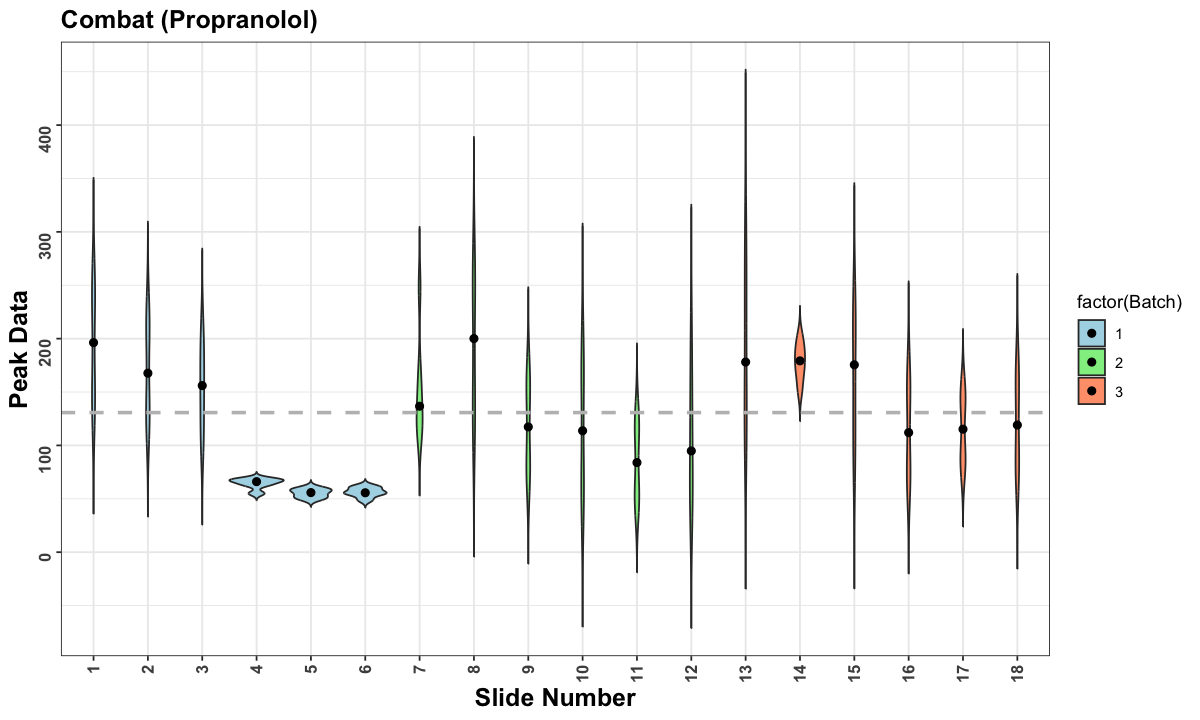

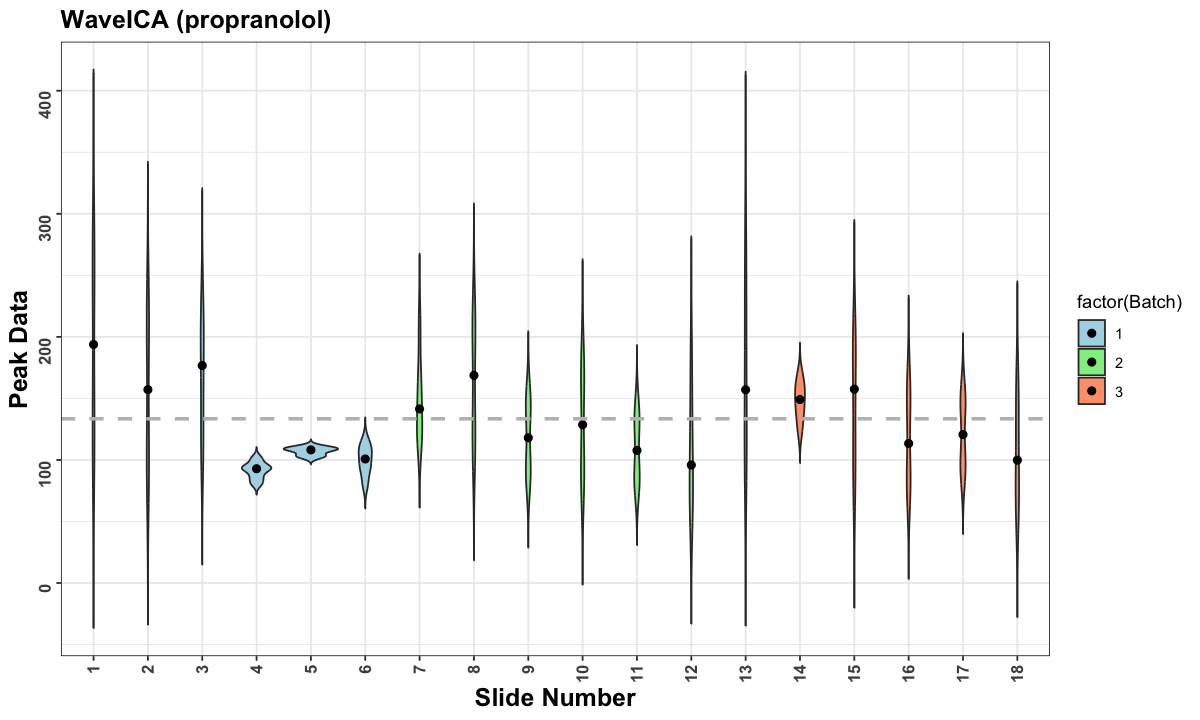

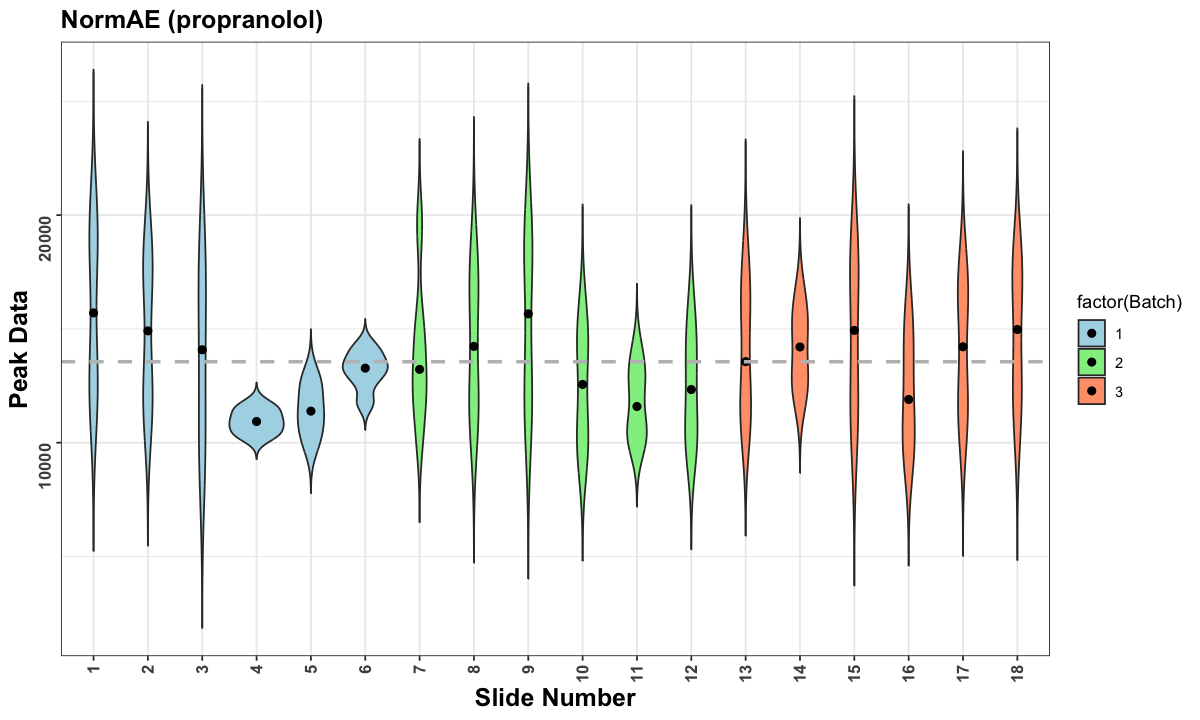

In [110]:
## Violin Plot for propranolol ##

# violin plot for propranolol combat
# Load required library
library(ggplot2)
library(dplyr)

propranolol_data_trans <- as.data.frame(t(propranolol_data_combat))
propranolol_data_trans[] <- lapply(propranolol_data_trans, as.numeric)

# Extract slide number
slide_number <- gsub("^.*S(\\d+)_.*", "\\1", names(propranolol_data_trans))
slide_number <- as.numeric(slide_number)

# Create violin plot data frame
violin_data <- data.frame(
  Slide = slide_number,
  Batch = propranolol_data$batch,
  Value = unlist(propranolol_data_trans[3, ])
)

# Sort the data frame based on the Slide column
violin_data <- violin_data %>%
  arrange(Slide)

# find mean of all samples
mean_value <- mean(violin_data$Value)

# format the violin plot
options(repr.plot.width = 10, repr.plot.height = 6)  # Adjust width and height as desired

# Create a violin plot with adjusted width
violin_plot_combat <- ggplot(violin_data, aes(x = factor(Slide), y = Value, fill = factor(Batch))) +
  geom_violin(position = position_dodge(width = 0.5), trim = FALSE, width = 1) +
  stat_summary(fun = median, geom = "point", shape = 20, size = 3, color = "black") +
  geom_hline(yintercept = mean_value, linetype = "dashed", color = "gray", linewidth = 1) +
  scale_fill_manual(values = c("1" = "#ADD8E6", "2" = "#90EE90", "3" = "#FFA07A")) +
  labs(x = "Slide Number", y = "Peak Data", title = "Combat (Propranolol)") +
  theme_bw() +
  theme(
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, face = "bold"),
    axis.text.y = element_text(angle = 90, vjust = 0.5, hjust = 1, face = "bold"),
    axis.title = element_text(face = "bold", size = 15),  # Bold and increase size of axis titles
    plot.title = element_text(face = "bold", size = 15),  # Bold and increase size of plot title
    axis.text = element_text(size = 10)  # Increase size of axis values
  )

# Display the violin plot
print(violin_plot_combat)

# violin plot for propranolol Waveica
propranolol_data_trans <- as.data.frame(t(propranolol_data_wave))
propranolol_data_trans[] <- lapply(propranolol_data_trans, as.numeric)

# Extract slide number
slide_number <- gsub("^.*S(\\d+)_.*", "\\1", names(propranolol_data_trans))
slide_number <- as.numeric(slide_number)

# Create violin plot data frame
violin_data <- data.frame(
  Slide = slide_number,
  Batch = propranolol_data$batch,
  Value = unlist(propranolol_data_trans[3, ])
)

# Sort the data frame based on the Slide column
violin_data <- violin_data %>%
  arrange(Slide)

# find mean of all samples
mean_value <- mean(violin_data$Value)

# format the violin plot
options(repr.plot.width = 10, repr.plot.height = 6)  # Adjust width and height as desired

# Create a violin plot with adjusted width
violin_plot_wave <- ggplot(violin_data, aes(x = factor(Slide), y = Value, fill = factor(Batch))) +
  geom_violin(position = position_dodge(width = 0.5), trim = FALSE, width = 1) +
  stat_summary(fun = median, geom = "point", shape = 20, size = 3, color = "black") +
  geom_hline(yintercept = mean_value, linetype = "dashed", color = "gray", linewidth = 1) +
  scale_fill_manual(values = c("1" = "#ADD8E6", "2" = "#90EE90", "3" = "#FFA07A")) +
  labs(x = "Slide Number", y = "Peak Data", title = "WaveICA (propranolol)") +
  theme_bw() +
  theme(
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, face = "bold"),
    axis.text.y = element_text(angle = 90, vjust = 0.5, hjust = 1, face = "bold"),
    axis.title = element_text(face = "bold", size = 15),  # Bold and increase size of axis titles
    plot.title = element_text(face = "bold", size = 15),  # Bold and increase size of plot title
    axis.text = element_text(size = 10)  # Increase size of axis values
  )

# Display the violin plot
print(violin_plot_wave)

# violin plot for propranolol normae
propranolol_data_trans <- as.data.frame(t(propranolol_data_norm))
propranolol_data_trans[] <- lapply(propranolol_data_trans, as.numeric)

# Extract slide number
slide_number <- gsub("^.*S(\\d+)_.*", "\\1", names(propranolol_data_trans))
slide_number <- as.numeric(slide_number)

# Create violin plot data frame
violin_data <- data.frame(
  Slide = slide_number,
  Batch = propranolol_data$batch,
  Value = unlist(propranolol_data_trans[3, ])
)

# Sort the data frame based on the Slide column
violin_data <- violin_data %>%
  arrange(Slide)

# find mean of all samples
mean_value <- mean(violin_data$Value)

# format the violin plot
options(repr.plot.width = 10, repr.plot.height = 6)  # Adjust width and height as desired

# Create a violin plot with adjusted width
violin_plot_norm <- ggplot(violin_data, aes(x = factor(Slide), y = Value, fill = factor(Batch))) +
  geom_violin(position = position_dodge(width = 0.5), trim = FALSE, width = 1) +
  stat_summary(fun = median, geom = "point", shape = 20, size = 3, color = "black") +
  geom_hline(yintercept = mean_value, linetype = "dashed", color = "gray", linewidth = 1) +
  scale_fill_manual(values = c("1" = "#ADD8E6", "2" = "#90EE90", "3" = "#FFA07A")) +
  labs(x = "Slide Number", y = "Peak Data", title = "NormAE (propranolol)") +
  theme_bw() +
  theme(
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, face = "bold"),
    axis.text.y = element_text(angle = 90, vjust = 0.5, hjust = 1, face = "bold"),
    axis.title = element_text(face = "bold", size = 15),  # Bold and increase size of axis titles
    plot.title = element_text(face = "bold", size = 15),  # Bold and increase size of plot title
    axis.text = element_text(size = 10)  # Increase size of axis values
  )

# Display the violin plot
print(violin_plot_norm)

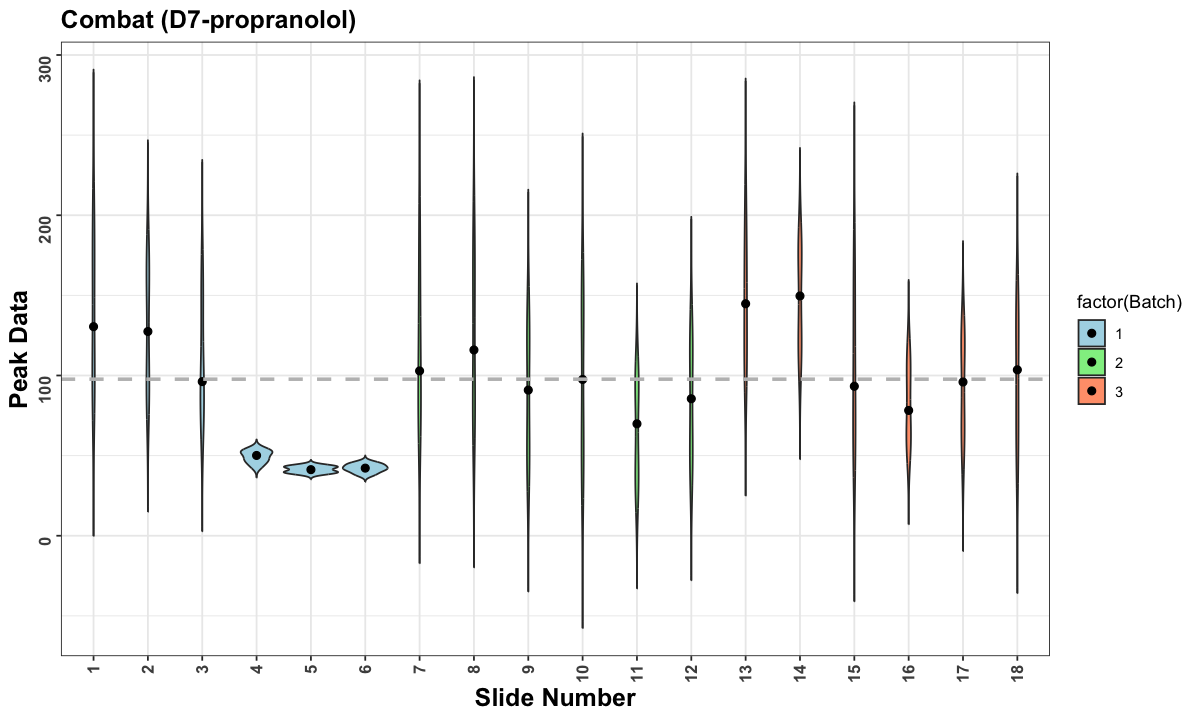

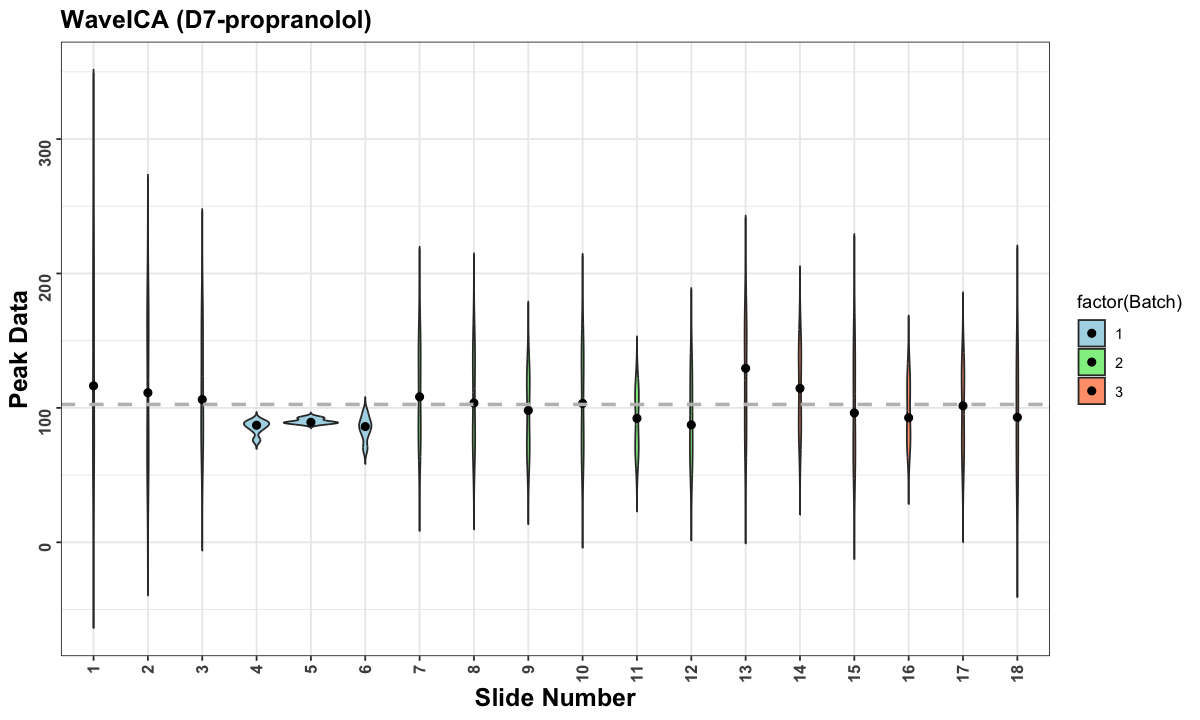

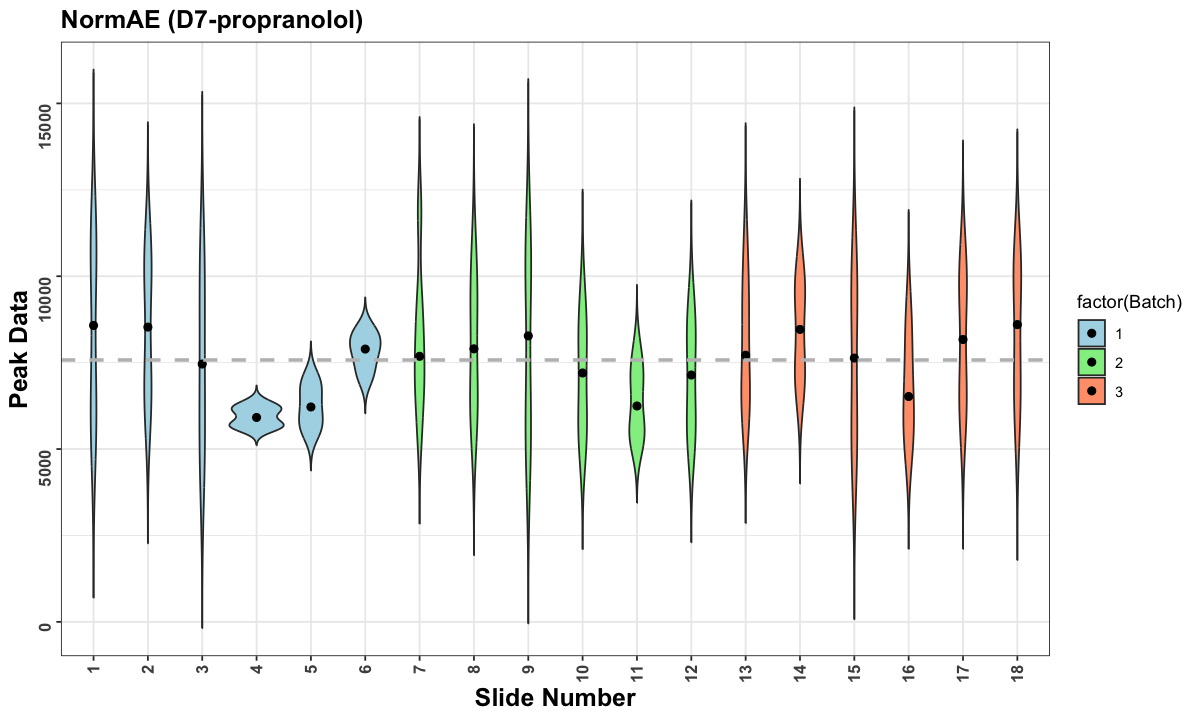

In [111]:
## Violin plot for d7-propranolol ##
# violin plot for d7-propranolol for combat
propranolol_data_trans <- as.data.frame(t(d7_propranolol_data_combat))
propranolol_data_trans[] <- lapply(propranolol_data_trans, as.numeric)

# Extract slide number
slide_number <- gsub("^.*S(\\d+)_.*", "\\1", names(propranolol_data_trans))
slide_number <- as.numeric(slide_number)

# Create violin plot data frame
violin_data <- data.frame(
  Slide = slide_number,
  Batch = propranolol_data$batch,
  Value = unlist(propranolol_data_trans[3, ])
)

# Sort the data frame based on the Slide column
violin_data <- violin_data %>%
  arrange(Slide)

# find mean of all samples
mean_value <- mean(violin_data$Value)

# format the violin plot
options(repr.plot.width = 10, repr.plot.height = 6)  # Adjust width and height as desired

# Create a violin plot with adjusted width
violin_plot_d7_combat <- ggplot(violin_data, aes(x = factor(Slide), y = Value, fill = factor(Batch))) +
  geom_violin(position = position_dodge(width = 0.5), trim = FALSE, width = 1) +
  stat_summary(fun = median, geom = "point", shape = 20, size = 3, color = "black") +
  geom_hline(yintercept = mean_value, linetype = "dashed", color = "gray", linewidth = 1) +
  scale_fill_manual(values = c("1" = "#ADD8E6", "2" = "#90EE90", "3" = "#FFA07A")) +
  labs(x = "Slide Number", y = "Peak Data", title = "Combat (D7-propranolol)") +
  theme_bw() +
  theme(
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, face = "bold"),
    axis.text.y = element_text(angle = 90, vjust = 0.5, hjust = 1, face = "bold"),
    axis.title = element_text(face = "bold", size = 15),  # Bold and increase size of axis titles
    plot.title = element_text(face = "bold", size = 15),  # Bold and increase size of plot title
    axis.text = element_text(size = 10)  # Increase size of axis values
  )

# Display the violin plot
print(violin_plot_d7_combat)

# violin plot for d7-propranolol for wave
propranolol_data_trans <- as.data.frame(t(d7_propranolol_data_wave))
propranolol_data_trans[] <- lapply(propranolol_data_trans, as.numeric)

# Extract slide number
slide_number <- gsub("^.*S(\\d+)_.*", "\\1", names(propranolol_data_trans))
slide_number <- as.numeric(slide_number)

# Create violin plot data frame
violin_data <- data.frame(
  Slide = slide_number,
  Batch = propranolol_data$batch,
  Value = unlist(propranolol_data_trans[3, ])
)

# Sort the data frame based on the Slide column
violin_data <- violin_data %>%
  arrange(Slide)

# find mean of all samples
mean_value <- mean(violin_data$Value)

# format the violin plot
options(repr.plot.width = 10, repr.plot.height = 6)  # Adjust width and height as desired

# Create a violin plot with adjusted width
violin_plot_d7_wave <- ggplot(violin_data, aes(x = factor(Slide), y = Value, fill = factor(Batch))) +
  geom_violin(position = position_dodge(width = 0.5), trim = FALSE, width = 1) +
  stat_summary(fun = median, geom = "point", shape = 20, size = 3, color = "black") +
  geom_hline(yintercept = mean_value, linetype = "dashed", color = "gray", linewidth = 1) +
  scale_fill_manual(values = c("1" = "#ADD8E6", "2" = "#90EE90", "3" = "#FFA07A")) +
  labs(x = "Slide Number", y = "Peak Data", title = "WaveICA (D7-propranolol)") +
  theme_bw() +
  theme(
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, face = "bold"),
    axis.text.y = element_text(angle = 90, vjust = 0.5, hjust = 1, face = "bold"),
    axis.title = element_text(face = "bold", size = 15),  # Bold and increase size of axis titles
    plot.title = element_text(face = "bold", size = 15),  # Bold and increase size of plot title
    axis.text = element_text(size = 10)  # Increase size of axis values
  )

# Display the violin plot
print(violin_plot_d7_wave)

# violin plot for d7-propranolol for norm
propranolol_data_trans <- as.data.frame(t(d7_propranolol_data_norm))
propranolol_data_trans[] <- lapply(propranolol_data_trans, as.numeric)

# Extract slide number
slide_number <- gsub("^.*S(\\d+)_.*", "\\1", names(propranolol_data_trans))
slide_number <- as.numeric(slide_number)

# Create violin plot data frame
violin_data <- data.frame(
  Slide = slide_number,
  Batch = propranolol_data$batch,
  Value = unlist(propranolol_data_trans[3, ])
)

# Sort the data frame based on the Slide column
violin_data <- violin_data %>%
  arrange(Slide)

# find mean of all samples
mean_value <- mean(violin_data$Value)

# format the violin plot
options(repr.plot.width = 10, repr.plot.height = 6)  # Adjust width and height as desired

# Create a violin plot with adjusted width
violin_plot_d7_norm <- ggplot(violin_data, aes(x = factor(Slide), y = Value, fill = factor(Batch))) +
  geom_violin(position = position_dodge(width = 0.5), trim = FALSE, width = 1) +
  stat_summary(fun = median, geom = "point", shape = 20, size = 3, color = "black") +
  geom_hline(yintercept = mean_value, linetype = "dashed", color = "gray", linewidth = 1) +
  scale_fill_manual(values = c("1" = "#ADD8E6", "2" = "#90EE90", "3" = "#FFA07A")) +
  labs(x = "Slide Number", y = "Peak Data", title = "NormAE (D7-propranolol)") +
  theme_bw() +
  theme(
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, face = "bold"),
    axis.text.y = element_text(angle = 90, vjust = 0.5, hjust = 1, face = "bold"),
    axis.title = element_text(face = "bold", size = 15),  # Bold and increase size of axis titles
    plot.title = element_text(face = "bold", size = 15),  # Bold and increase size of plot title
    axis.text = element_text(size = 10)  # Increase size of axis values
  )

# Display the violin plot
print(violin_plot_d7_norm)

Total Score: 80.38 %Total Score: 81.91 %

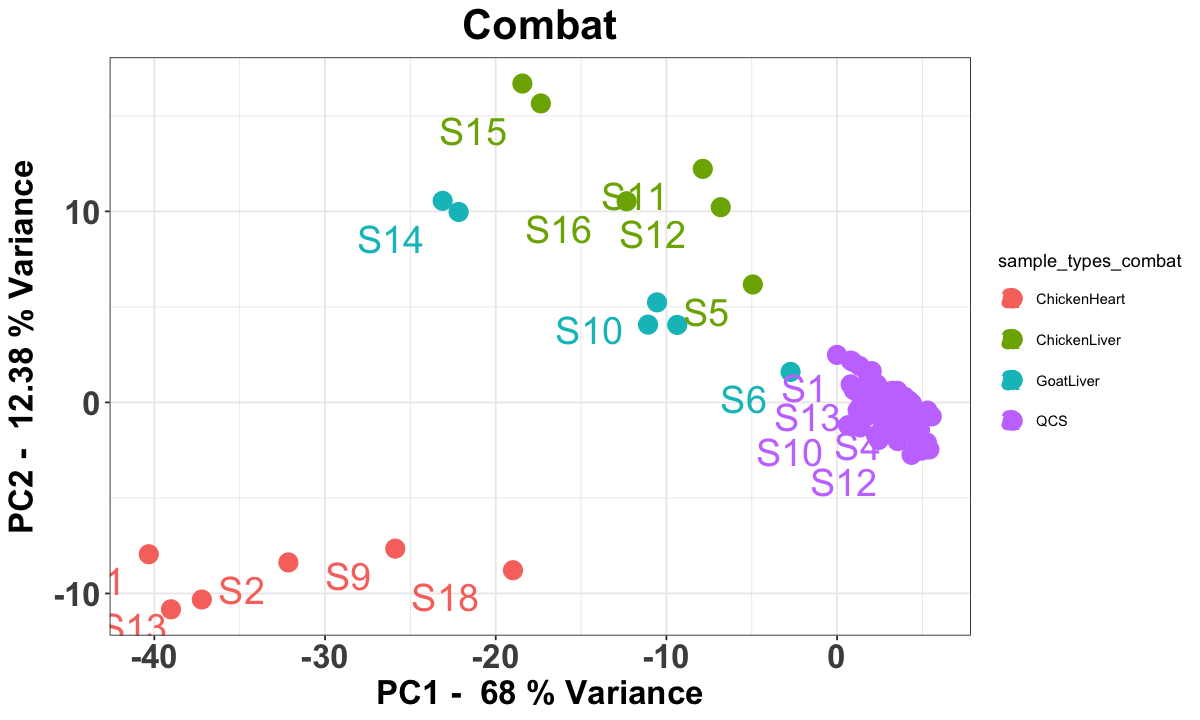

Total Score: 86.73 %

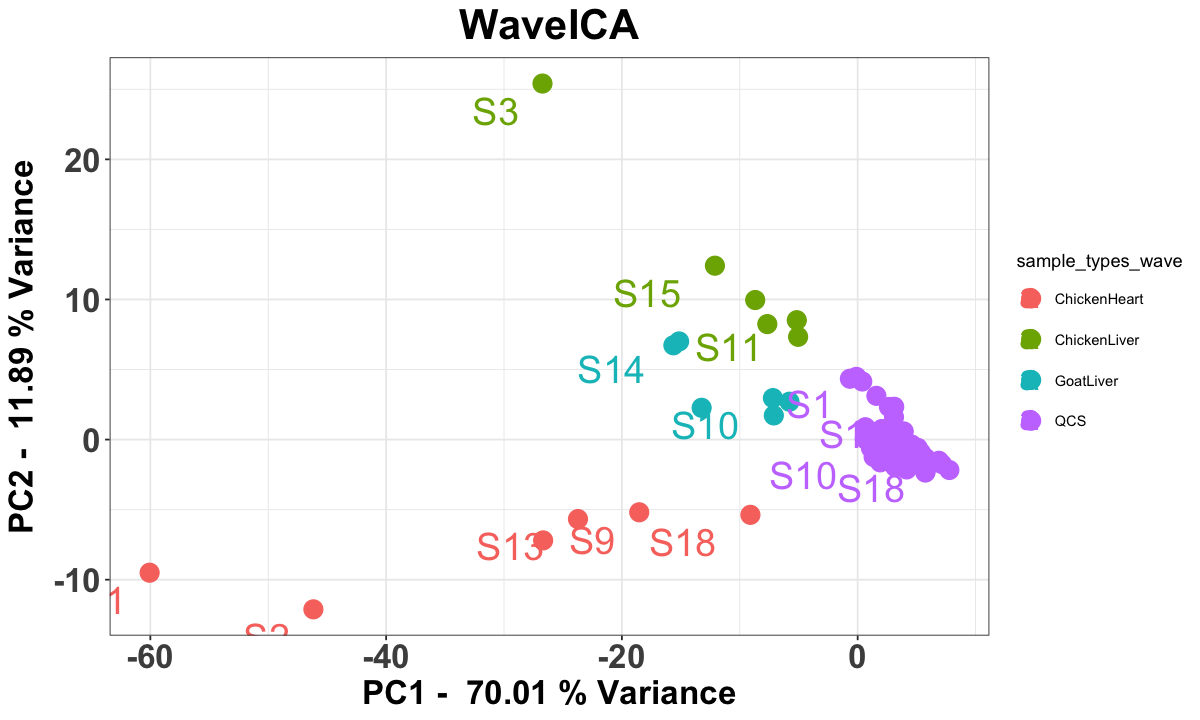

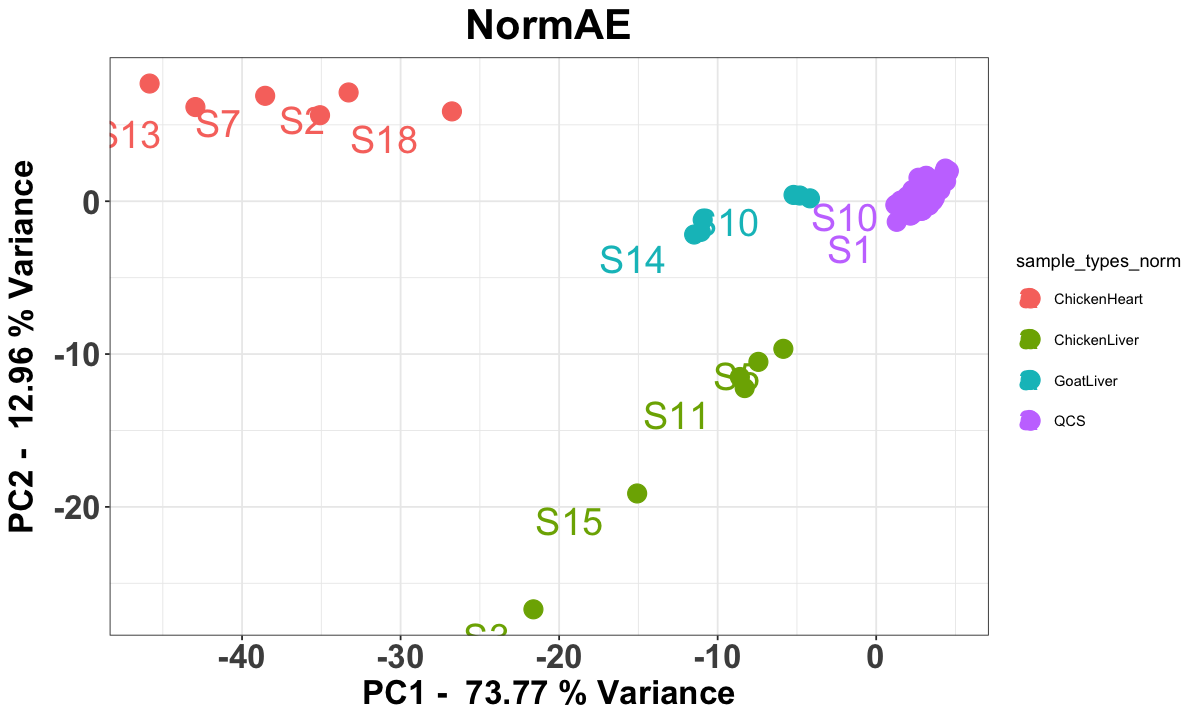

In [112]:
## PCA plot ##
library(stringr)
# pca plot for combat
options(repr.plot.width = 10, repr.plot.height = 6)  # Adjust width and height as desired
adjusted <- read.csv("dataset/combat_interday_corrected_data.csv", # 119 obs of 126 variables
                     header = TRUE,
                     stringsAsFactors = FALSE,
                     row.names = 1)

batch_matrix <- data.frame(adjusted)
sample_ID <- str_extract(colnames(batch_matrix), "(S|m/z)\\d+")

# Create the regular expression pattern for sample_set
pattern <- paste(sample_set, collapse = "|")

# Extract sample types from column names using the defined pattern
sample_types_combat <- str_extract(colnames(batch_matrix), pattern)
sample_types_combat[is.na(sample_types_combat)] <- "QCS"

# Transpose the data so that samples are on rows and features on columns
batch_data_t <- t(as.matrix(batch_matrix))

# Create a new data frame with the transposed matrix
batch_data_t_df <- as.data.frame(batch_data_t)

# Perform PCA, assuming batch_data_t_df contains the transposed data
batch_pca_combat <- prcomp(batch_data_t_df, center = TRUE, scale. = TRUE)

# Create a data frame for plotting the PCA
pca_data_combat <- data.frame(Sample = sample_ID, batch_pca_combat$x)

# Plot PCA with colored sample dots based on sample type
pca_data_combat$Score <- pca_data_combat$PC1 + pca_data_combat$PC2
pca_data_combat$Type <- sample_types_combat

# Calculate the PC1 and PC2 scores
pc1_score <- batch_pca_combat$sdev[1]^2
pc2_score <- batch_pca_combat$sdev[2]^2

# Calculate the total score as the sum of PC1 and PC2 scores
total_score <- pc1_score + pc2_score

# Display the score 
total_score_text_recon <- paste("Total Score:", round(total_score / sum(batch_pca_combat$sdev^2) * 100, 2), "%")
cat(total_score_text_recon)

# Create PCA plot
plot_combat <- ggplot(pca_data_combat, aes(x = PC1, y = PC2, color = sample_types_combat, label = Sample)) +
  geom_point(size = 5) +
  geom_text(hjust = 1.5, vjust = 1.5, size = 8, check_overlap = TRUE) +  # Increased label size
  xlab(paste("PC1 - ", round(batch_pca_combat$sdev[1]^2 / sum(batch_pca_combat$sdev^2) * 100, 2), "% Variance")) +
  ylab(paste("PC2 - ", round(batch_pca_combat$sdev[2]^2 / sum(batch_pca_combat$sdev^2) * 100, 2), "% Variance")) +
  ggtitle("Combat") +
  theme_bw() +
  theme(legend.position = "right", axis.text = element_text(size = 20, face='bold'), 
        axis.title = element_text(size = 20, face='bold'),
        plot.title = element_text(size = 25, hjust = 0.5, face = 'bold'))
print(plot_combat)

# pca plot for waveica
adjusted <- as.data.frame(t(waveica_result_interday))

batch_matrix <- data.frame(adjusted)
sample_ID <- str_extract(colnames(batch_matrix), "(S|m/z)\\d+")

# Create the regular expression pattern for sample_set
pattern <- paste(sample_set, collapse = "|")

# Extract sample types from column names using the defined pattern
sample_types_wave <- str_extract(colnames(batch_matrix), pattern)
sample_types_wave[is.na(sample_types_wave)] <- "QCS"

# Transpose the data so that samples are on rows and features on columns
batch_data_t <- t(as.matrix(batch_matrix))

# Create a new data frame with the transposed matrix
batch_data_t_df <- as.data.frame(batch_data_t)

# Perform PCA, assuming batch_data_t_df contains the transposed data
batch_pca_wave <- prcomp(batch_data_t_df, center = TRUE, scale. = TRUE)

# Create a data frame for plotting the PCA
pca_data_wave <- data.frame(Sample = sample_ID, batch_pca_wave$x)

# Plot PCA with colored sample dots based on sample type
pca_data_wave$Score <- pca_data_wave$PC1 + pca_data_wave$PC2
pca_data_wave$Type <- sample_types_wave

# Calculate the PC1 and PC2 scores
pc1_score <- batch_pca_wave$sdev[1]^2
pc2_score <- batch_pca_wave$sdev[2]^2

# Calculate the total score as the sum of PC1 and PC2 scores
total_score <- pc1_score + pc2_score

# Display the score 
total_score_text_recon <- paste("Total Score:", round(total_score / sum(batch_pca_wave$sdev^2) * 100, 2), "%")
cat(total_score_text_recon)

# Create PCA plot
plot_wave <- ggplot(pca_data_wave, aes(x = PC1, y = PC2, color = sample_types_wave, label = Sample)) +
  geom_point(size = 5) +
  geom_text(hjust = 1.5, vjust = 1.5, size = 8, check_overlap = TRUE) +  # Increased label size
  xlab(paste("PC1 - ", round(batch_pca_wave$sdev[1]^2 / sum(batch_pca_wave$sdev^2) * 100, 2), "% Variance")) +
  ylab(paste("PC2 - ", round(batch_pca_wave$sdev[2]^2 / sum(batch_pca_wave$sdev^2) * 100, 2), "% Variance")) +
  ggtitle("WaveICA") +
  theme_bw() +
  theme(legend.position = "right", axis.text = element_text(size = 20, face='bold'), 
        axis.title = element_text(size = 20, face='bold'),
        plot.title = element_text(size = 25, hjust = 0.5, face = 'bold'))
print(plot_wave)

# pca plot for normae
adjusted <- read.csv("dataset/Rec_nobe_no_norm.csv",
                     header = TRUE,
                     stringsAsFactors = FALSE)
adjusted <- adjusted[, -1]

batch_matrix <- data.frame(adjusted)
sample_ID <- str_extract(colnames(batch_matrix), "(S|m/z)\\d+")

# Create the regular expression pattern for sample_set
pattern <- paste(sample_set, collapse = "|")

# Extract sample types from column names using the defined pattern
sample_types_norm <- str_extract(colnames(batch_matrix), pattern)
sample_types_norm[is.na(sample_types_norm)] <- "QCS"

# Transpose the data so that samples are on rows and features on columns
batch_data_t <- t(as.matrix(batch_matrix))

# Create a new data frame with the transposed matrix
batch_data_t_df <- as.data.frame(batch_data_t)

# Perform PCA, assuming batch_data_t_df contains the transposed data
batch_pca_norm <- prcomp(batch_data_t_df, center = TRUE, scale. = TRUE)

# Create a data frame for plotting the PCA
pca_data_norm <- data.frame(Sample = sample_ID, batch_pca_norm$x)

# Plot PCA with colored sample dots based on sample type
pca_data_norm$Score <- pca_data_norm$PC1 + pca_data_norm$PC2
pca_data_norm$Type <- sample_types_norm

# Calculate the PC1 and PC2 scores
pc1_score <- batch_pca_norm$sdev[1]^2
pc2_score <- batch_pca_norm$sdev[2]^2

# Calculate the total score as the sum of PC1 and PC2 scores
total_score <- pc1_score + pc2_score

# Display the score 
total_score_text_recon <- paste("Total Score:", round(total_score / sum(batch_pca_norm$sdev^2) * 100, 2), "%")
cat(total_score_text_recon)

# Create PCA plot
plot_norm <- ggplot(pca_data_norm, aes(x = PC1, y = PC2, color = sample_types_norm, label = Sample)) +
  geom_point(size = 5) +
  geom_text(hjust = 1.5, vjust = 1.5, size = 8, check_overlap = TRUE) +  # Increased label size
  xlab(paste("PC1 - ", round(batch_pca_norm$sdev[1]^2 / sum(batch_pca_norm$sdev^2) * 100, 2), "% Variance")) +
  ylab(paste("PC2 - ", round(batch_pca_norm$sdev[2]^2 / sum(batch_pca_norm$sdev^2) * 100, 2), "% Variance")) +
  ggtitle("NormAE") +
  theme_bw() +
  theme(legend.position = "right", axis.text = element_text(size = 20, face='bold'), 
        axis.title = element_text(size = 20, face='bold'),
        plot.title = element_text(size = 25, hjust = 0.5, face = 'bold'))
print(plot_norm)

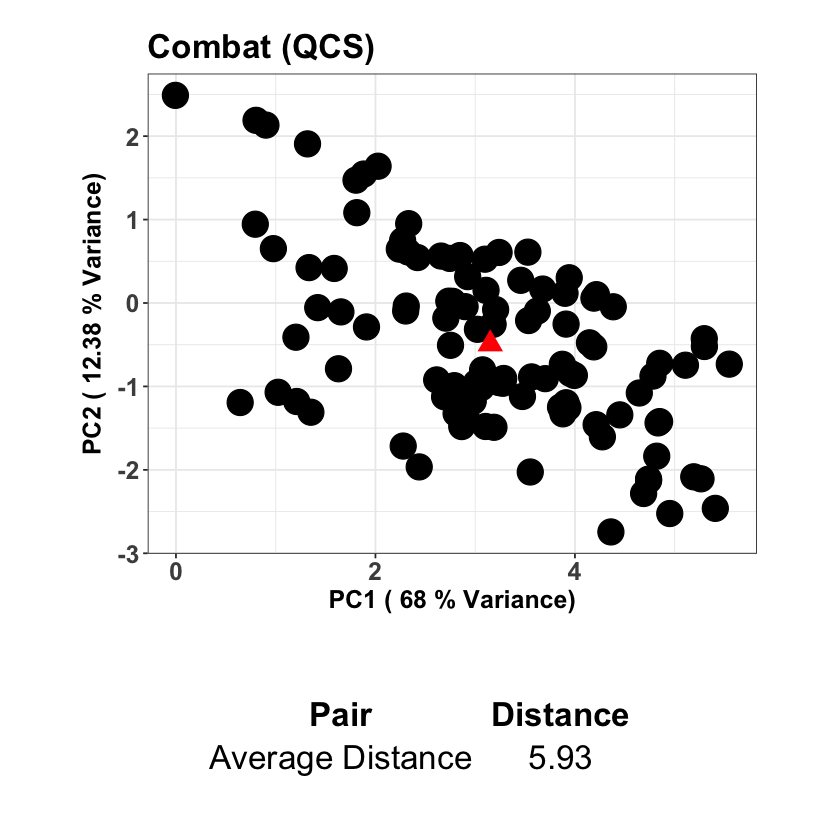

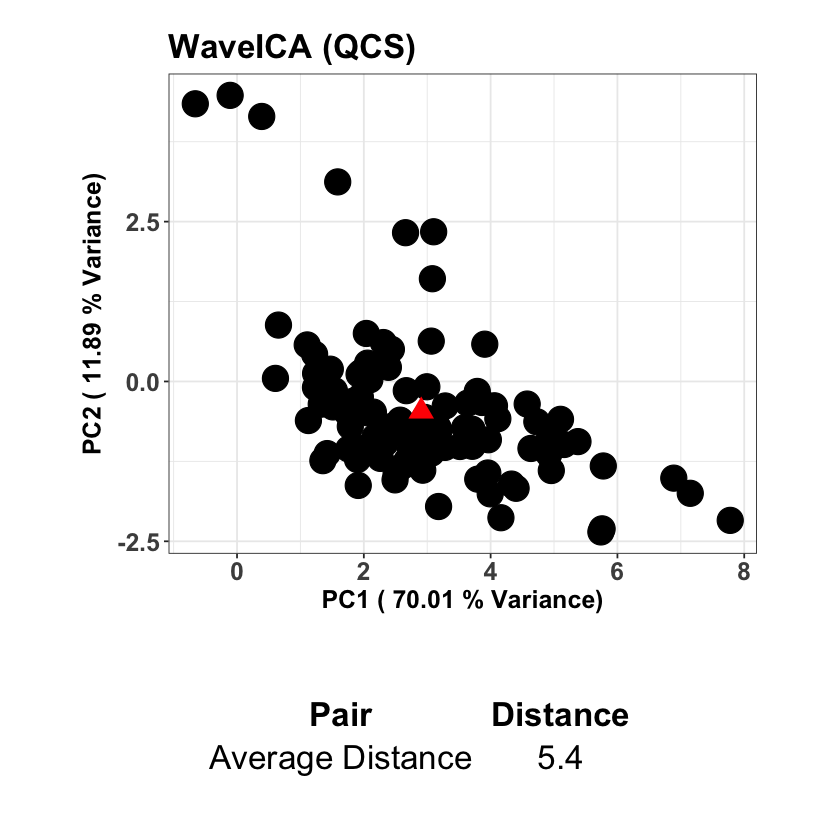

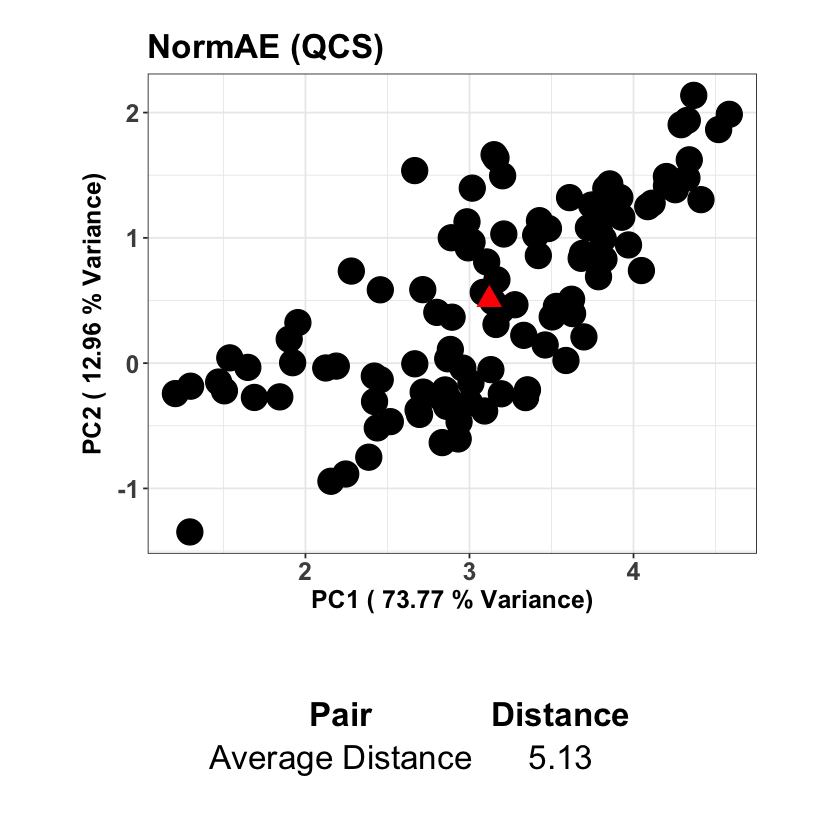

In [113]:
## QCS PCA Plot ##
# combat
## PCA plot of QCS ##
# no normalization raw data
# Load necessary libraries
library(ggplot2)
library(ggrepel)
library(cowplot)
library(gridExtra)

# gets rid of plot format
options(repr.plot.width = NULL, repr.plot.height = NULL)

# Calculate PCA scores
pca_scores <- batch_pca_combat$x

# Identify QCS samples based on sample types
qcs_samples <- which(sample_types_combat == "QCS")

# Extract PCA scores for QCS samples
qcs_scores <- pca_scores[qcs_samples, ]

# Compute the centroid of QCS samples
qcs_centroid <- colMeans(qcs_scores)

# Calculate PC1 and PC2 variances
pc1_variance <- round(batch_pca_combat$sdev[1]^2 / sum(batch_pca_combat$sdev^2) * 100, 2)
pc2_variance <- round(batch_pca_combat$sdev[2]^2 / sum(batch_pca_combat$sdev^2) * 100, 2)

# Plot PCA plot with QCS samples and their centroid
pca_plot_qcs_combat <- ggplot(data.frame(PC1 = qcs_scores[,1], PC2 = qcs_scores[,2]), aes(x = PC1, y = PC2)) +
  geom_point(size = 7) +  # Plot QCS samples
  geom_point(data = data.frame(PC1 = qcs_centroid[1], PC2 = qcs_centroid[2]), aes(x = PC1, y = PC2), shape = 17, fill = "red", color = "red", size = 5) +  # Plot centroid as triangle with filled red color
  labs(x = paste("PC1 (", pc1_variance, "% Variance)"), y = paste("PC2 (", pc2_variance, "% Variance)"), title = "Combat (QCS)") +
  theme_bw() +
  theme(axis.title.x = element_text(face = "bold", size = 15),
        axis.title.y = element_text(face = "bold", size = 15),
        axis.text = element_text(size = 15, face = "bold"),
        plot.margin = margin(20, 50, 10, 50),  # Adjust the bottom margin to 10 units
        plot.title = element_text(face = "bold", size = 20))  # Make the plot title bold and size 20

# Calculate average distance of QCS samples from the centroid
qcs_centroid_distances <- sqrt(rowSums((qcs_scores - qcs_centroid)^2))
average_qcs_distance_combat <- mean(qcs_centroid_distances)

# Create a data frame for average distance
average_distance_qcs_df_combat <- data.frame(
  Pair = "Average Distance",
  Distance = average_qcs_distance_combat
)

# Round distances for better presentation
average_distance_qcs_df_combat$Distance <- round(average_distance_qcs_df_combat$Distance, 2)

# Create a table plot
table_plot_qcs <- tableGrob(average_distance_qcs_df_combat, theme = ttheme_minimal(base_size = 20), rows = NULL)

# Combine the PCA plot and the table
combined_plot_combat_qcs <- plot_grid(pca_plot_qcs_combat, table_plot_qcs, ncol = 1, align = "v", axis = "lr", rel_heights = c(3, 1))

# Print the combined plot
print(combined_plot_combat_qcs)

# waveica
## PCA plot of QCS ##
# no normalization raw data
# Load necessary libraries
library(ggplot2)
library(ggrepel)
library(cowplot)
library(gridExtra)

# gets rid of plot format
options(repr.plot.width = NULL, repr.plot.height = NULL)

# Calculate PCA scores
pca_scores <- batch_pca_wave$x

# Identify QCS samples based on sample types
qcs_samples <- which(sample_types_wave == "QCS")

# Extract PCA scores for QCS samples
qcs_scores <- pca_scores[qcs_samples, ]

# Compute the centroid of QCS samples
qcs_centroid <- colMeans(qcs_scores)

# Calculate PC1 and PC2 variances
pc1_variance <- round(batch_pca_wave$sdev[1]^2 / sum(batch_pca_wave$sdev^2) * 100, 2)
pc2_variance <- round(batch_pca_wave$sdev[2]^2 / sum(batch_pca_wave$sdev^2) * 100, 2)

# Plot PCA plot with QCS samples and their centroid
pca_plot_qcs_wave <- ggplot(data.frame(PC1 = qcs_scores[,1], PC2 = qcs_scores[,2]), aes(x = PC1, y = PC2)) +
  geom_point(size = 7) +  # Plot QCS samples
  geom_point(data = data.frame(PC1 = qcs_centroid[1], PC2 = qcs_centroid[2]), aes(x = PC1, y = PC2), shape = 17, fill = "red", color = "red", size = 5) +  # Plot centroid as triangle with filled red color
  labs(x = paste("PC1 (", pc1_variance, "% Variance)"), y = paste("PC2 (", pc2_variance, "% Variance)"), title = "WaveICA (QCS)") +
  theme_bw() +
  theme(axis.title.x = element_text(face = "bold", size = 15),
        axis.title.y = element_text(face = "bold", size = 15),
        axis.text = element_text(size = 15, face = "bold"),
        plot.margin = margin(20, 50, 10, 50),  # Adjust the bottom margin to 10 units
        plot.title = element_text(face = "bold", size = 20))  # Make the plot title bold and size 20

# Calculate average distance of QCS samples from the centroid
qcs_centroid_distances <- sqrt(rowSums((qcs_scores - qcs_centroid)^2))
average_qcs_distance_wave <- mean(qcs_centroid_distances)

# Create a data frame for average distance
average_distance_qcs_df_wave <- data.frame(
  Pair = "Average Distance",
  Distance = average_qcs_distance_wave
)

# Round distances for better presentation
average_distance_qcs_df_wave$Distance <- round(average_distance_qcs_df_wave$Distance, 2)

# Create a table plot
table_plot_qcs <- tableGrob(average_distance_qcs_df_wave, theme = ttheme_minimal(base_size = 20), rows = NULL)

# Combine the PCA plot and the table
combined_plot_wave_qcs <- plot_grid(pca_plot_qcs_wave, table_plot_qcs, ncol = 1, align = "v", axis = "lr", rel_heights = c(3, 1))

# Print the combined plot
print(combined_plot_wave_qcs)


# normae
## PCA plot of QCS ##
# no normalization raw data
# Load necessary libraries
library(ggplot2)
library(ggrepel)
library(cowplot)
library(gridExtra)

# gets rid of plot format
options(repr.plot.width = NULL, repr.plot.height = NULL)

# Calculate PCA scores
pca_scores <- batch_pca_norm$x

# Identify QCS samples based on sample types
qcs_samples <- which(sample_types_norm == "QCS")

# Extract PCA scores for QCS samples
qcs_scores <- pca_scores[qcs_samples, ]

# Compute the centroid of QCS samples
qcs_centroid <- colMeans(qcs_scores)

# Calculate PC1 and PC2 variances
pc1_variance <- round(batch_pca_norm$sdev[1]^2 / sum(batch_pca_norm$sdev^2) * 100, 2)
pc2_variance <- round(batch_pca_norm$sdev[2]^2 / sum(batch_pca_norm$sdev^2) * 100, 2)

# Plot PCA plot with QCS samples and their centroid
pca_plot_qcs_norm <- ggplot(data.frame(PC1 = qcs_scores[,1], PC2 = qcs_scores[,2]), aes(x = PC1, y = PC2)) +
  geom_point(size = 7) +  # Plot QCS samples
  geom_point(data = data.frame(PC1 = qcs_centroid[1], PC2 = qcs_centroid[2]), aes(x = PC1, y = PC2), shape = 17, fill = "red", color = "red", size = 5) +  # Plot centroid as triangle with filled red color
  labs(x = paste("PC1 (", pc1_variance, "% Variance)"), y = paste("PC2 (", pc2_variance, "% Variance)"), title = "NormAE (QCS)") +
  theme_bw() +
  theme(axis.title.x = element_text(face = "bold", size = 15),
        axis.title.y = element_text(face = "bold", size = 15),
        axis.text = element_text(size = 15, face = "bold"),
        plot.margin = margin(20, 50, 10, 50),  # Adjust the bottom margin to 10 units
        plot.title = element_text(face = "bold", size = 20))  # Make the plot title bold and size 20

# Calculate average distance of QCS samples from the centroid
qcs_centroid_distances <- sqrt(rowSums((qcs_scores - qcs_centroid)^2))
average_qcs_distance_norm <- mean(qcs_centroid_distances)

# Create a data frame for average distance
average_distance_qcs_df_norm <- data.frame(
  Pair = "Average Distance",
  Distance = average_qcs_distance_norm
)

# Round distances for better presentation
average_distance_qcs_df_norm$Distance <- round(average_distance_qcs_df_norm$Distance, 2)

# Create a table plot
table_plot_qcs <- tableGrob(average_distance_qcs_df_norm, theme = ttheme_minimal(base_size = 20), rows = NULL)

# Combine the PCA plot and the table
combined_plot_norm_qcs <- plot_grid(pca_plot_qcs_norm, table_plot_qcs, ncol = 1, align = "v", axis = "lr", rel_heights = c(3, 1))

# Print the combined plot
print(combined_plot_norm_qcs)

In [114]:
## Calculate QCS eucleadan distance ##
# Combat 
qcs_indices <- which(pca_data_combat$Type == "QCS") # 108
pca_scores_qcs <- pca_data_combat[qcs_indices, -which(names(pca_data_combat) == "Score")]
numeric_cols <- sapply(pca_scores_qcs, is.numeric)
pca_scores_numeric <- pca_scores_qcs[, numeric_cols]

# calculate euclidean distance
euclidean_distances <- dist(pca_scores_numeric)
average_distance_ec_combat <- mean(euclidean_distances)
cat("Average QCS distance for Combat normalization is", average_distance_ec_combat, "\n")

# WaveICA
qcs_indices <- which(pca_data_wave$Type == "QCS") # 108
pca_scores_qcs <- pca_data_wave[qcs_indices, -which(names(pca_data_wave) == "Score")]
numeric_cols <- sapply(pca_scores_qcs, is.numeric)
pca_scores_numeric <- pca_scores_qcs[, numeric_cols]

# calculate euclidean distance
euclidean_distances <- dist(pca_scores_numeric)
average_distance_ec_wave <- mean(euclidean_distances)
cat("Average QCS distance for WaveICA normalization is", average_distance_ec_wave, "\n")

# NormAE
qcs_indices <- which(pca_data_norm$Type == "QCS") # 108
pca_scores_qcs <- pca_data_norm[qcs_indices, -which(names(pca_data_norm) == "Score")]
numeric_cols <- sapply(pca_scores_qcs, is.numeric)
pca_scores_numeric <- pca_scores_qcs[, numeric_cols]

# calculate euclidean distance
euclidean_distances <- dist(pca_scores_numeric)
average_distance_ec_norm <- mean(euclidean_distances)
cat("Average QCS distance for Norm normalization is", average_distance_ec_norm, "\n")

Average QCS distance for Combat normalization is 5.248275 
Average QCS distance for WaveICA normalization is 4.753652 
Average QCS distance for Norm normalization is 3.29667 


In [115]:
## Tissue RSD Table ##
## Tissue Variation RSD Combat ##
## QCS RSD Calculation ## combat
data <- read.csv("dataset/combat_interday_corrected_data.csv",
                 header = TRUE,
                 stringsAsFactors = FALSE,
                 row.names = 1) 
row_names <- rownames(data)
batch_info_norm <- read.csv("input/batch_info_TIC.csv",
                            header = TRUE,
                            stringsAsFactors = FALSE)
injection_order_norm <- batch_info_norm$injection.order
batch_norm <- batch_info_norm$batch

# add injection_order and batch_info
new_data <- rbind(injection_order_norm, batch_norm, data) # 128 obs of 119
new_row_names <- c("injection_order", "batch", row_names) #128 of 119 
rownames(new_data) <- new_row_names

# Transpose the data
transposed_data <- as.data.frame(t(new_data))
sample_set <- c("ChickenHeart", "ChickenLiver", "GoatLiver")
sample_set_regex <- paste(sample_set, collapse = "|")
sample_set_rows <- grep(sample_set_regex, rownames(transposed_data)) #126 obs of 121 variables
tissue_samples <- transposed_data[sample_set_rows,]
row_names <- rownames(tissue_samples)
tissue_samples <- as.data.frame(apply(tissue_samples, 2, as.numeric))
rownames(tissue_samples) <- row_names

# Function to calculate rsd for tissue
calculate_batch_rsd_combined <- function(tissue_samples) {
  # Function to calculate batch RSD for a given tissue dataset
  calculate_batch_rsd <- function(sample_dataset, batch_number) {
    # Extract data for the specified batch number
    batch_data <- sample_dataset[sample_dataset$batch == batch_number, -(1:2)]
    
    # Calculate mean and standard deviation for each analyte
    means <- apply(batch_data, 2, mean, na.rm = TRUE)
    std_devs <- apply(batch_data, 2, sd, na.rm = TRUE)
    
    # Calculate RSD
    rsd <- (std_devs / means) * 100
    
    # Calculate mean RSD and standard deviation of RSD
    mean_rsd <- mean(rsd)
    std_rsd <- sd(rsd)
    
    # Format the results
    rsd_formatted <- sprintf("%.2f ± %.2f%%", mean_rsd, std_rsd)
    
    # Return the formatted RSD
    return(rsd_formatted)
  }
  
  # Function to calculate interday RSD for a given tissue dataset
  calculate_interday_rsd <- function(sample_dataset) {
    # Extract data for interday calculation
    interday_data <- sample_dataset[, -(1:2)]
    
    # Calculate mean and standard deviation for each analyte
    means <- apply(interday_data, 2, mean, na.rm = TRUE)
    std_devs <- apply(interday_data, 2, sd, na.rm = TRUE)
    
    # Calculate RSD
    rsd <- (std_devs / means) * 100
    
    # Calculate mean RSD and standard deviation of RSD
    mean_rsd <- mean(rsd)
    std_rsd <- sd(rsd)
    
    # Format the results
    rsd_formatted <- sprintf("%.2f ± %.2f%%", mean_rsd, std_rsd)
    
    # Return the formatted RSD
    return(rsd_formatted)
  }
  
  # Function to calculate batch RSD for multiple batches
  calculate_batch_rsd_multiple <- function(sample_dataset, unique_batches) {
    rsd_results <- list()
    for (batch_number in unique_batches) {
      rsd_results[[as.character(batch_number)]] <- calculate_batch_rsd(sample_dataset, batch_number)
    }
    return(rsd_results)
  }
  
  # Extract unique tissue sample datasets for each tissue type
  unique_tissues <- unique(gsub(".*_(\\w+)_\\d+.*", "\\1", rownames(tissue_samples)))
  
  # Initialize list to store results for each tissue type
  rsd_results <- list()
  
  # Loop through each tissue type
  for (tissue_type in unique_tissues) {
    # Filter tissue samples for the current tissue type
    tissue_data <- tissue_samples[grep(paste0(tissue_type, "_"), rownames(tissue_samples)), ]
    
    # Order the dataset based on s_value
    sample_numbers <- as.numeric(gsub(".*S(\\d+)_.*", "\\1", rownames(tissue_data)))
    ordered_indices <- order(sample_numbers)
    tissue_data <- tissue_data[ordered_indices, ]
    
    # Replace negative values with 1
    tissue_data <- replace(tissue_data, tissue_data < 0, 1)
    
    # Calculate batch RSD for unique batches
    unique_batches <- unique(tissue_data$batch)
    rsd_results_tissue <- calculate_batch_rsd_multiple(tissue_data, unique_batches)
    
    # Calculate interday RSD
    interday_rsd <- calculate_interday_rsd(tissue_data)
    
    # Combine batch and interday RSD results into a data frame
    rsd_df_tissue <- data.frame(
      Batch = names(rsd_results_tissue),
      RSD = unlist(rsd_results_tissue)
    )
    rsd_df_tissue <- rbind(rsd_df_tissue, c("Interday", interday_rsd))
    rownames(rsd_df_tissue) <- NULL
    
    # Alter batch names to Intraday 1, Intraday 2, etc.
    batch_names <- c("Intraday 1", "Intraday 2", "Intraday 3")
    rsd_df_tissue$Batch <- ifelse(rsd_df_tissue$Batch == "Interday", "Interday", batch_names)
    
    # Store results for the current tissue type
    rsd_results[[tissue_type]] <- rsd_df_tissue
  }
  
  return(rsd_results)
}

rsd_results_combined_combat <- calculate_batch_rsd_combined(tissue_samples)
#print(rsd_results_combined_combat)

# Assuming rsd_results_combined is the output of calculate_batch_rsd_combined

library(kableExtra)
library(IRdisplay)

# Create a function to generate HTML tables for each tissue
generate_rsd_table <- function(rsd_results, tissue_name) {
  rsd_df <- rsd_results[[tissue_name]]
  kable(rsd_df, format = "html", row.names = FALSE) %>%
    kable_styling(full_width = FALSE)
}

# Generate HTML tables for each tissue
html_tables_combat <- lapply(names(rsd_results_combined_combat), function(tissue_name) {
  rsd_table <- generate_rsd_table(rsd_results_combined_combat, tissue_name)
  table_name <- paste("<h2 style='text-align: center;'>", tissue_name, " RSD Table</h2>", sep = "")
  paste("<div style='display: inline-block; margin-right: 20px; text-align: center;'>", table_name, as.character(rsd_table), "</div>")
})

# Combine HTML tables into a single string
html_content_combat <- paste(html_tables_combat, collapse = "")

# Wrap the combined HTML content in a div with text-align: center
centered_html_content_combat <- paste("<div style='text-align: center;'>", html_content_combat, "</div>")

# Display the centered HTML content in JupyterLab
display_html(centered_html_content_combat)

GoatLiver RSD Table 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 21.95 ± 9.34% 
 
 
 Intraday 2 
 29.78 ± 11.92% 
 
 
 Intraday 3 
 27.63 ± 13.00% 
 
 
 Interday 
 32.26 ± 13.97% 
 
 
 ChickenLiver RSD Table 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 35.48 ± 11.20% 
 
 
 Intraday 2 
 7.49 ± 6.36% 
 
 
 Intraday 3 
 12.35 ± 7.94% 
 
 
 Interday 
 26.44 ± 16.06% 
 
 
 ChickenHeart RSD Table 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 12.14 ± 6.69% 
 
 
 Intraday 2 
 19.53 ± 10.38% 
 
 
 Intraday 3 
 29.06 ± 14.17% 
 
 
 Interday 
 24.11 ± 18.08%

In [116]:
## Tissue Variation RSD WaveICA ##
data <- as.data.frame(t(waveica_result_interday)) #126 obs of 119 variables
row_names <- rownames(data)
batch_info_norm <- read.csv("input/batch_info_TIC.csv",
                            header = TRUE,
                            stringsAsFactors = FALSE)

injection_order_norm <- batch_info_norm$injection.order
batch_norm <- batch_info_norm$batch

# add injection_order and batch_info
new_data <- rbind(injection_order_norm, batch_norm, data)
new_row_names <- c("injection_order", "batch", row_names)
rownames(new_data) <- new_row_names

# Transpose the data
transposed_data <- as.data.frame(t(new_data))
sample_set_regex <- paste(sample_set, collapse = "|")
sample_set_rows <- grep(sample_set_regex, rownames(transposed_data)) #126 obs of 121 variables
tissue_samples <- transposed_data[sample_set_rows,]
row_names <- rownames(tissue_samples)
tissue_samples <- as.data.frame(apply(tissue_samples, 2, as.numeric))
rownames(tissue_samples) <- row_names

# run function
rsd_results_combined_wave <- calculate_batch_rsd_combined(tissue_samples)
#print(rsd_results_combined_wave)

# generate RSD table as html
library(kableExtra)
library(IRdisplay)

# Create a function to generate HTML tables for each tissue
generate_rsd_table <- function(rsd_results, tissue_name) {
  rsd_df <- rsd_results[[tissue_name]]
  kable(rsd_df, format = "html", row.names = FALSE) %>%
    kable_styling(full_width = FALSE)
}

# Generate HTML tables for each tissue
html_tables_wave <- lapply(names(rsd_results_combined_wave), function(tissue_name) {
  rsd_table <- generate_rsd_table(rsd_results_combined_wave, tissue_name)
  table_name <- paste("<h2 style='text-align: center;'>", tissue_name, " RSD Table</h2>", sep = "")
  paste("<div style='display: inline-block; margin-right: 20px; text-align: center;'>", table_name, as.character(rsd_table), "</div>")
})

# Combine HTML tables into a single string
html_content_wave <- paste(html_tables_wave, collapse = "")

# Wrap the combined HTML content in a div with text-align: center
centered_html_content_wave <- paste("<div style='text-align: center;'>", html_content_wave, "</div>")

# Display the centered HTML content in JupyterLab
display_html(centered_html_content_wave)

GoatLiver RSD Table 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 17.69 ± 16.22% 
 
 
 Intraday 2 
 19.88 ± 7.04% 
 
 
 Intraday 3 
 24.69 ± 16.19% 
 
 
 Interday 
 21.13 ± 11.08% 
 
 
 ChickenLiver RSD Table 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 36.21 ± 17.90% 
 
 
 Intraday 2 
 5.11 ± 4.64% 
 
 
 Intraday 3 
 12.33 ± 15.01% 
 
 
 Interday 
 29.77 ± 14.73% 
 
 
 ChickenHeart RSD Table 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 18.29 ± 14.97% 
 
 
 Intraday 2 
 13.12 ± 8.67% 
 
 
 Intraday 3 
 27.61 ± 12.91% 
 
 
 Interday 
 37.95 ± 14.96%

In [117]:
## Tissue Variation RSD NormAE ##

## QCS RSD Table ## NormAE
data <- read.csv("dataset/Rec_nobe_no_norm.csv",
                 header = TRUE,
                 stringsAsFactors = FALSE)
row_names <- data[,1]
rownames(data) <- row_names
data <- data[, -1]

batch_info_norm <- read.csv("dataset/Ys.csv",
                            header = TRUE,
                            stringsAsFactors = FALSE)

injection_order_norm <- batch_info_norm$injection.order
batch_norm <- batch_info_norm$batch

# add injection_order and batch_info
new_data <- rbind(injection_order_norm, batch_norm, data)
new_row_names <- c("injection_order", "batch", row_names)
rownames(new_data) <- new_row_names

# Transpose the data
transposed_data <- as.data.frame(t(new_data))
sample_set_regex <- paste(sample_set, collapse = "|")
sample_set_rows <- grep(sample_set_regex, rownames(transposed_data)) #126 obs of 121 variables
tissue_samples <- transposed_data[sample_set_rows,]
row_names <- rownames(tissue_samples)
tissue_samples <- as.data.frame(apply(tissue_samples, 2, as.numeric))
rownames(tissue_samples) <- row_names

# run function
rsd_results_combined_norm <- calculate_batch_rsd_combined(tissue_samples)

# generate RSD table as html
library(kableExtra)
library(IRdisplay)

# Create a function to generate HTML tables for each tissue
generate_rsd_table <- function(rsd_results, tissue_name) {
  rsd_df <- rsd_results[[tissue_name]]
  kable(rsd_df, format = "html", row.names = FALSE) %>%
    kable_styling(full_width = FALSE)
}

# Generate HTML tables for each tissue
html_tables_norm <- lapply(names(rsd_results_combined_norm), function(tissue_name) {
  rsd_table <- generate_rsd_table(rsd_results_combined_norm, tissue_name)
  table_name <- paste("<h2 style='text-align: center;'>", tissue_name, " RSD Table</h2>", sep = "")
  paste("<div style='display: inline-block; margin-right: 20px; text-align: center;'>", table_name, as.character(rsd_table), "</div>")
})

# Combine HTML tables into a single string
html_content_norm <- paste(html_tables_norm, collapse = "")

# Wrap the combined HTML content in a div with text-align: center
centered_html_content_norm <- paste("<div style='text-align: center;'>", html_content_norm, "</div>")

# Display the centered HTML content in JupyterLab
display_html(centered_html_content_norm)

GoatLiver RSD Table 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 20.66 ± 8.33% 
 
 
 Intraday 2 
 20.06 ± 4.88% 
 
 
 Intraday 3 
 20.02 ± 6.60% 
 
 
 Interday 
 16.10 ± 4.43% 
 
 
 ChickenLiver RSD Table 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 37.57 ± 11.89% 
 
 
 Intraday 2 
 2.76 ± 2.66% 
 
 
 Intraday 3 
 19.94 ± 7.51% 
 
 
 Interday 
 22.77 ± 7.38% 
 
 
 ChickenHeart RSD Table 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 16.04 ± 13.15% 
 
 
 Intraday 2 
 6.90 ± 13.23% 
 
 
 Intraday 3 
 23.31 ± 15.31% 
 
 
 Interday 
 15.45 ± 16.19%

TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name               grob
1 1 (1-1,1-1) arrange     gtable[layout]
2 2 (2-2,1-1) arrange gtable[colhead-fg]


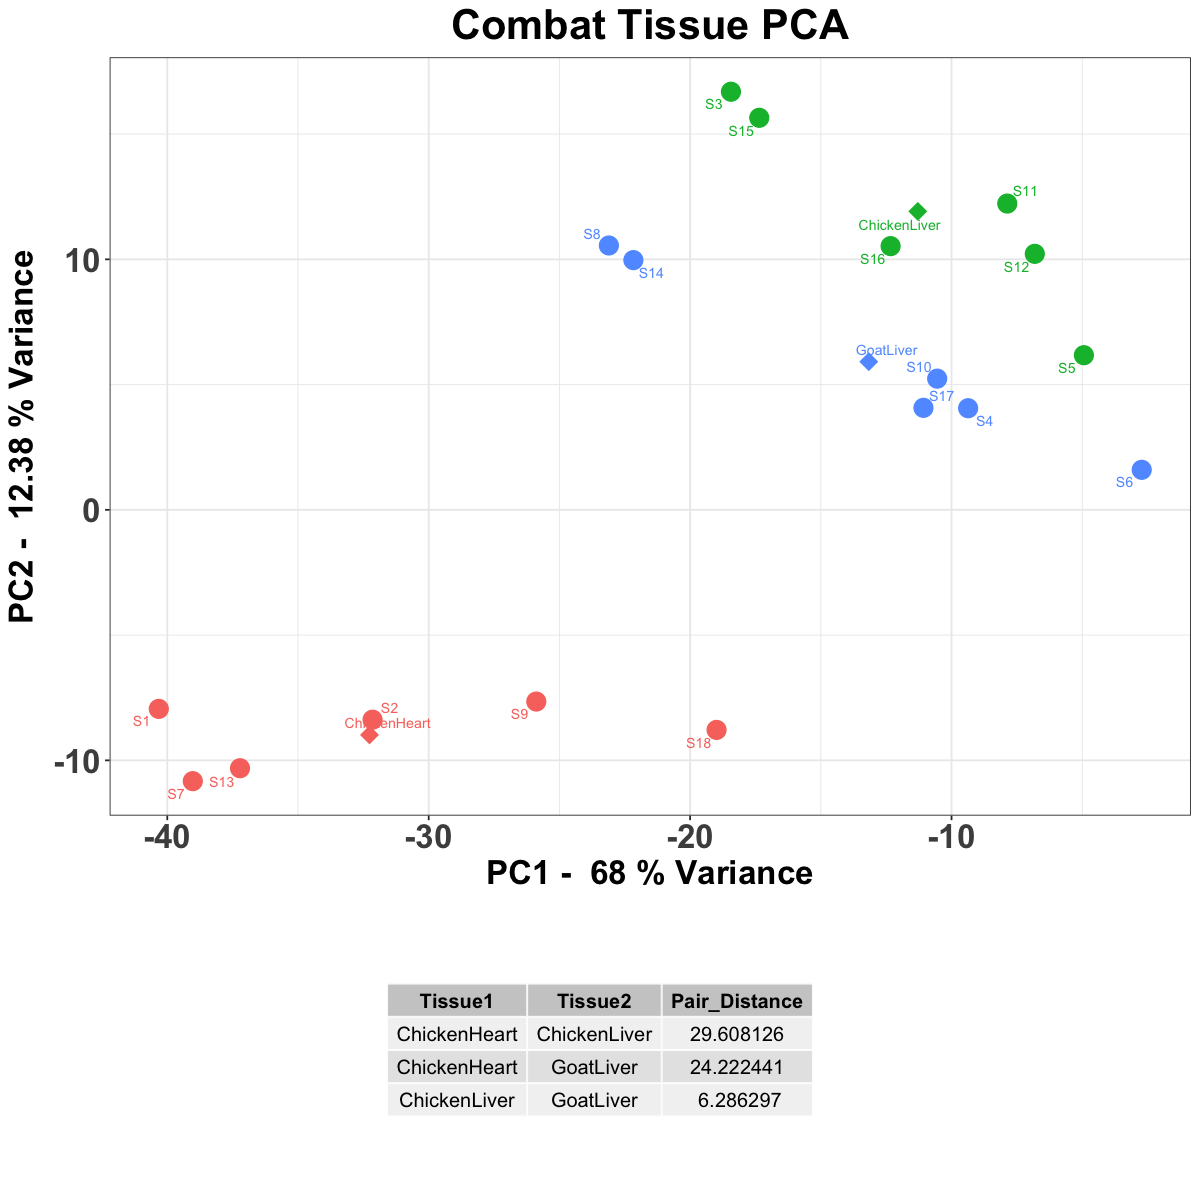

TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name               grob
1 1 (1-1,1-1) arrange     gtable[layout]
2 2 (2-2,1-1) arrange gtable[colhead-fg]


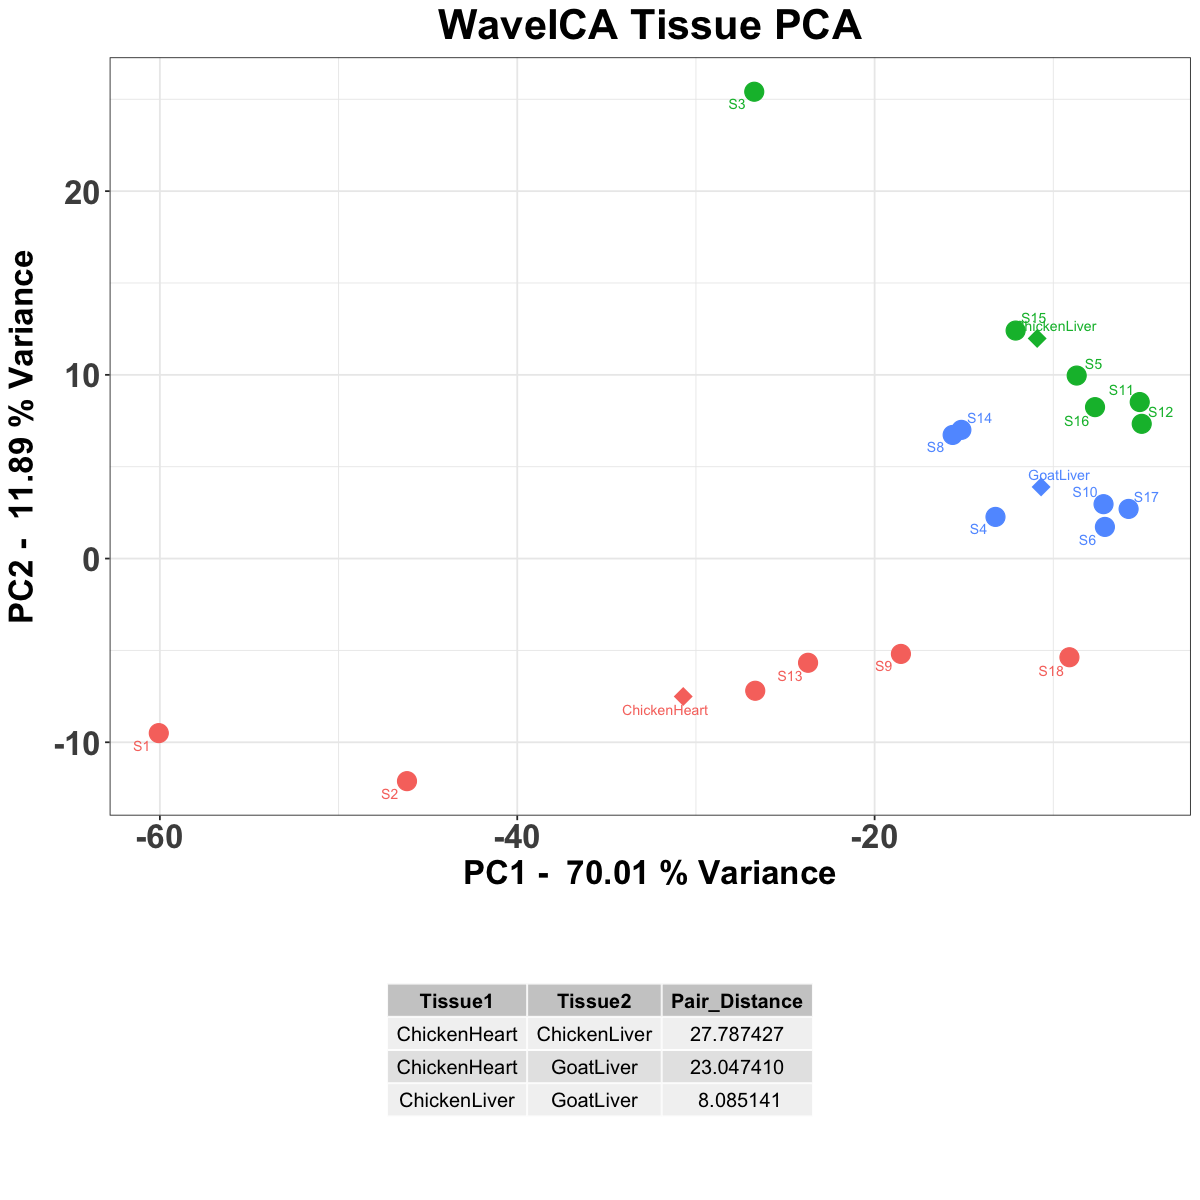

TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name               grob
1 1 (1-1,1-1) arrange     gtable[layout]
2 2 (2-2,1-1) arrange gtable[colhead-fg]


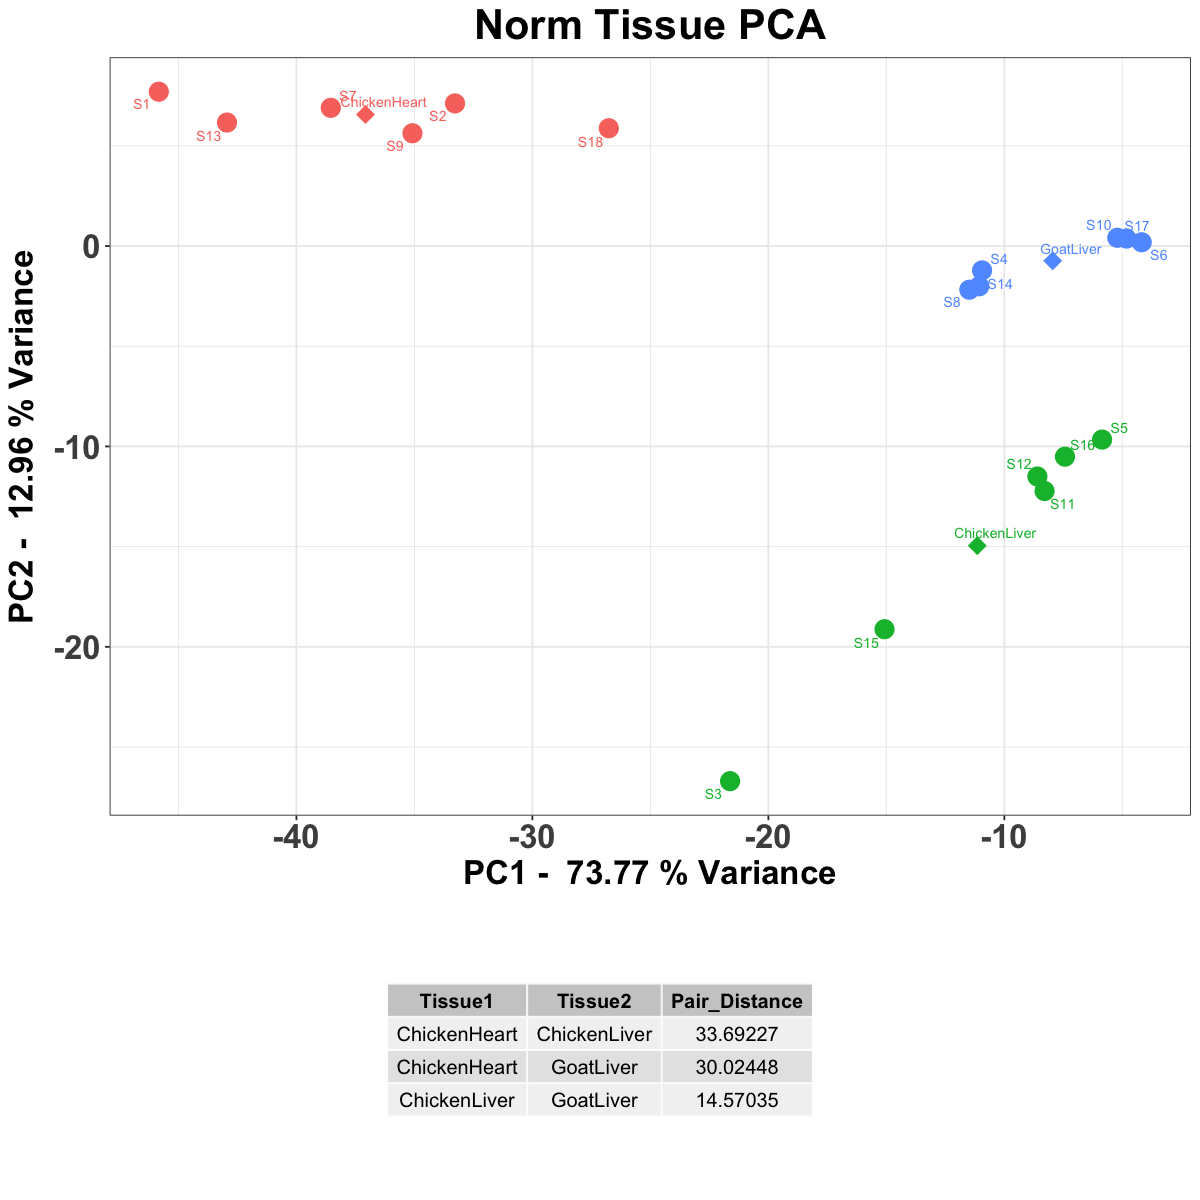

In [119]:
## Tissue PCA Plot ##
# Combat #
## Tissue with centroid PCA plot intergroup no norm ##
library(ggplot2)
library(dplyr)
library(ggrepel)
library(gridExtra)

options(repr.plot.width = 10, repr.plot.height = 10)  # Adjust width and height as desired

# Filter pca_data to include only tissue samples
tissue_pca_data <- pca_data_combat %>%
  filter(Type %in% sample_set)

# Calculate centroids for each tissue type
centroids <- tissue_pca_data %>%
  group_by(Type) %>%
  summarize(Centroid_PC1 = mean(PC1), Centroid_PC2 = mean(PC2))

# Plot tissue-only PCA with centroids, data point labels, and axis labels
tissue_plot <- ggplot(tissue_pca_data, aes(x = PC1, y = PC2, color = Type)) +
  geom_point(size = 5) +
  geom_point(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, color = Type), shape = 18, size = 5) +
  geom_text_repel(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, label = Type), 
                  direction = "both", size = 3) +  # Using geom_text_repel to prevent label overlap
  geom_text_repel(aes(label = Sample), direction = "both", size = 3) +  # Add labels for data points without overlap
  labs(title = "Combat Tissue PCA",
       x = paste("PC1 - ", round(batch_pca_combat$sdev[1]^2 / sum(batch_pca_combat$sdev^2) * 100, 2), "% Variance"),
       y = paste("PC2 - ", round(batch_pca_combat$sdev[2]^2 / sum(batch_pca_combat$sdev^2) * 100, 2), "% Variance")) +
  theme_bw() +
  theme(axis.text = element_text(size = 20, face = 'bold'), 
        axis.title = element_text(size = 20, face = 'bold'),
        plot.title = element_text(size = 25, hjust = 0.5, face = 'bold'),
        legend.position = "none")

# calculate intergroup distance #
# Create a data frame to store pairwise distances and tissue types
# Generate all possible combinations of tissue types
tissue_combinations <- combn(unique(centroids$Type), 2, simplify = TRUE)

# Initialize an empty data frame to store pairwise distances
centroid_distances_df_combat <- data.frame(Tissue1 = character(), Tissue2 = character(), Pair_Distance = numeric())

# Iterate over each pair of tissue combinations
for (i in 1:ncol(tissue_combinations)) {
  tissue_pair <- tissue_combinations[, i]
  centroid1 <- centroids %>% filter(Type == tissue_pair[1])
  centroid2 <- centroids %>% filter(Type == tissue_pair[2])
  distance <- sqrt((centroid1$Centroid_PC1 - centroid2$Centroid_PC1)^2 + (centroid1$Centroid_PC2 - centroid2$Centroid_PC2)^2)
  centroid_distances_df_combat <- rbind(centroid_distances_df_combat, data.frame(Tissue1 = tissue_pair[1], Tissue2 = tissue_pair[2], Pair_Distance = distance))
}

# Create the tissue plot
tissue_intergroup_plot_combat <- ggplot(tissue_pca_data, aes(x = PC1, y = PC2, color = Type)) +
  geom_point(size = 5) +
  geom_point(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, color = Type), shape = 18, size = 5) +
  geom_text_repel(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, label = Type), 
                  direction = "both", size = 3) +  
  geom_text_repel(aes(label = Sample), direction = "both", size = 3) +  
  labs(title = "Combat Tissue PCA",
       x = paste("PC1 - ", round(batch_pca_combat$sdev[1]^2 / sum(batch_pca_combat$sdev^2) * 100, 2), "% Variance"),
       y = paste("PC2 - ", round(batch_pca_combat$sdev[2]^2 / sum(batch_pca_combat$sdev^2) * 100, 2), "% Variance")) +
  theme_bw() +
  theme(axis.text = element_text(size = 20, face = 'bold'), 
        axis.title = element_text(size = 20, face = 'bold'),
        plot.title = element_text(size = 25, hjust = 0.5, face = 'bold'),
        legend.position = "none")

# Create a table grob for centroid distances
centroid_table_combat <- tableGrob(centroid_distances_df_combat, rows = NULL)

# Arrange plots and table vertically
combined_plot_combat_inter <- grid.arrange(tissue_intergroup_plot_combat, centroid_table_combat, ncol = 1, heights = c(3, 1))
print(combined_plot_combat_inter)
########################################################################################################################
# WaveICA #
## Tissue with centroid PCA plot intergroup no norm ##
library(ggplot2)
library(dplyr)
library(ggrepel)
library(gridExtra)

options(repr.plot.width = 10, repr.plot.height = 10)  # Adjust width and height as desired

# Filter pca_data to include only tissue samples
tissue_pca_data <- pca_data_wave %>%
  filter(Type %in% sample_set)

# Calculate centroids for each tissue type
centroids <- tissue_pca_data %>%
  group_by(Type) %>%
  summarize(Centroid_PC1 = mean(PC1), Centroid_PC2 = mean(PC2))

# Plot tissue-only PCA with centroids, data point labels, and axis labels
tissue_plot <- ggplot(tissue_pca_data, aes(x = PC1, y = PC2, color = Type)) +
  geom_point(size = 5) +
  geom_point(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, color = Type), shape = 18, size = 5) +
  geom_text_repel(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, label = Type), 
                  direction = "both", size = 3) +  # Using geom_text_repel to prevent label overlap
  geom_text_repel(aes(label = Sample), direction = "both", size = 3) +  # Add labels for data points without overlap
  labs(title = "WaveICA Tissue PCA",
       x = paste("PC1 - ", round(batch_pca_wave$sdev[1]^2 / sum(batch_pca_wave$sdev^2) * 100, 2), "% Variance"),
       y = paste("PC2 - ", round(batch_pca_wave$sdev[2]^2 / sum(batch_pca_wave$sdev^2) * 100, 2), "% Variance")) +
  theme_bw() +
  theme(axis.text = element_text(size = 20, face = 'bold'), 
        axis.title = element_text(size = 20, face = 'bold'),
        plot.title = element_text(size = 25, hjust = 0.5, face = 'bold'),
        legend.position = "none")

# calculate intergroup distance #
# Create a data frame to store pairwise distances and tissue types
# Generate all possible combinations of tissue types
tissue_combinations <- combn(unique(centroids$Type), 2, simplify = TRUE)

# Initialize an empty data frame to store pairwise distances
centroid_distances_df_wave <- data.frame(Tissue1 = character(), Tissue2 = character(), Pair_Distance = numeric())

# Iterate over each pair of tissue combinations
for (i in 1:ncol(tissue_combinations)) {
  tissue_pair <- tissue_combinations[, i]
  centroid1 <- centroids %>% filter(Type == tissue_pair[1])
  centroid2 <- centroids %>% filter(Type == tissue_pair[2])
  distance <- sqrt((centroid1$Centroid_PC1 - centroid2$Centroid_PC1)^2 + (centroid1$Centroid_PC2 - centroid2$Centroid_PC2)^2)
  centroid_distances_df_wave <- rbind(centroid_distances_df_wave, data.frame(Tissue1 = tissue_pair[1], Tissue2 = tissue_pair[2], Pair_Distance = distance))
}

# Create the tissue plot
tissue_intergroup_plot_wave <- ggplot(tissue_pca_data, aes(x = PC1, y = PC2, color = Type)) +
  geom_point(size = 5) +
  geom_point(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, color = Type), shape = 18, size = 5) +
  geom_text_repel(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, label = Type), 
                  direction = "both", size = 3) +  
  geom_text_repel(aes(label = Sample), direction = "both", size = 3) +  
  labs(title = "WaveICA Tissue PCA",
       x = paste("PC1 - ", round(batch_pca_wave$sdev[1]^2 / sum(batch_pca_wave$sdev^2) * 100, 2), "% Variance"),
       y = paste("PC2 - ", round(batch_pca_wave$sdev[2]^2 / sum(batch_pca_wave$sdev^2) * 100, 2), "% Variance")) +
  theme_bw() +
  theme(axis.text = element_text(size = 20, face = 'bold'), 
        axis.title = element_text(size = 20, face = 'bold'),
        plot.title = element_text(size = 25, hjust = 0.5, face = 'bold'),
        legend.position = "none")

# Create a table grob for centroid distances
centroid_table_wave <- tableGrob(centroid_distances_df_wave, rows = NULL)

# Arrange plots and table vertically
combined_plot_wave_inter <- grid.arrange(tissue_intergroup_plot_wave, centroid_table_wave, ncol = 1, heights = c(3, 1))
print(combined_plot_wave_inter)
########################################################################################################################
# NormAE #
## Tissue with centroid PCA plot intergroup no norm ##
library(ggplot2)
library(dplyr)
library(ggrepel)
library(gridExtra)

options(repr.plot.width = 10, repr.plot.height = 10)  # Adjust width and height as desired

# Filter pca_data to include only tissue samples
tissue_pca_data <- pca_data_norm %>%
  filter(Type %in% sample_set)

# Calculate centroids for each tissue type
centroids <- tissue_pca_data %>%
  group_by(Type) %>%
  summarize(Centroid_PC1 = mean(PC1), Centroid_PC2 = mean(PC2))

# Plot tissue-only PCA with centroids, data point labels, and axis labels
tissue_plot <- ggplot(tissue_pca_data, aes(x = PC1, y = PC2, color = Type)) +
  geom_point(size = 5) +
  geom_point(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, color = Type), shape = 18, size = 5) +
  geom_text_repel(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, label = Type), 
                  direction = "both", size = 3) +  # Using geom_text_repel to prevent label overlap
  geom_text_repel(aes(label = Sample), direction = "both", size = 3) +  # Add labels for data points without overlap
  labs(title = "Norm Tissue PCA",
       x = paste("PC1 - ", round(batch_pca_norm$sdev[1]^2 / sum(batch_pca_norm$sdev^2) * 100, 2), "% Variance"),
       y = paste("PC2 - ", round(batch_pca_norm$sdev[2]^2 / sum(batch_pca_norm$sdev^2) * 100, 2), "% Variance")) +
  theme_bw() +
  theme(axis.text = element_text(size = 20, face = 'bold'), 
        axis.title = element_text(size = 20, face = 'bold'),
        plot.title = element_text(size = 25, hjust = 0.5, face = 'bold'),
        legend.position = "none")

# calculate intergroup distance #
# Create a data frame to store pairwise distances and tissue types
# Generate all possible combinations of tissue types
tissue_combinations <- combn(unique(centroids$Type), 2, simplify = TRUE)

# Initialize an empty data frame to store pairwise distances
centroid_distances_df_norm <- data.frame(Tissue1 = character(), Tissue2 = character(), Pair_Distance = numeric())

# Iterate over each pair of tissue combinations
for (i in 1:ncol(tissue_combinations)) {
  tissue_pair <- tissue_combinations[, i]
  centroid1 <- centroids %>% filter(Type == tissue_pair[1])
  centroid2 <- centroids %>% filter(Type == tissue_pair[2])
  distance <- sqrt((centroid1$Centroid_PC1 - centroid2$Centroid_PC1)^2 + (centroid1$Centroid_PC2 - centroid2$Centroid_PC2)^2)
  centroid_distances_df_norm <- rbind(centroid_distances_df_norm, data.frame(Tissue1 = tissue_pair[1], Tissue2 = tissue_pair[2], Pair_Distance = distance))
}

# Create the tissue plot
tissue_intergroup_plot_norm <- ggplot(tissue_pca_data, aes(x = PC1, y = PC2, color = Type)) +
  geom_point(size = 5) +
  geom_point(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, color = Type), shape = 18, size = 5) +
  geom_text_repel(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, label = Type), 
                  direction = "both", size = 3) +  
  geom_text_repel(aes(label = Sample), direction = "both", size = 3) +  
  labs(title = "Norm Tissue PCA",
       x = paste("PC1 - ", round(batch_pca_norm$sdev[1]^2 / sum(batch_pca_norm$sdev^2) * 100, 2), "% Variance"),
       y = paste("PC2 - ", round(batch_pca_norm$sdev[2]^2 / sum(batch_pca_norm$sdev^2) * 100, 2), "% Variance")) +
  theme_bw() +
  theme(axis.text = element_text(size = 20, face = 'bold'), 
        axis.title = element_text(size = 20, face = 'bold'),
        plot.title = element_text(size = 25, hjust = 0.5, face = 'bold'),
        legend.position = "none")

# Create a table grob for centroid distances
centroid_table_norm <- tableGrob(centroid_distances_df_norm, rows = NULL)

# Arrange plots and table vertically
combined_plot_norm_inter <- grid.arrange(tissue_intergroup_plot_norm, centroid_table_norm, ncol = 1, heights = c(3, 1))
print(combined_plot_norm_inter)

TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name               grob
1 1 (1-1,1-1) arrange     gtable[layout]
2 2 (2-2,1-1) arrange gtable[colhead-fg]


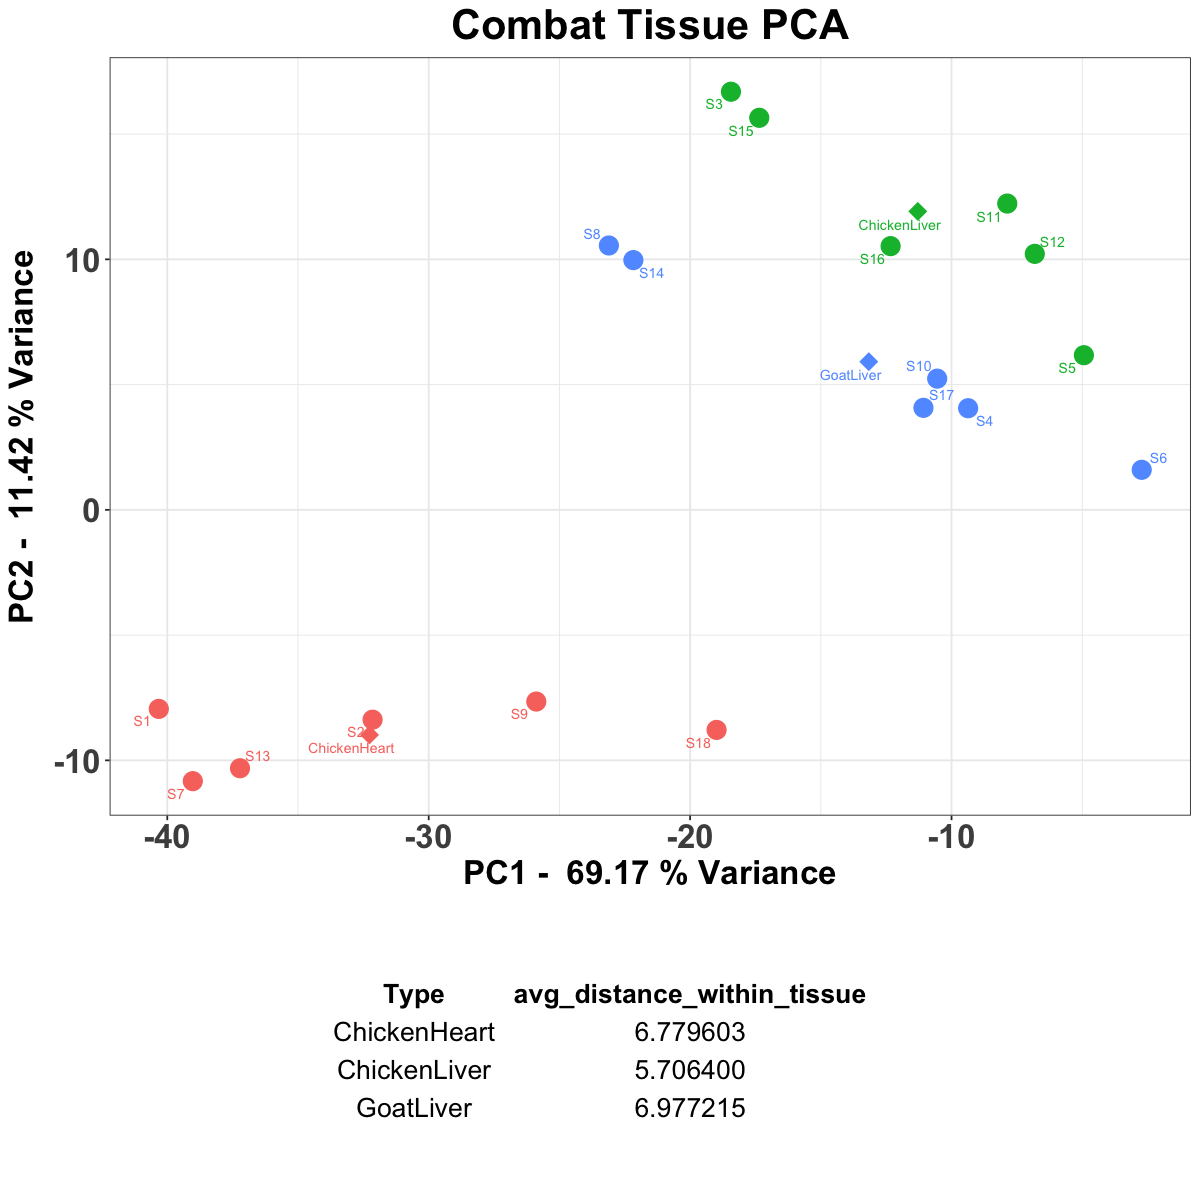

TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name               grob
1 1 (1-1,1-1) arrange     gtable[layout]
2 2 (2-2,1-1) arrange gtable[colhead-fg]


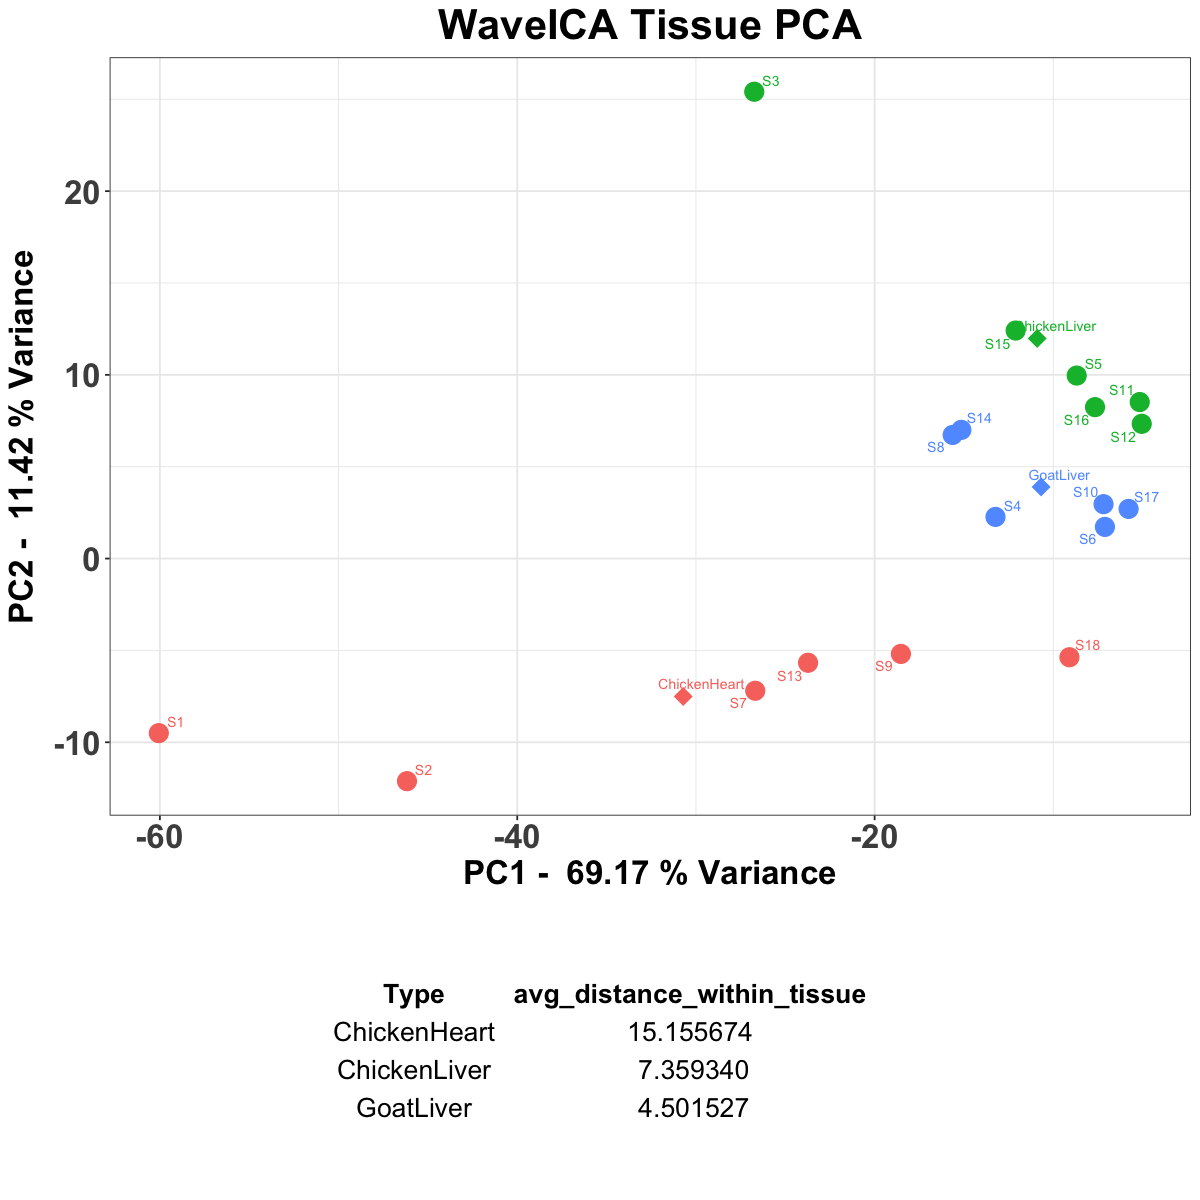

TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name               grob
1 1 (1-1,1-1) arrange     gtable[layout]
2 2 (2-2,1-1) arrange gtable[colhead-fg]


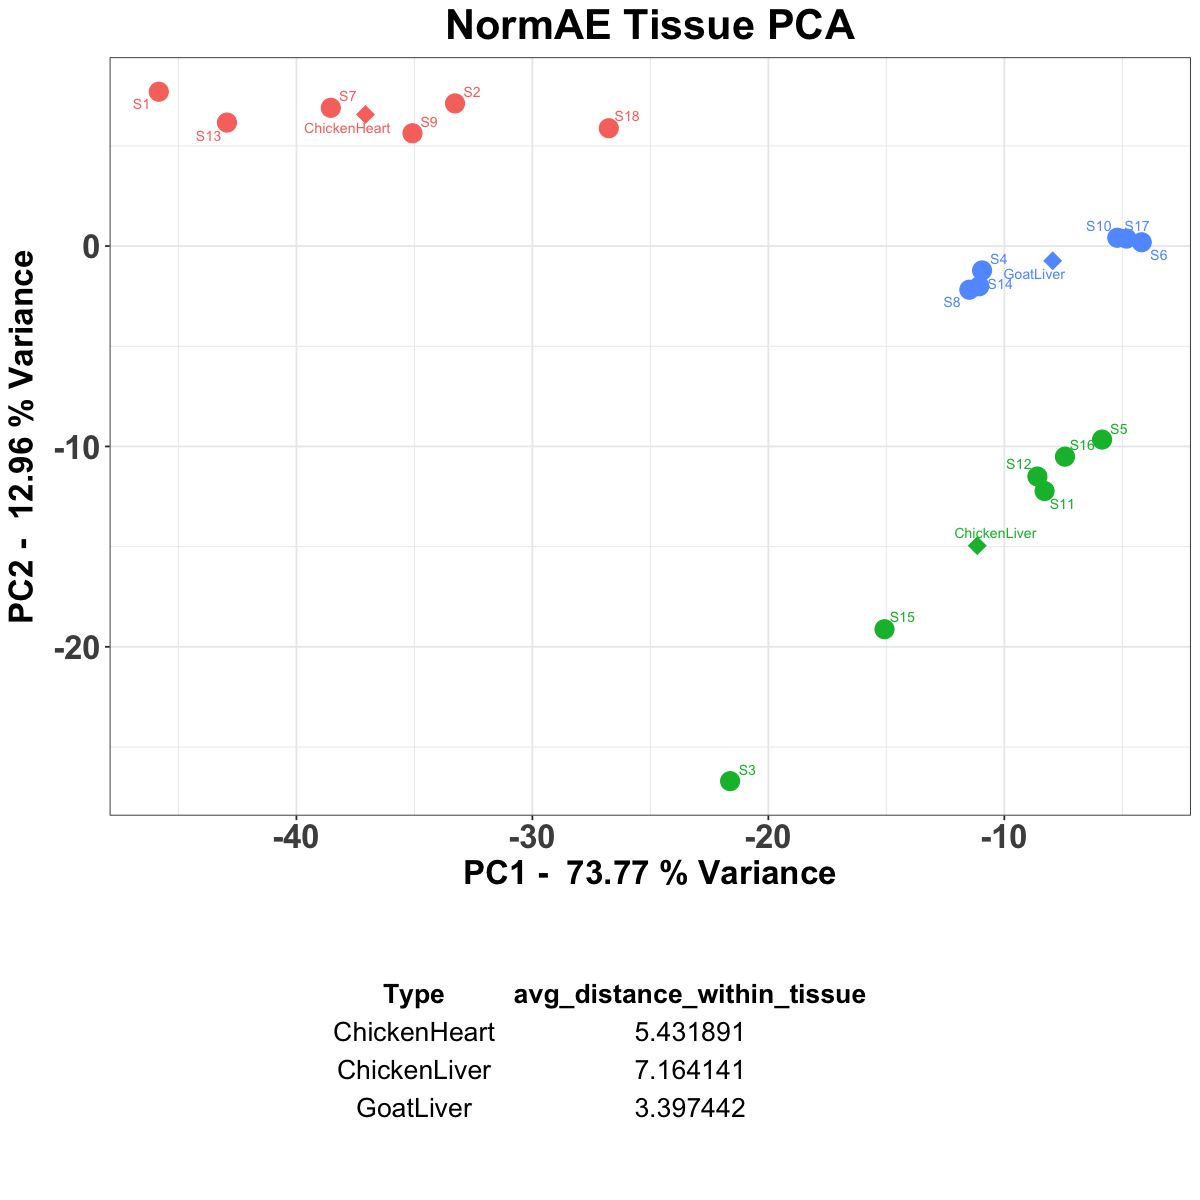

In [120]:
## Tissue PCA Plot Intragroup Combat ##
## Tissue PCA plot intragroup no norm ##
library(gridExtra)
library(dplyr)

options(repr.plot.width = 10, repr.plot.height = 10)  # Adjust width and height as desired

# Filter pca_data to include only tissue samples
tissue_pca_data <- pca_data_combat %>%
  filter(Type %in% sample_set)

# Calculate centroids for each tissue type
centroids <- tissue_pca_data %>%
  group_by(Type) %>%
  summarize(Centroid_PC1 = mean(PC1), Centroid_PC2 = mean(PC2))

# Calculate distances between each sample and its corresponding centroid within each tissue type
tissue_pca_data_with_centroids <- left_join(tissue_pca_data, centroids, by = "Type")
tissue_pca_data_with_centroids <- tissue_pca_data_with_centroids %>%
  mutate(distance_to_centroid = sqrt((PC1 - Centroid_PC1)^2 + (PC2 - Centroid_PC2)^2))

# Calculate average distance within each tissue type
tissue_avg_distances_combat <- tissue_pca_data_with_centroids %>%
  group_by(Type) %>%
  summarize(avg_distance_within_tissue = mean(distance_to_centroid))

# Create intragroup pca plot
tissue_intra_plot_combat <- ggplot(tissue_pca_data, aes(x = PC1, y = PC2, color = Type)) +
  geom_point(size = 5) +
  geom_point(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, color = Type), shape = 18, size = 5) +
  geom_text_repel(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, label = Type), 
                  direction = "both", size = 3) +
  geom_text_repel(aes(label = Sample), direction = "both", size = 3) +
  labs(title = "Combat Tissue PCA",
       x = paste("PC1 - ", round(batch_pca$sdev[1]^2 / sum(batch_pca$sdev^2) * 100, 2), "% Variance"),
       y = paste("PC2 - ", round(batch_pca$sdev[2]^2 / sum(batch_pca$sdev^2) * 100, 2), "% Variance")) +
  theme_bw() +
  theme(axis.text = element_text(size = 20, face = 'bold'), 
        axis.title = element_text(size = 20, face = 'bold'),
        plot.title = element_text(size = 25, hjust = 0.5, face = 'bold'),
        legend.position = "none")

# Create table plot
table_plot_combat <- tableGrob(tissue_avg_distances_combat, rows = NULL, theme = ttheme_minimal(base_size = 16))

# Arrange PCA plot and table plot
combined_plot_combat_intra <- grid.arrange(tissue_intra_plot_combat, table_plot_combat, ncol = 1, heights = c(3, 1))

# Print the combined plot
print(combined_plot_combat_intra)
##################################################################################################################################
## Tissue PCA Plot Intragroup WaveICA ##
## Tissue PCA plot intragroup no norm ##
library(gridExtra)
library(dplyr)

options(repr.plot.width = 10, repr.plot.height = 10)  # Adjust width and height as desired

# Filter pca_data to include only tissue samples
tissue_pca_data <- pca_data_wave %>%
  filter(Type %in% sample_set)

# Calculate centroids for each tissue type
centroids <- tissue_pca_data %>%
  group_by(Type) %>%
  summarize(Centroid_PC1 = mean(PC1), Centroid_PC2 = mean(PC2))

# Calculate distances between each sample and its corresponding centroid within each tissue type
tissue_pca_data_with_centroids <- left_join(tissue_pca_data, centroids, by = "Type")
tissue_pca_data_with_centroids <- tissue_pca_data_with_centroids %>%
  mutate(distance_to_centroid = sqrt((PC1 - Centroid_PC1)^2 + (PC2 - Centroid_PC2)^2))

# Calculate average distance within each tissue type
tissue_avg_distances_wave <- tissue_pca_data_with_centroids %>%
  group_by(Type) %>%
  summarize(avg_distance_within_tissue = mean(distance_to_centroid))

# Create intragroup pca plot
tissue_intra_plot_wave <- ggplot(tissue_pca_data, aes(x = PC1, y = PC2, color = Type)) +
  geom_point(size = 5) +
  geom_point(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, color = Type), shape = 18, size = 5) +
  geom_text_repel(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, label = Type), 
                  direction = "both", size = 3) +
  geom_text_repel(aes(label = Sample), direction = "both", size = 3) +
  labs(title = "WaveICA Tissue PCA",
       x = paste("PC1 - ", round(batch_pca$sdev[1]^2 / sum(batch_pca$sdev^2) * 100, 2), "% Variance"),
       y = paste("PC2 - ", round(batch_pca$sdev[2]^2 / sum(batch_pca$sdev^2) * 100, 2), "% Variance")) +
  theme_bw() +
  theme(axis.text = element_text(size = 20, face = 'bold'), 
        axis.title = element_text(size = 20, face = 'bold'),
        plot.title = element_text(size = 25, hjust = 0.5, face = 'bold'),
        legend.position = "none")

# Create table plot
table_plot_wave <- tableGrob(tissue_avg_distances_wave, rows = NULL, theme = ttheme_minimal(base_size = 16))

# Arrange PCA plot and table plot
combined_plot_wave_intra <- grid.arrange(tissue_intra_plot_wave, table_plot_wave, ncol = 1, heights = c(3, 1))

# Print the combined plot
print(combined_plot_wave_intra)
##################################################################################################################################
## Tissue PCA plot intragroup no norm ##
library(gridExtra)
library(dplyr)

options(repr.plot.width = 10, repr.plot.height = 10)  # Adjust width and height as desired

# Filter pca_data to include only tissue samples
tissue_pca_data <- pca_data_norm %>%
  filter(Type %in% sample_set)

# Calculate centroids for each tissue type
centroids <- tissue_pca_data %>%
  group_by(Type) %>%
  summarize(Centroid_PC1 = mean(PC1), Centroid_PC2 = mean(PC2))

# Calculate distances between each sample and its corresponding centroid within each tissue type
tissue_pca_data_with_centroids <- left_join(tissue_pca_data, centroids, by = "Type")
tissue_pca_data_with_centroids <- tissue_pca_data_with_centroids %>%
  mutate(distance_to_centroid = sqrt((PC1 - Centroid_PC1)^2 + (PC2 - Centroid_PC2)^2))

# Calculate average distance within each tissue type
tissue_avg_distances_norm <- tissue_pca_data_with_centroids %>%
  group_by(Type) %>%
  summarize(avg_distance_within_tissue = mean(distance_to_centroid))

# Create intragroup pca plot
tissue_intra_plot_norm <- ggplot(tissue_pca_data, aes(x = PC1, y = PC2, color = Type)) +
  geom_point(size = 5) +
  geom_point(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, color = Type), shape = 18, size = 5) +
  geom_text_repel(data = centroids, aes(x = Centroid_PC1, y = Centroid_PC2, label = Type), 
                  direction = "both", size = 3) +
  geom_text_repel(aes(label = Sample), direction = "both", size = 3) +
  labs(title = "NormAE Tissue PCA",
       x = paste("PC1 - ", round(batch_pca_norm$sdev[1]^2 / sum(batch_pca_norm$sdev^2) * 100, 2), "% Variance"),
       y = paste("PC2 - ", round(batch_pca_norm$sdev[2]^2 / sum(batch_pca_norm$sdev^2) * 100, 2), "% Variance")) +
  theme_bw() +
  theme(axis.text = element_text(size = 20, face = 'bold'), 
        axis.title = element_text(size = 20, face = 'bold'),
        plot.title = element_text(size = 25, hjust = 0.5, face = 'bold'),
        legend.position = "none")

# Create table plot
table_plot_norm <- tableGrob(tissue_avg_distances_norm, rows = NULL, theme = ttheme_minimal(base_size = 16))

# Arrange PCA plot and table plot
combined_plot_norm_intra <- grid.arrange(tissue_intra_plot_norm, table_plot_norm, ncol = 1, heights = c(3, 1))

# Print the combined plot
print(combined_plot_norm_intra)

## Overview Comparision ##

In [121]:
## QCS RSD ##

## RSD Overview Table ##
# Create overview RSD table for Propranolol
overview_table_pro <- data.frame(
  Row_Names = c("Intraday 1", "Intraday 2", "Intraday 3", "Interday"),
  No_norm_RSD = rsd_propranolol[2],  
  Combat_RSD = rsd_propranolol_combat[2],
  WaveICA_RSD = rsd_propranolol_wave[2],
  NormAE_RSD = rsd_propranolol_norm[2]
)

# Set the column names
colnames(overview_table_pro) <- c(paste("m/z value:", propranolol_mz_value),"No norm", "Combat", "WaveICA", "NormAE")

library(kableExtra)
library(htmltools)
library(IRdisplay)

# Displaying overview RSD table
display_rsd_table_pro <- kable(overview_table_pro, format = "html", row.names = FALSE) %>%
  kable_styling(full_width = FALSE)

# Add table name
display_rsd_table_pro <- paste("<h2 style='text-align: center;'>Overview RSD Table Propranolol</h2>", 
                               as.character(display_rsd_table_pro))

# Save HTML table to a file
display_html(display_rsd_table_pro)

# Create overview RSD table for d7-Propranolol
overview_table_d7_pro <- data.frame(
  Row_Names = c("Intraday 1", "Intraday 2", "Intraday 3", "Interday"),
  No_norm_RSD = rsd_d7_propranolol[2],  
  Combat_RSD = rsd_d7_propranolol_combat[2],
  WaveICA_RSD = rsd_d7_propranolol_wave[2],
  NormAE_RSD = rsd_d7_propranolol_norm[2]
)

# Set the column names
colnames(overview_table_d7_pro) <- c(paste("m/z value:", d7_propranolol_mz_value),"No Norm","Combat", "WaveICA", "NormAE")

library(kableExtra)
library(htmltools)
library(IRdisplay)

# Displaying overview RSD table
display_rsd_table_d7_pro <- kable(overview_table_d7_pro, format = "html", row.names = FALSE) %>%
  kable_styling(full_width = FALSE)

# Add table name
display_rsd_table_d7_pro <- paste("<h2 style='text-align: center;'>Overview RSD Table D7-Propranolol</h2>", 
                               as.character(display_rsd_table_d7_pro))

# Save HTML table to a file
display_html(display_rsd_table_d7_pro)

Overview RSD Table Propranolol 
 
 
 m/z value: 260.186 
 No norm 
 Combat 
 WaveICA 
 NormAE 
 
 
 
 
 Intraday 1 
 70.5% 
 57.82% 
 42.24% 
 22.55% 
 
 
 Intraday 2 
 41.41% 
 48.44% 
 33.07% 
 22.04% 
 
 
 Intraday 3 
 34.07% 
 38.62% 
 35.51% 
 19.79% 
 
 
 Interday 
 52.05% 
 48.24% 
 36.97% 
 21.36%

Overview RSD Table D7-Propranolol 
 
 
 m/z value: 267.187 
 No Norm 
 Combat 
 WaveICA 
 NormAE 
 
 
 
 
 Intraday 1 
 73.81% 
 59.23% 
 39.16% 
 25.86% 
 
 
 Intraday 2 
 39.71% 
 47.31% 
 30.04% 
 25.66% 
 
 
 Intraday 3 
 35.57% 
 39.03% 
 32.49% 
 23.58% 
 
 
 Interday 
 53.15% 
 48.62% 
 33.92% 
 24.93%

In [122]:
## Tissue RSD ##
## Overview RSD Table ##

# Initialize an empty list to store combined HTML tables for each tissue
combined_html_list <- list()

# Iterate over each tissue type
for (tissue_name in names(rsd_results_combined)) {
  # Extract RSD tables for the current tissue type
  rsd_table <- generate_rsd_table(rsd_results_combined, tissue_name)
  rsd_table_combat <- generate_rsd_table(rsd_results_combined_combat, tissue_name)
  rsd_table_wave <- generate_rsd_table(rsd_results_combined_wave, tissue_name)
  rsd_table_norm <- generate_rsd_table(rsd_results_combined_norm, tissue_name)

  # Combine HTML tables for the current tissue type horizontally
  combined_rsd_table <- paste("<h2 style='text-align: center;'>", tissue_name, " RSD Table</h2>",
                              "<div style='text-align: center;'>",
                              "<div style='display: inline-block; margin-right: 20px; text-align: center;'>",
                              "<h3>No Norm Raw Data</h3>", rsd_table, "</div>",
                              "<div style='display: inline-block; margin-right: 20px; text-align: center;'>",
                              "<h3>Combat</h3>", rsd_table_combat, "</div>",
                              "<div style='display: inline-block; margin-right: 20px; text-align: center;'>",
                              "<h3>WaveICA</h3>", rsd_table_wave, "</div>",
                              "<div style='display: inline-block; margin-right: 20px; text-align: center;'>",
                              "<h3>NormAE</h3>", rsd_table_norm, "</div>",
                              "</div>")
  
  # Add the combined HTML table to the list
  combined_html_list[[tissue_name]] <- combined_rsd_table
}

# Combine HTML tables into a single HTML table with four columns
combined_html <- paste("<table style='width:100%; border-collapse: collapse;'>", 
                       "<tr>", paste("<td style='vertical-align: top;'>", 
                                     unlist(combined_html_list), 
                                     "</td>", sep = ""), "</tr></table>")

# Wrap the combined HTML content in a div with text-align: center
centered_combined_html <- paste("<div style='text-align: center;'>", combined_html, "</div>")

# Display the centered HTML content in JupyterLab
display_html(centered_combined_html)

GoatLiver RSD Table No Norm Raw Data 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 23.72 ± 8.48% 
 
 
 Intraday 2 
 25.12 ± 7.45% 
 
 
 Intraday 3 
 23.86 ± 9.95% 
 
 
 Interday 
 23.03 ± 5.61% 
 
 
 Combat 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 21.95 ± 9.34% 
 
 
 Intraday 2 
 29.78 ± 11.92% 
 
 
 Intraday 3 
 27.63 ± 13.00% 
 
 
 Interday 
 32.26 ± 13.97% 
 
 
 WaveICA 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 17.69 ± 16.22% 
 
 
 Intraday 2 
 19.88 ± 7.04% 
 
 
 Intraday 3 
 24.69 ± 16.19% 
 
 
 Interday 
 21.13 ± 11.08% 
 
 
 NormAE 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 20.66 ± 8.33% 
 
 
 Intraday 2 
 20.06 ± 4.88% 
 
 
 Intraday 3 
 20.02 ± 6.60% 
 
 
 Interday 
 16.10 ± 4.43% 
 
 
 ChickenLiver RSD Table No Norm Raw Data 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 37.55 ± 10.32% 
 
 
 Intraday 2 
 6.51 ± 5.53% 
 
 
 Intraday 3 
 11.49 ± 7.60% 
 
 
 Interday 
 41.29 ± 11.85% 
 
 
 Combat 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 35.48 ± 11.20% 
 
 
 Intraday 2 
 7.49 ± 6.36% 
 
 
 Intraday 3 
 12.35 ± 7.94% 
 
 
 Interday 
 26.44 ± 16.06% 
 
 
 WaveICA 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 36.21 ± 17.90% 
 
 
 Intraday 2 
 5.11 ± 4.64% 
 
 
 Intraday 3 
 12.33 ± 15.01% 
 
 
 Interday 
 29.77 ± 14.73% 
 
 
 NormAE 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 37.57 ± 11.89% 
 
 
 Intraday 2 
 2.76 ± 2.66% 
 
 
 Intraday 3 
 19.94 ± 7.51% 
 
 
 Interday 
 22.77 ± 7.38% 
 
 
 ChickenHeart RSD Table No Norm Raw Data 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 12.84 ± 6.84% 
 
 
 Intraday 2 
 16.93 ± 8.34% 
 
 
 Intraday 3 
 26.88 ± 12.72% 
 
 
 Interday 
 45.32 ± 8.10% 
 
 
 Combat 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 12.14 ± 6.69% 
 
 
 Intraday 2 
 19.53 ± 10.38% 
 
 
 Intraday 3 
 29.06 ± 14.17% 
 
 
 Interday 
 24.11 ± 18.08% 
 
 
 WaveICA 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 18.29 ± 14.97% 
 
 
 Intraday 2 
 13.12 ± 8.67% 
 
 
 Intraday 3 
 27.61 ± 12.91% 
 
 
 Interday 
 37.95 ± 14.96% 
 
 
 NormAE 
 
 
 Batch 
 RSD 
 
 
 
 
 Intraday 1 
 16.04 ± 13.15% 
 
 
 Intraday 2 
 6.90 ± 13.23% 
 
 
 Intraday 3 
 23.31 ± 15.31% 
 
 
 Interday 
 15.45 ± 16.19%

TableGrob (3 x 2) "arrange": 5 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]
3 3 (2-2,1-1) arrange gtable[layout]
4 4 (2-2,2-2) arrange gtable[layout]
5 5 (3-3,1-1) arrange gtable[layout]


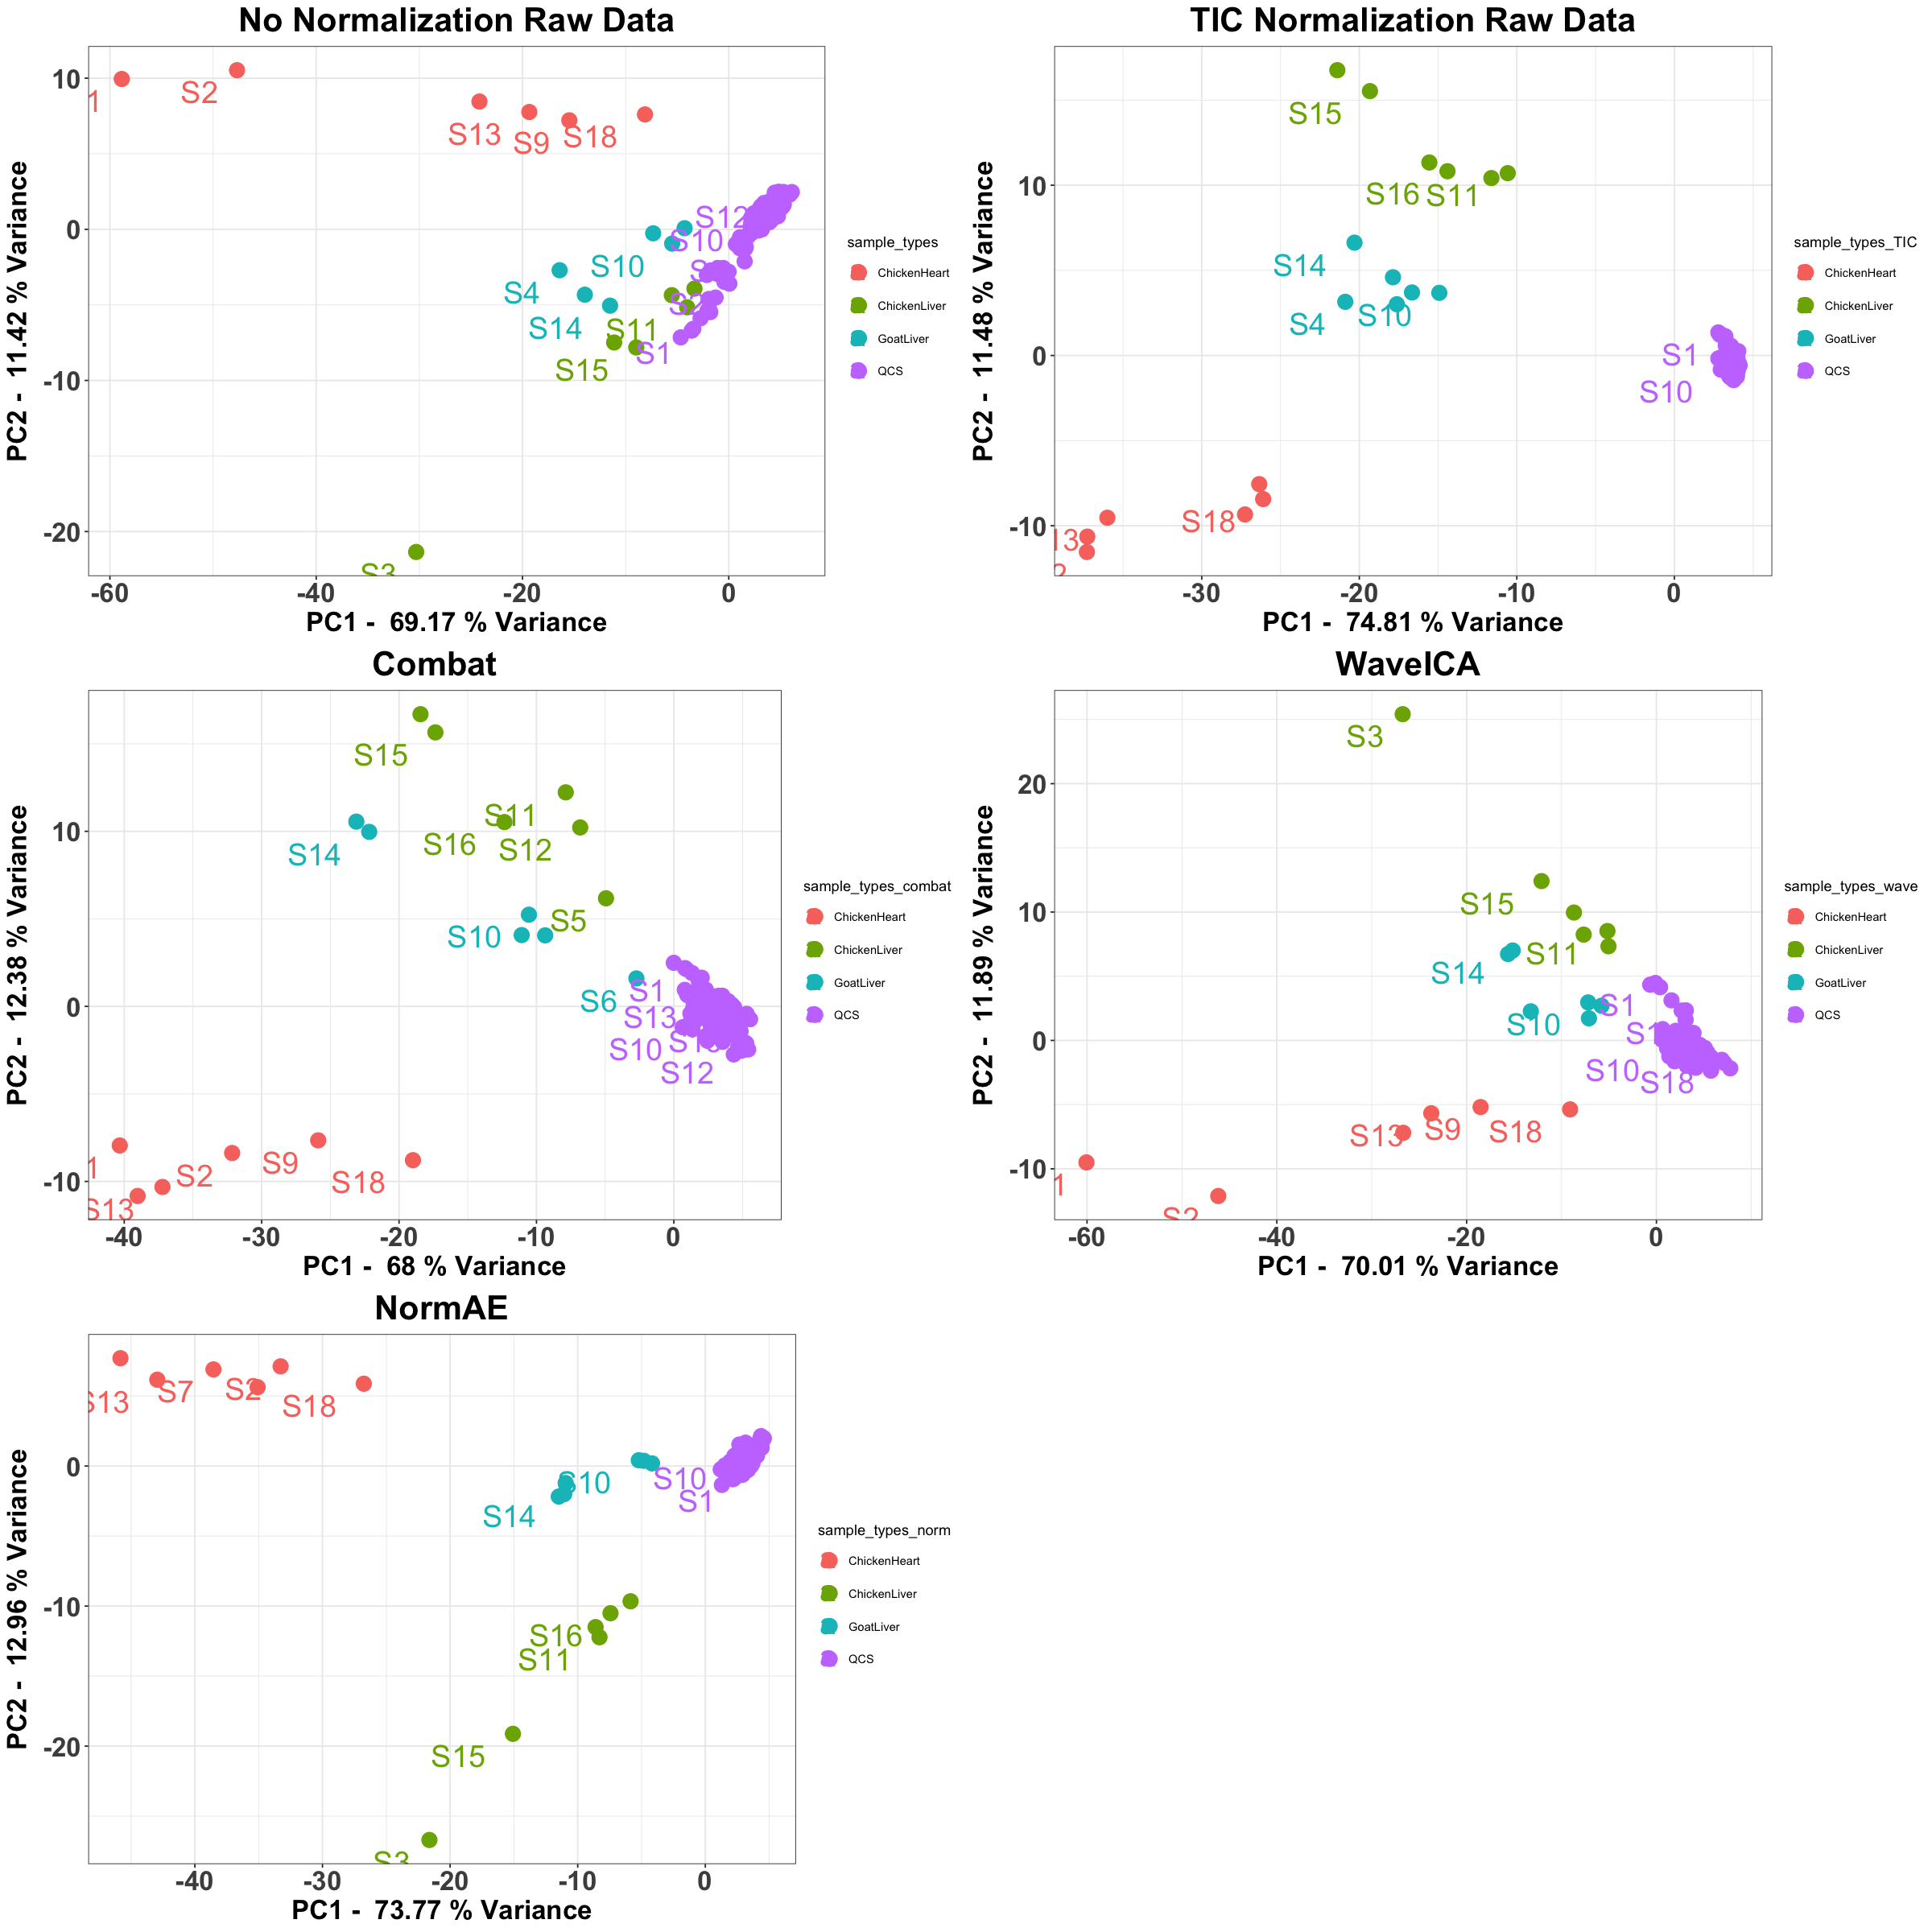

In [123]:
## PCA PLOT ##
library(gridExtra)
options(repr.plot.width = 20, repr.plot.height = 20)
combined_plots <- grid.arrange(plot, plot_TIC, plot_combat, plot_wave, plot_norm, nrow = 3)
print(combined_plots)

TableGrob (3 x 2) "arrange": 5 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]
3 3 (2-2,1-1) arrange gtable[layout]
4 4 (2-2,2-2) arrange gtable[layout]
5 5 (3-3,1-1) arrange gtable[layout]


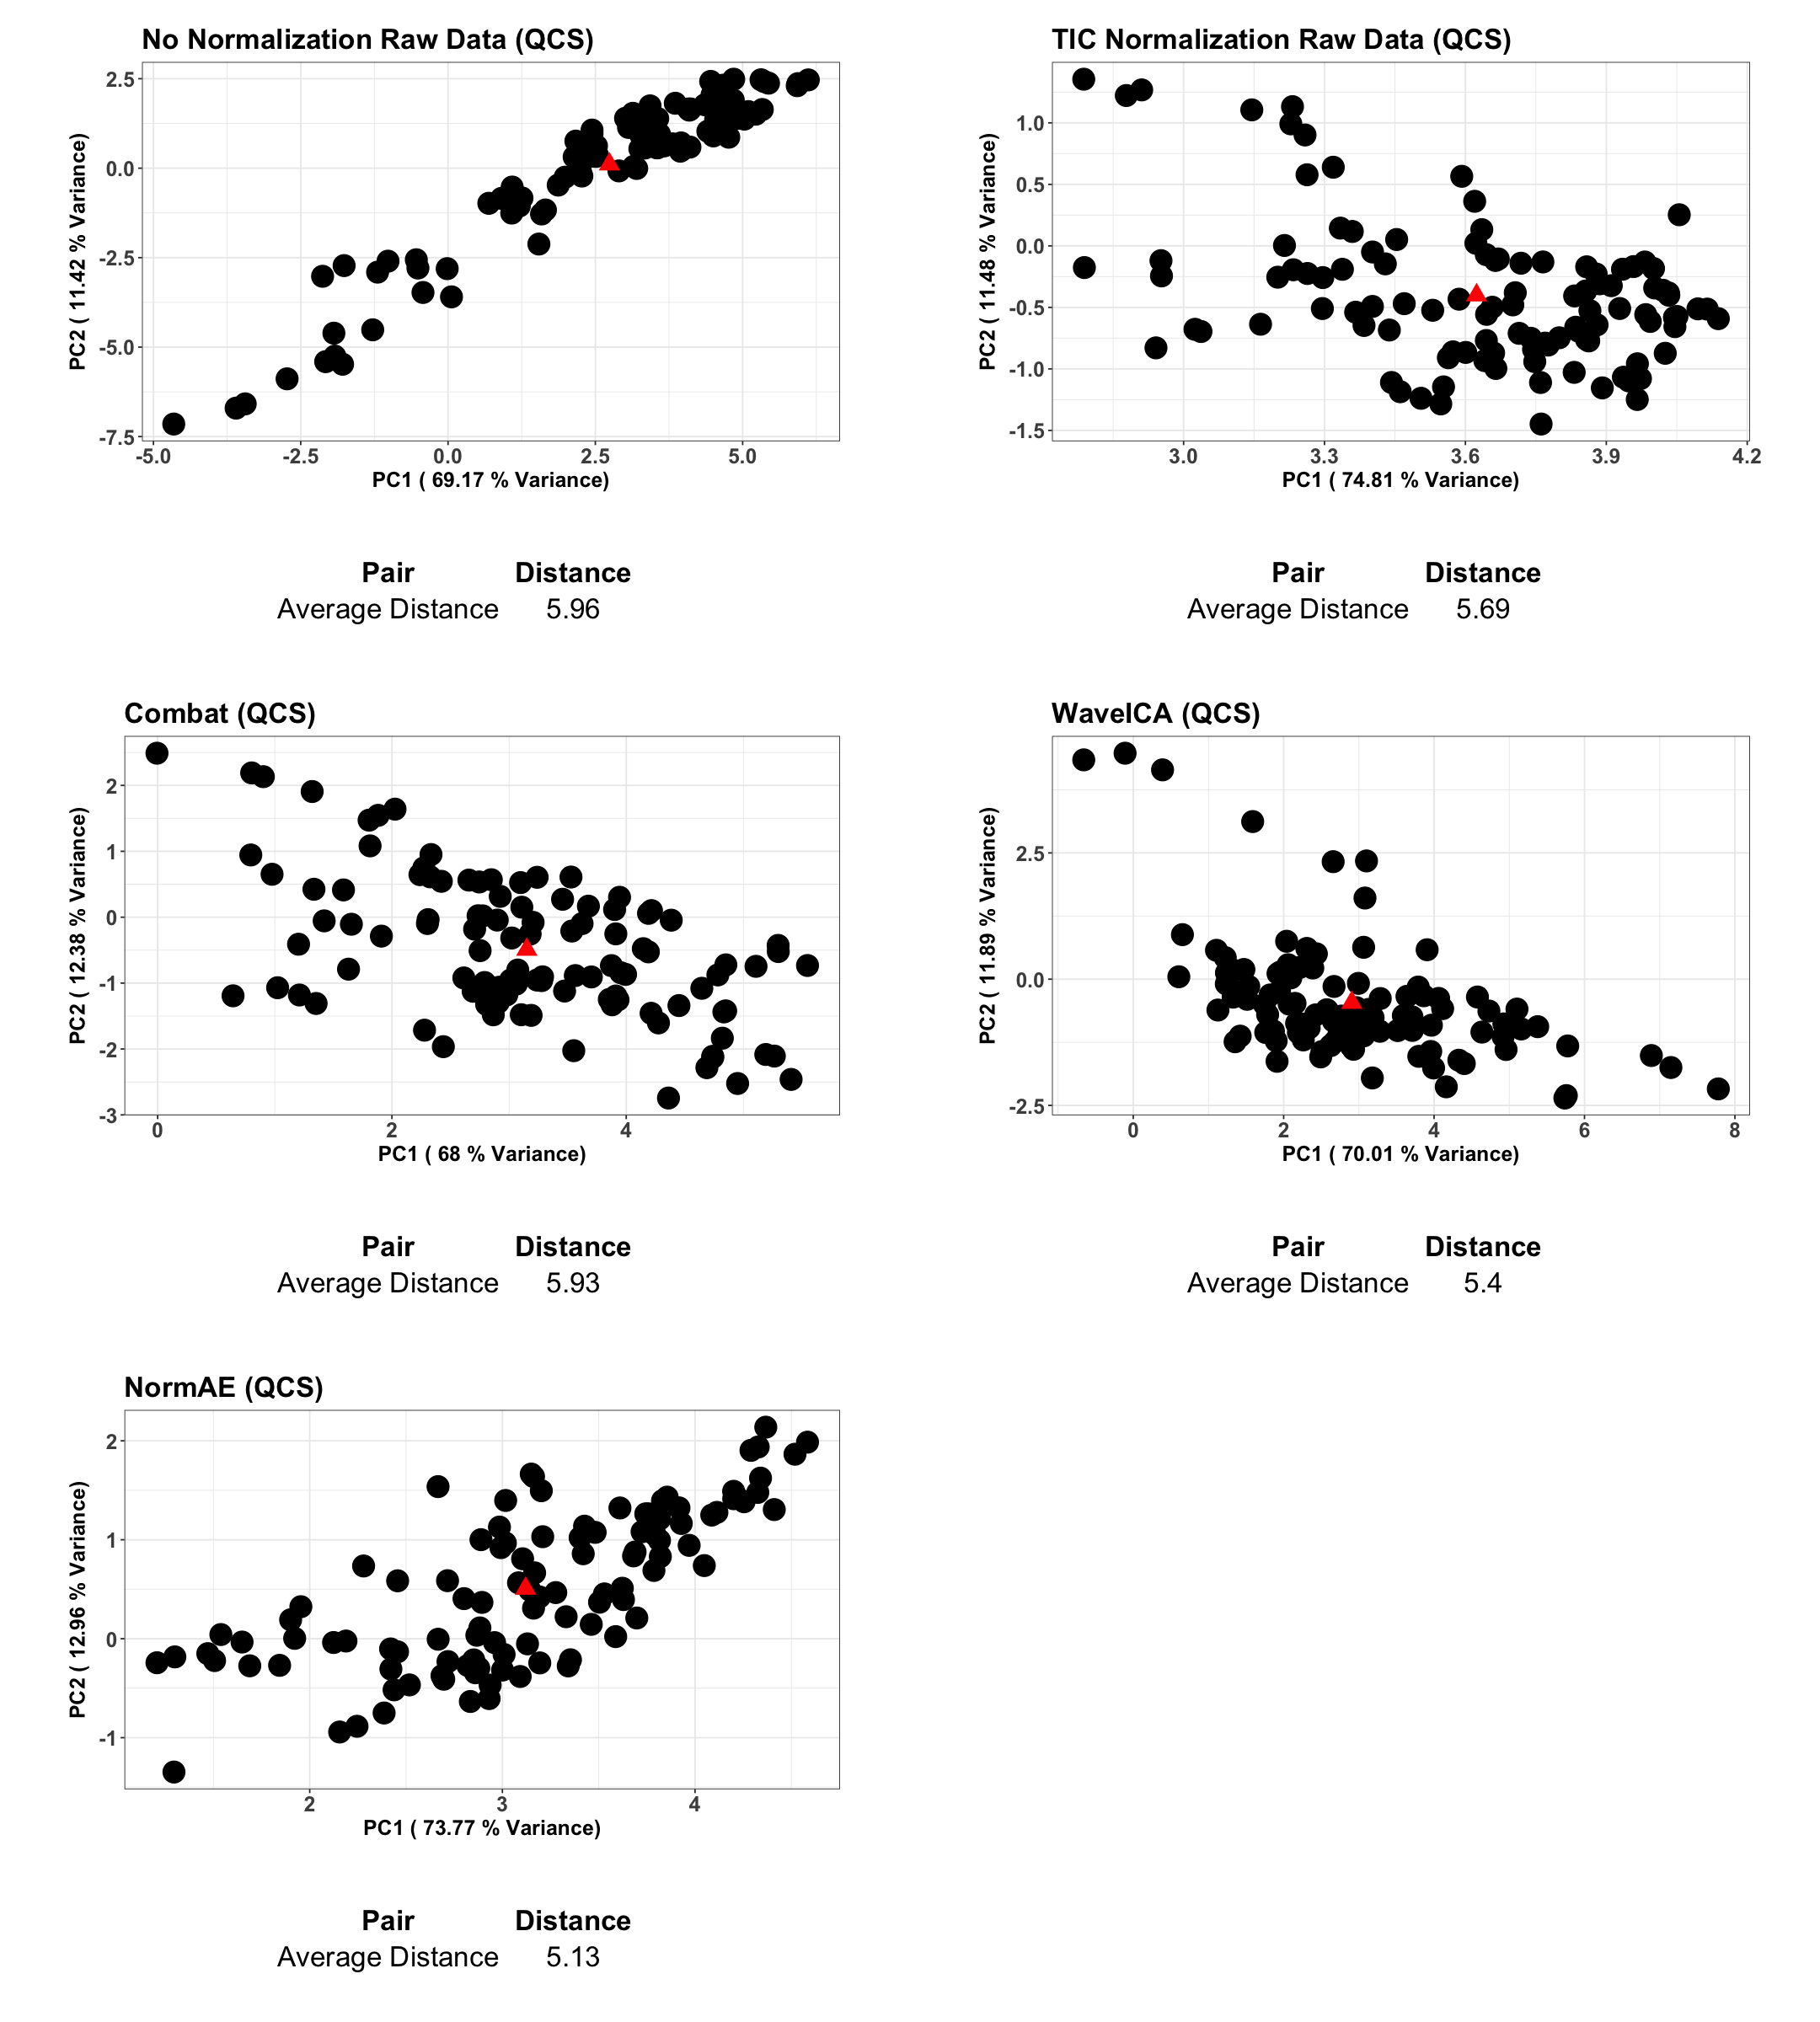

In [124]:
## QCS PCA PLOT ##
library(gridExtra)
options(repr.plot.width = 18, repr.plot.height = 20)
combined_plots <- grid.arrange(combined_plot_qcs, combined_plot_TIC_qcs, combined_plot_combat_qcs, combined_plot_wave_qcs, combined_plot_norm_qcs, nrow = 3)
print(combined_plots)

Warning message:
“ggrepel: 10 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 10 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 3 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


TableGrob (3 x 2) "arrange": 5 grobs
  z     cells    name            grob
1 1 (1-1,1-1) arrange gtable[arrange]
2 2 (1-1,2-2) arrange gtable[arrange]
3 3 (2-2,1-1) arrange gtable[arrange]
4 4 (2-2,2-2) arrange gtable[arrange]
5 5 (3-3,1-1) arrange gtable[arrange]


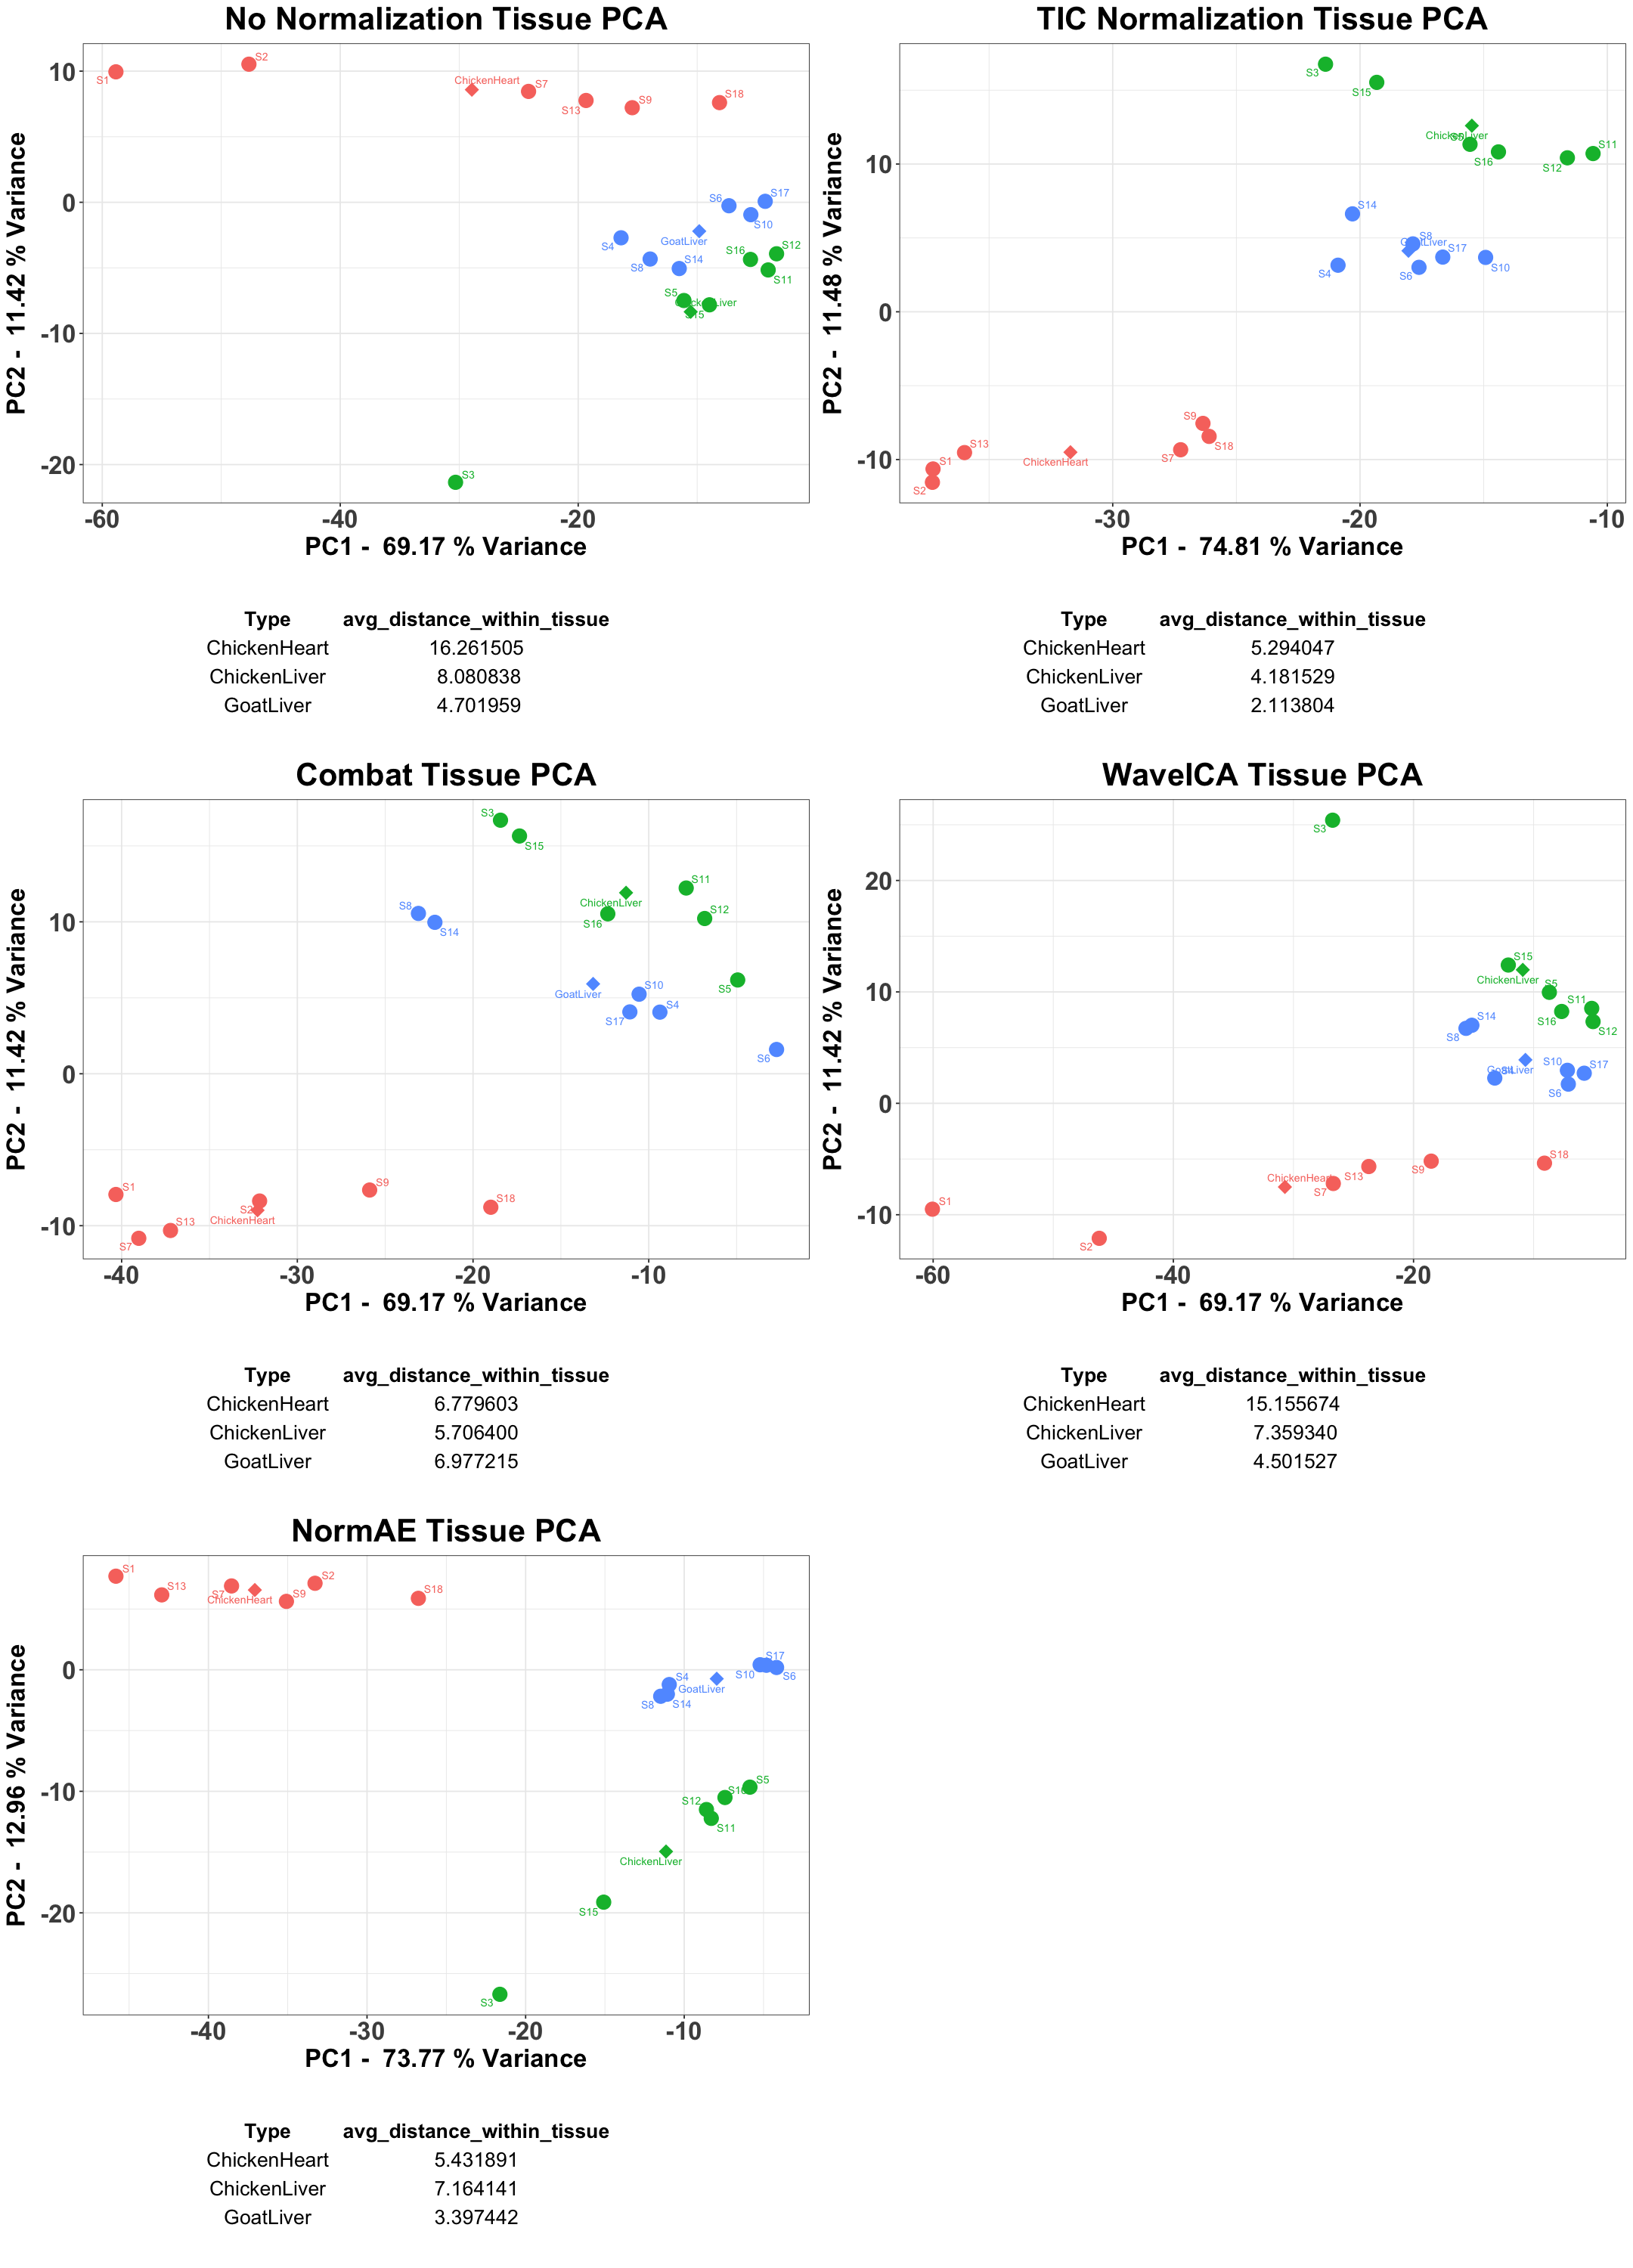

In [144]:
## TISSUE Intraday PLOT ##
options(repr.plot.width = 18, repr.plot.height = 25)
combined_plots_intraday <- grid.arrange(combined_plot_intra,combined_plot_TIC_intra, combined_plot_combat_intra, combined_plot_wave_intra, combined_plot_norm_intra, nrow = 3)
print(combined_plots_intraday)

Warning message:
“ggrepel: 10 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 10 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 3 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


TableGrob (3 x 2) "arrange": 5 grobs
  z     cells    name            grob
1 1 (1-1,1-1) arrange gtable[arrange]
2 2 (1-1,2-2) arrange gtable[arrange]
3 3 (2-2,1-1) arrange gtable[arrange]
4 4 (2-2,2-2) arrange gtable[arrange]
5 5 (3-3,1-1) arrange gtable[arrange]


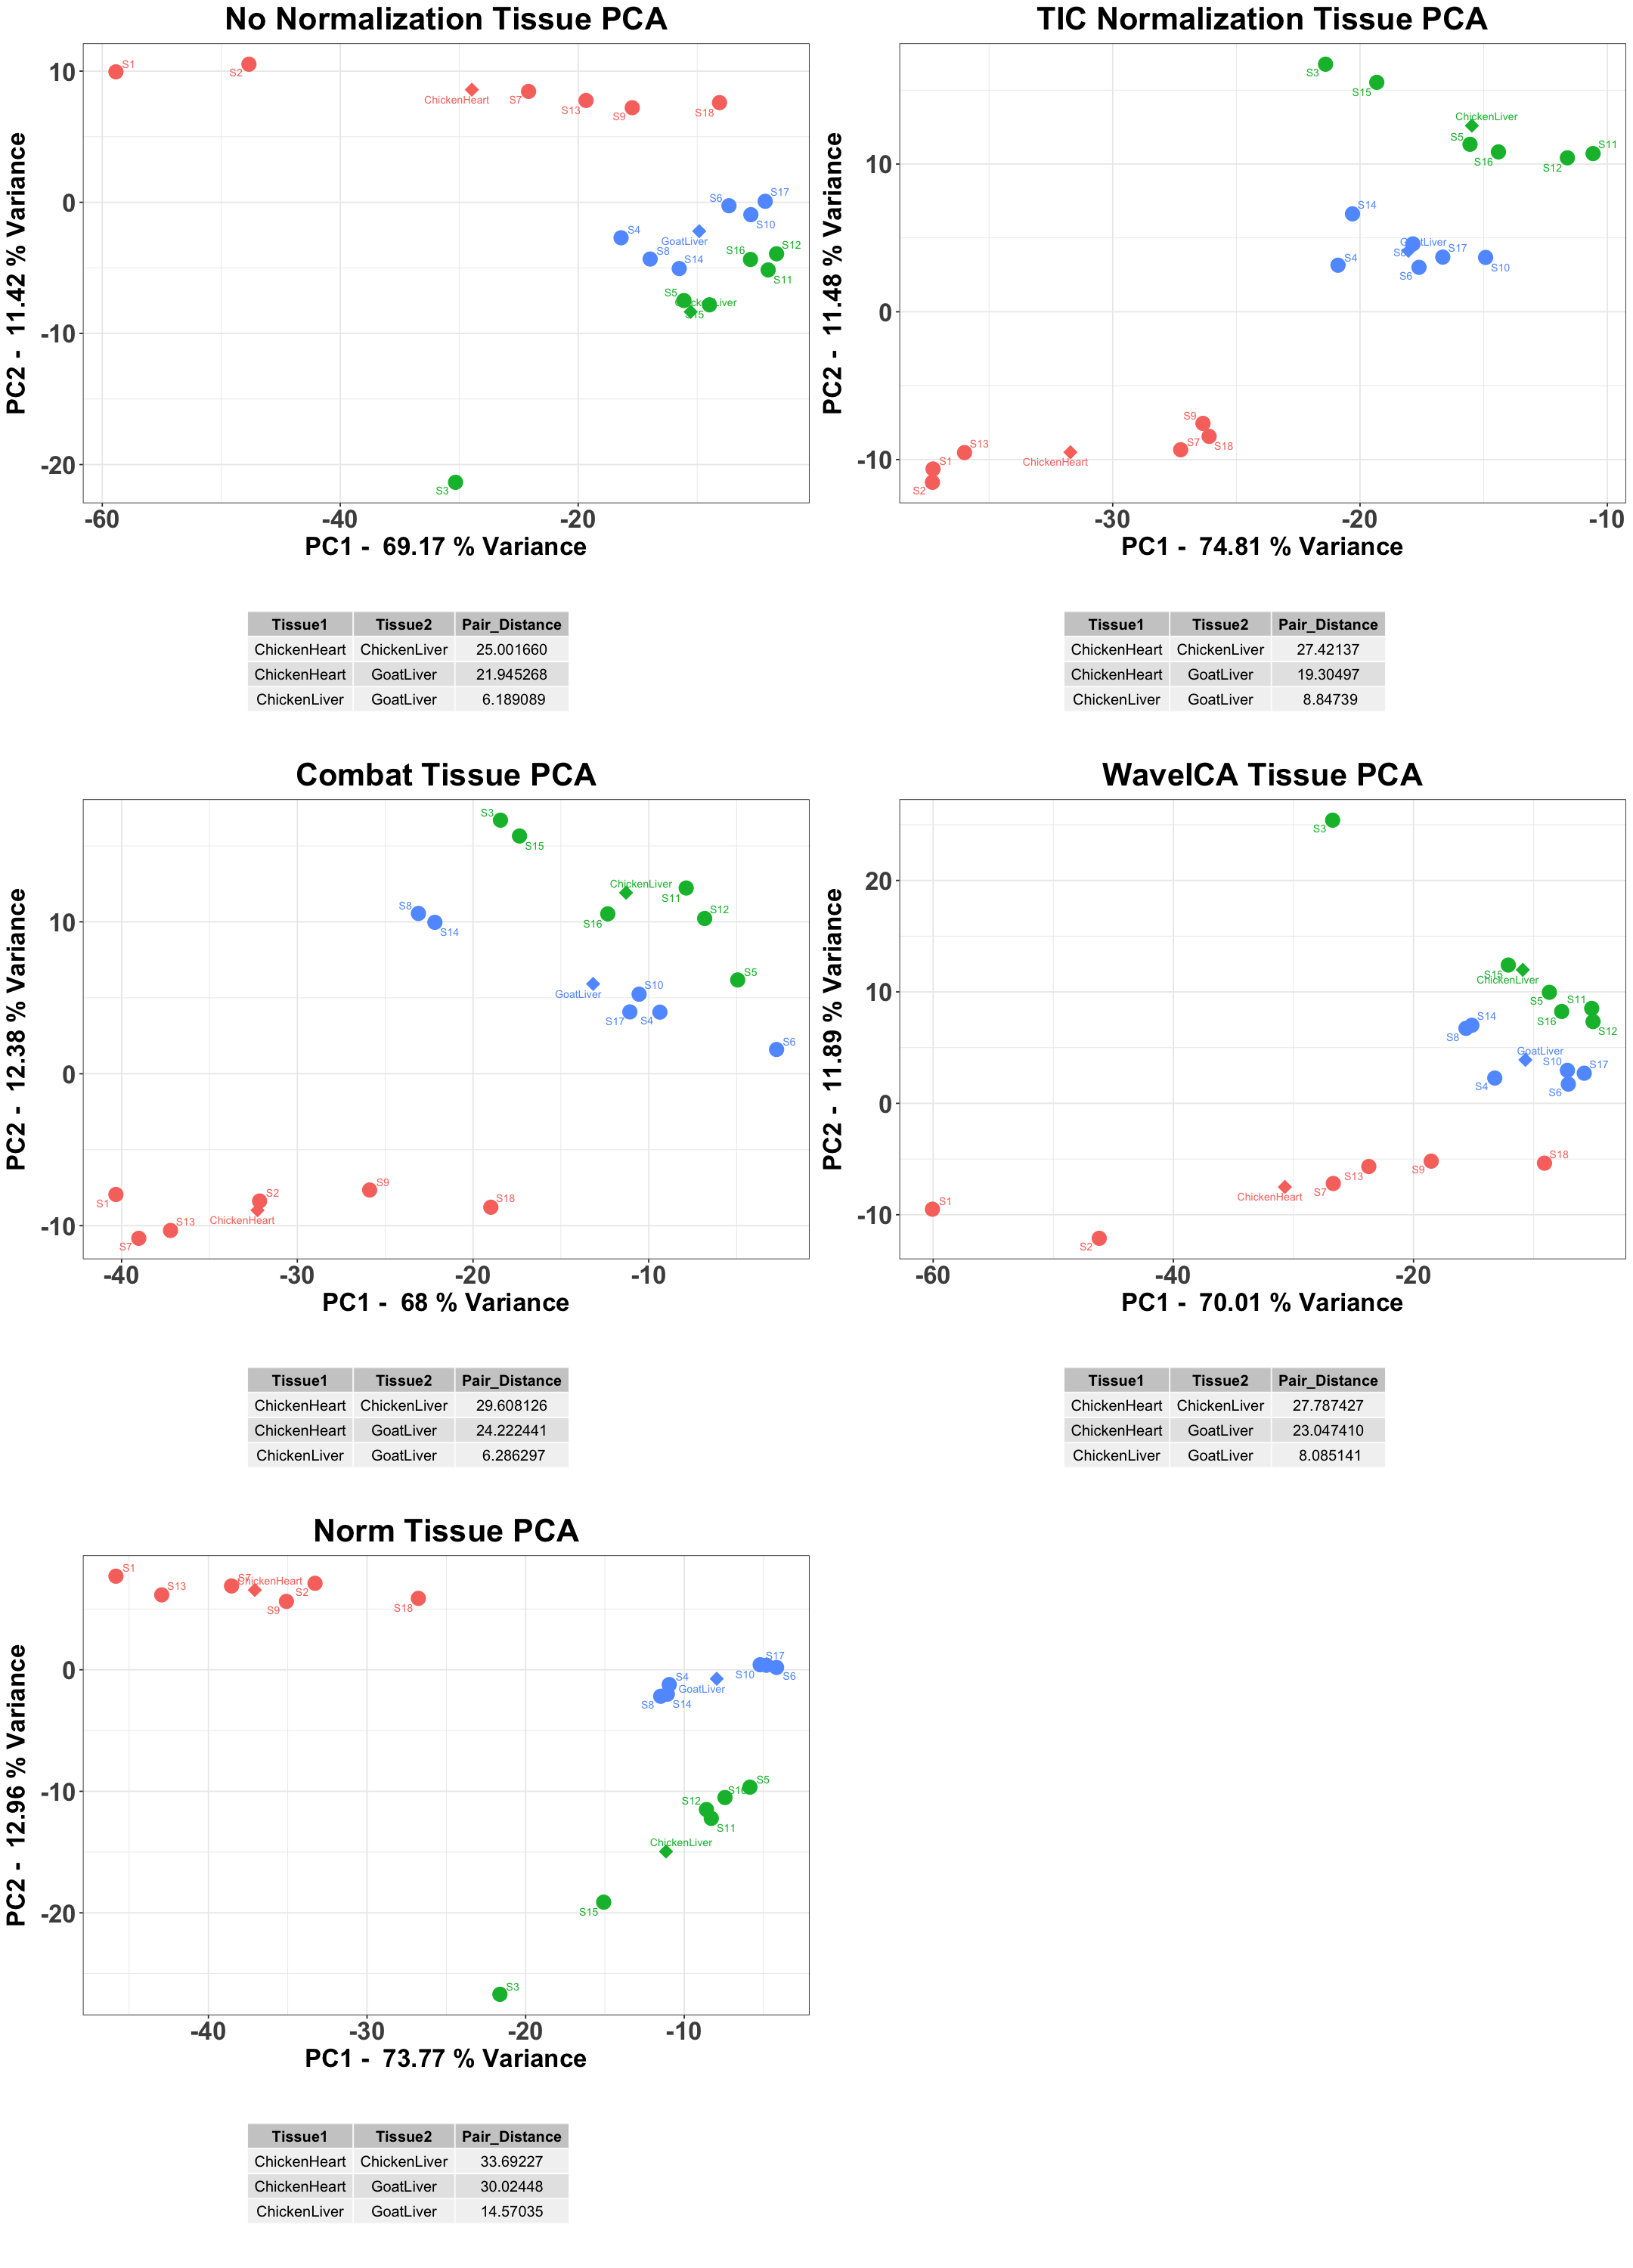

In [145]:
## TISSUE Intraday PLOT ##
options(repr.plot.width = 18, repr.plot.height = 25)
combined_plots_interday <- grid.arrange(combined_plot_inter, combined_plot_TIC_inter, combined_plot_combat_inter,
                                        combined_plot_wave_inter, combined_plot_norm_inter, nrow = 3)
print(combined_plots_interday)

In [147]:
## Overview Average Distance Table ##

# Create separate rows for each tissue value
merged_data <- data.frame(
  Average_distances = c("QCS(centroid)", "QCS(euclidean)", "Tissue(intragroup)", "Tissue(intergroup)"),
  No_norm = c(average_qcs_distance, average_distance_ec, paste(tissue_avg_distances$avg_distance_within_tissue, collapse = ", "), paste(centroid_distances_df$Pair_Distance, collapse = ", ")),
  TIC_norm = c(average_qcs_distance_TIC, average_distance_ec_TIC, paste(tissue_avg_distances_TIC$avg_distance_within_tissue, collapse = ", "), paste(centroid_distances_df_TIC$Pair_Distance, collapse = ", ")),
  Combat_norm = c(average_qcs_distance_combat, average_distance_ec_combat, paste(tissue_avg_distances_combat$avg_distance_within_tissue, collapse = ", "), paste(centroid_distances_df_combat$Pair_Distance, collapse = ", ")),
  WaveICA_norm = c(average_qcs_distance_wave, average_distance_ec_wave, paste(tissue_avg_distances_wave$avg_distance_within_tissue, collapse = ", "), paste(centroid_distances_df_wave$Pair_Distance, collapse = ", ")),
  NormAE_norm = c(average_qcs_distance_norm, average_distance_ec_norm, paste(tissue_avg_distances_norm$avg_distance_within_tissue, collapse = ", "), paste(centroid_distances_df_norm$Pair_Distance, collapse = ", "))
)

library(kableExtra)
library(htmltools)
library(IRdisplay)

# Displaying overview RSD table
display_rsd_table_pro <- kable(merged_data, format = "html", row.names = FALSE) %>%
  kable_styling(full_width = FALSE)

# Add table name
display_rsd_table_pro <- paste("<h2 style='text-align: center;'>Overview RSD Table Propranolol</h2>", 
                               as.character(display_rsd_table_pro))

# Save HTML table to a file
display_html(display_rsd_table_pro)

Overview RSD Table Propranolol 
 
 
 Average_distances 
 No_norm 
 TIC_norm 
 Combat_norm 
 WaveICA_norm 
 NormAE_norm 
 
 
 
 
 QCS(centroid) 
 5.95512601964299 
 5.69279890033456 
 5.93351507515199 
 5.40450116756693 
 5.13498209726165 
 
 
 QCS(euclidean) 
 5.72814537565927 
 3.32551299586035 
 5.24827452059474 
 4.75365221023581 
 3.29666974190151 
 
 
 Tissue(intragroup) 
 16.2615051837195, 8.08083755964266, 4.70195922746115 
 5.29404702556746, 4.18152905919939, 2.11380435626099 
 6.77960346314757, 5.70639965680669, 6.97721515978037 
 15.1556737984592, 7.3593404299247, 4.50152734731132 
 5.43189112705596, 7.16414097699874, 3.39744177501494 
 
 
 Tissue(intergroup) 
 33.6922708791818, 30.0244769850658, 14.5703458604153 
 27.4213730250543, 19.304969998136, 8.84738987154798 
 29.6081260187539, 24.2224406706592, 6.2862966847794 
 27.7874274128242, 23.0474102519077, 8.08514107701859 
 33.6922708791818, 30.0244769850658, 14.5703458604153

## Conclusion ##
1. RSD Table

In [ ]:
## RSD variation correction ##


In [ ]:
## PCA Clustering ##

In [ ]:
## Best Correction Package ##


## Pipeline #3 Real Sample Application ##